In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [3]:
consumer_data = pd.read_csv('ConsumerElectronics.csv')

In [4]:
consumer_data.shape
#(1648824, 19)

(1648824, 20)

In [5]:
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

## Let's check each column one by one

In [6]:
#converting order_date to datetime
consumer_data['order_date'] = pd.to_datetime(consumer_data['order_date'])

In [7]:
consumer_data['order_date'].dtype

dtype('<M8[ns]')

In [8]:
#Sort values by order_date
consumer_data=consumer_data.sort_values(by=['order_date'])

In [9]:
#We have to check if year and month is consistent with order_date
print((consumer_data['order_date'].dt.year == consumer_data['Year']).sum())
print((consumer_data['order_date'].dt.month == consumer_data['Month']).sum())

1648824
1648824


Hence Year and Month columns are in sync with the order_data column

In [10]:
# We have to covert order_id and order_item_id into proper format
# converting them to object format
consumer_data['order_id'] = consumer_data['order_id'].map(lambda x : '{:.0f}'.format(x))
consumer_data['order_item_id'] = consumer_data['order_item_id'].map(lambda x : '{:.0f}'.format(x))

In [11]:
consumer_data.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                        object
units                                       int64
deliverybdays                              object
deliverycdays                              object
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [12]:
consumer_data.head()

fsn_id          order_date  Year  Month   order_id  \
1376093  ACCDVZ83VBHCWFFA 2015-05-19 13:42:09  2015      5  146499482   
1436634  VGLE4VR7XSQKYFG7 2015-06-11 18:21:50  2015      6  155827856   
1398258  ACCE6VGHYKYFX4WB 2015-06-24 10:20:16  2015      6  161931009   
1385002  ACCE2V5DUDZVGFRK 2015-06-25 16:28:12  2015      6  163016530   
1358453  ACCDFZEJ6ZGSWRMK 2015-06-26 17:02:01  2015      6  163400507   

        order_item_id   gmv  units deliverybdays deliverycdays  \
1376093     188485029  3149      1            \N            \N   
1436634     198823138   275      1            \N            \N   
1398258     205976637   188      1            \N            \N   
1385002     207267972   250      1            \N            \N   
1358453     207701702  1119      1            \N            \N   

        s1_fact.order_payment_type  sla                 cust_id  \
1376093                        COD    6  -6.14850311678963E+018   
1436634                        COD    8   1.58583155812679E+018   
1398258                        COD    8  -4.88207864623487E+018   
1385002                        COD    7  -4.27261305168723E+018   
1358453                        COD   28  -7.47222175673193E+018   

                        pincode product_analytic_super_category  \
1376093  -3.21775258155408E+018                              CE   
1436634  -3.70342091330123E+017                              CE   
1398258   2.04427084691886E+018                              CE   
1385002   6.14822284391839E+018                              CE   
1358453    -9.779010321304E+017                              CE   

        product_analytic_category product_analytic_sub_category  \
1376093        EntertainmentSmall                     HomeAudio   
1436634        EntertainmentSmall                  TVVideoSmall   
1398258        EntertainmentSmall                       Speaker   
1385002        EntertainmentSmall                       Speaker   
1358453        EntertainmentSmall                       Speaker   

        product_analytic_vertical  product_mrp  product_procurement_sla  
1376093          HomeAudioSpeaker         6990                        4  
1436634              VideoGlasses          600                        2  
1398258             LaptopSpeaker          310                       -1  
1385002             LaptopSpeaker          400                        4  
1358453             LaptopSpeaker         2500                        3

In [13]:
#Few columns were containing whitespace instead of Missing values. Replacing ' ' with NAs
consumer_data.replace([' ','\\N'], np.nan, inplace=True)

In [14]:
consumer_data['gmv'] = pd.to_numeric(consumer_data['gmv'])

In [15]:
consumer_data.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [16]:
#gmv is our target variable, rows containing null values are of no use, hence dropping them
consumer_data.dropna(subset = ['gmv'], inplace = True)

In [17]:
#Null value % for deliverybdays and deliverycdays
100 * consumer_data['deliverybdays'].isnull().sum() / len(consumer_data.index)

79.57017373108181

In [18]:
#Dropping deliverybdays and deliverycdays
consumer_data=consumer_data.drop(['deliverybdays','deliverycdays'],axis=1)

In [19]:
consumer_data.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
s1_fact.order_payment_type            0
sla                                   0
cust_id                               0
pincode                               0
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical          5814
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [20]:
#checking units columns
(consumer_data['units'] <= 0).sum()

0

In [21]:
#Renaming Columns : s1_fact.order_payment_type
consumer_data=consumer_data.rename(columns={"s1_fact.order_payment_type": "order_payment_type"})

In [22]:
consumer_data['order_payment_type'].value_counts()

COD        1191443
Prepaid     452477
Name: order_payment_type, dtype: int64

In [23]:
#Dropping cust_id and pincode as we don't need them
consumer_data=consumer_data.drop(['cust_id','pincode'],axis=1)

In [24]:
consumer_data['product_analytic_super_category'].value_counts()

CE    1643920
Name: product_analytic_super_category, dtype: int64

In [25]:
# Column "product_analytic_super_category" have all the values as CE. Thus it won't contribute to analysis and hence dropped
consumer_data=consumer_data.drop('product_analytic_super_category',axis=1)

In [26]:
consumer_data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [27]:
consumer_data.isna().sum()

fsn_id                              0
order_date                          0
Year                                0
Month                               0
order_id                            0
order_item_id                       0
gmv                                 0
units                               0
order_payment_type                  0
sla                                 0
product_analytic_category           0
product_analytic_sub_category       0
product_analytic_vertical        5814
product_mrp                         0
product_procurement_sla             0
dtype: int64

In [28]:
100 * consumer_data['product_analytic_vertical'].isnull().sum() / len(consumer_data.index)

0.35366684510195145

In [29]:
#We can drop the rows having  remaining nulls as they contribute to less than 1% data and hence there removal won't affect analysis.
consumer_data=consumer_data.dropna()

In [30]:
consumer_data.shape
#(1638106, 17)

(1638106, 15)

# Checking for duplicates

In [31]:
consumer_data.duplicated().sum()

104063

In [32]:
#104061 duplicates removed as they contribute to only 6% of the data and hence removed.
consumer_data=consumer_data.drop_duplicates()

In [33]:
consumer_data['order_item_id'].duplicated().sum()

62566

In [34]:
#order_item_id should be unique
consumer_data.drop_duplicates(subset = ['order_item_id'], keep='last', inplace=True)

In [35]:
consumer_data.shape

(1471477, 15)

### Working with sla and product_procurement_sla

In [36]:
#checking sla and product_procurement_sla
consumer_data['sla'].value_counts()

6       211980
5       208214
4       195906
7       180442
3       157189
8       139103
2        94682
9        88477
1        67606
10       52269
11       30571
12       17571
13        9929
0         5455
14        5280
15        2879
16        1631
17         813
18         448
19         263
20         149
21         100
25          75
22          68
24          66
23          57
26          52
27          41
28          32
30          28
29          16
31          10
32           9
35           7
33           6
38           6
42           5
39           5
34           4
44           3
41           3
40           3
36           3
61           3
37           2
45           2
60           1
239          1
184          1
175          1
145          1
68           1
1004         1
56           1
52           1
51           1
47           1
46           1
43           1
1006         1
Name: sla, dtype: int64

In [37]:
consumer_data['product_procurement_sla'].value_counts()

 2       476654
 1       272812
 3       270775
 5       195076
 4       107661
-1        67178
 0        39075
 6        15541
 7        10888
 15        5991
 14        4607
 1000      4096
 13         460
 8          454
 9           87
 10          67
 12          55
Name: product_procurement_sla, dtype: int64

In [38]:
#considering maximum delivery time should not be more than 60 days
consumer_data = consumer_data[(consumer_data['sla'] >=0) & (consumer_data['sla'] <= 60)]

In [39]:
#considering maximum dispatch time should not be more than 60 days
consumer_data = consumer_data[(consumer_data['product_procurement_sla'] >=0) & (consumer_data['product_procurement_sla'] <= 60)]

In [40]:
#creating a new feature: sla - product_procurement_sla
consumer_data['sla_diff'] = consumer_data['sla'] - consumer_data['product_procurement_sla']

In [41]:
#sla which is the final delivery time should always be greater than or equal to the time taken by the supplier to dispatch the product
consumer_data = consumer_data[consumer_data['sla_diff'] >= 0]

### Working with mrp, gmv and units

In [42]:
# Product MRP; gmv and units cannot be 0
consumer_data = consumer_data[(consumer_data['product_mrp']>0) & (consumer_data['gmv']>0) & (consumer_data['units']>0)]

In [43]:
# GMV 
# Subsetting out rows where equation MRP*units >= GMV doesn't hold. 
# Since we can offer discounts but cannot charge a higher price.
consumer_data = consumer_data[(consumer_data.product_mrp*consumer_data.units) >= consumer_data.gmv]

In [44]:
pd.options.display.float_format = '{:.2f}'.format

In [45]:
# computing discount
consumer_data['discount_percentage'] = (1-(consumer_data['gmv']/(consumer_data['product_mrp']*consumer_data['units'])))*100
consumer_data['discount_percentage'].head()

1376093   54.95
1436634   54.17
1385002   37.50
1358453   55.24
1429828   12.28
Name: discount_percentage, dtype: float64

In [46]:
# gmv per unit
consumer_data['gmv_per_unit'] = consumer_data['gmv']/consumer_data['units']

In [47]:
consumer_data.head()

fsn_id          order_date  Year  Month   order_id  \
1376093  ACCDVZ83VBHCWFFA 2015-05-19 13:42:09  2015      5  146499482   
1436634  VGLE4VR7XSQKYFG7 2015-06-11 18:21:50  2015      6  155827856   
1385002  ACCE2V5DUDZVGFRK 2015-06-25 16:28:12  2015      6  163016530   
1358453  ACCDFZEJ6ZGSWRMK 2015-06-26 17:02:01  2015      6  163400507   
1429828  PPRD7SGNCSGSEWDN 2015-06-26 17:27:12  2015      6  163409423   

        order_item_id     gmv  units order_payment_type  sla  \
1376093     188485029 3149.00      1                COD    6   
1436634     198823138  275.00      1                COD    8   
1385002     207267972  250.00      1                COD    7   
1358453     207701702 1119.00      1                COD   28   
1429828     207711935  350.00      1                COD    5   

        product_analytic_category product_analytic_sub_category  \
1376093        EntertainmentSmall                     HomeAudio   
1436634        EntertainmentSmall                  TVVideoSmall   
1385002        EntertainmentSmall                       Speaker   
1358453        EntertainmentSmall                       Speaker   
1429828           CameraAccessory               CameraAccessory   

        product_analytic_vertical  product_mrp  product_procurement_sla  \
1376093          HomeAudioSpeaker         6990                        4   
1436634              VideoGlasses          600                        2   
1385002             LaptopSpeaker          400                        4   
1358453             LaptopSpeaker         2500                        3   
1429828           CameraAccessory          399                        3   

         sla_diff  discount_percentage  gmv_per_unit  
1376093         2                54.95       3149.00  
1436634         6                54.17        275.00  
1385002         3                37.50        250.00  
1358453        25                55.24       1119.00  
1429828         2                12.28        350.00

### Dummy Variables

In [48]:
#creating dummy variables for order_payment_type
payment_dummy = pd.get_dummies(consumer_data['order_payment_type'], drop_first = True, prefix = 'order_payment_type')

In [49]:
consumer_data = pd.concat([consumer_data, payment_dummy], axis = 1)
consumer_data.drop(['order_payment_type'], axis = 1, inplace = True)
consumer_data.head()

fsn_id          order_date  Year  Month   order_id  \
1376093  ACCDVZ83VBHCWFFA 2015-05-19 13:42:09  2015      5  146499482   
1436634  VGLE4VR7XSQKYFG7 2015-06-11 18:21:50  2015      6  155827856   
1385002  ACCE2V5DUDZVGFRK 2015-06-25 16:28:12  2015      6  163016530   
1358453  ACCDFZEJ6ZGSWRMK 2015-06-26 17:02:01  2015      6  163400507   
1429828  PPRD7SGNCSGSEWDN 2015-06-26 17:27:12  2015      6  163409423   

        order_item_id     gmv  units  sla product_analytic_category  \
1376093     188485029 3149.00      1    6        EntertainmentSmall   
1436634     198823138  275.00      1    8        EntertainmentSmall   
1385002     207267972  250.00      1    7        EntertainmentSmall   
1358453     207701702 1119.00      1   28        EntertainmentSmall   
1429828     207711935  350.00      1    5           CameraAccessory   

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
1376093                     HomeAudio          HomeAudioSpeaker         6990   
1436634                  TVVideoSmall              VideoGlasses          600   
1385002                       Speaker             LaptopSpeaker          400   
1358453                       Speaker             LaptopSpeaker         2500   
1429828               CameraAccessory           CameraAccessory          399   

         product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
1376093                        4         2                54.95       3149.00   
1436634                        2         6                54.17        275.00   
1385002                        4         3                37.50        250.00   
1358453                        3        25                55.24       1119.00   
1429828                        3         2                12.28        350.00   

         order_payment_type_Prepaid  
1376093                           0  
1436634                           0  
1385002                           0  
1358453                           0  
1429828                           0

## Filtering the data

In [50]:
# Since we have to use the data from July 2015 to June 2016, subsetting out data only between July 2015 and June 2016
consumer_data=consumer_data[(consumer_data['order_date'] >="2015-07-01") & (consumer_data['order_date'] <="2016-06-30")]

In [51]:
consumer_data.shape
#(1530172, 17)

(1197815, 18)

In [52]:
#Creating Date column without timestamp
consumer_data['Date'] = pd.to_datetime(consumer_data['order_date'].dt.date)

In [53]:
# Creating weeks columns
consumer_data['week'] = consumer_data['Date'].dt.week

In [54]:
consumer_data['week'].max()

53

In [55]:
# Setting weeks in continuation for the next year 
# July 2015 should have week 1 and June 2016 should have last week i.e. 53rd week for continuation in analysis
consumer_data['week'] = np.where((consumer_data['week'] >= 27) & (consumer_data['week'] <= 53), 
                                 consumer_data['week'] - 26, consumer_data['week'] + 27)

In [56]:
consumer_data['week'].max()

53

In [57]:
consumer_data[consumer_data['week'] == 53]

fsn_id          order_date  Year  Month          order_id  \
1257069  ACCEAXVKXXWFZGDM 2016-06-27 00:00:46  2016      6  2638211113531200   
1247215  ACCE58P94S5YVBYG 2016-06-27 00:01:21  2016      6  3638210427204100   
1335607  MICEGD63HTRF2995 2016-06-27 00:01:58  2016      6  1638208379943600   
1237937  ACCDRJK2ZBHSNCFU 2016-06-27 00:02:42  2016      6  1638211003654100   
1329667  GAMEAKNYFZWZVDMF 2016-06-27 00:03:34  2016      6  2638192888907600   
1280460  ACCEEPGZUZKHQSJF 2016-06-27 00:05:09  2016      6  3638213586550800   
1292512  ACCEGE9FXF4YZANX 2016-06-27 00:07:08  2016      6  3638215210105200   
1302895  ACCEHYVEDEFBYU7G 2016-06-27 00:08:24  2016      6  2638212035416800   
1347188  VGLEHXGRC9Z6Q62T 2016-06-27 00:09:14  2016      6  1638216518941200   
1330154  GAMEDKRZ5HGFAU87 2016-06-27 00:09:15  2016      6  1638213395773100   
1236600  ACCDNF8WBVDJYQUZ 2016-06-27 00:09:24  2016      6  2638216551136800   
1293926  ACCEGJTYDWZBBZAV 2016-06-27 00:10:08  2016      6  3638216739547100   
1308839  AUDEE72WHUGCKRTA 2016-06-27 00:10:13  2016      6  3638216285633500   
1325549  FMRE3RGZZ3UCGGH9 2016-06-27 00:10:53  2016      6  2638207969045200   
1291157  ACCEG7YY6XPA5JSR 2016-06-27 00:10:58  2016      6  2638205503108400   
1291328  ACCEG88YHPJEWFGA 2016-06-27 00:11:22  2016      6  3638214751344000   
1316861  CAMDF4FHEHKYNSHY 2016-06-27 00:12:41  2016      6  2638210882223400   
1339409  REMEYSTWHQAR25FF 2016-06-27 00:14:25  2016      6  4638214759096500   
1291727  ACCEG8P7GAHYZM82 2016-06-27 00:15:22  2016      6  2638218664075300   
1289372  ACCEG2EU8AQGE2FF 2016-06-27 00:16:22  2016      6  2638217715415510   
1294546  ACCEGKT6QBRN8BJH 2016-06-27 00:16:39  2016      6  2638213253080200   
1276339  ACCEEAMDEZQ53PRJ 2016-06-27 00:17:08  2016      6  1638219054922500   
1323978  CGEEEBR3YSCCHC4G 2016-06-27 00:17:38  2016      6  4638220267785300   
1268577  ACCED6QKX3NMGHTF 2016-06-27 00:18:10  2016      6  4638218009681700   
1234532  ACCDH8AVYXCJVY4E 2016-06-27 00:19:06  2016      6  4638173559327600   
1309487  AUDEEMYUQRJHA8MD 2016-06-27 00:20:45  2016      6  1638221089355000   
1304575  ACCEJYYZ2SPQ2G8P 2016-06-27 00:21:12  2016      6  3638221706222100   
1349609  VPLE3HK5YT4RBZYU 2016-06-27 00:21:56  2016      6  4638165324837700   
1265610  ACCEC87T9HZRWR2K 2016-06-27 00:23:02  2016      6  3638224459566800   
1296146  ACCEGVZUZXDHGNF7 2016-06-27 00:23:16  2016      6  1638223647866300   
...                   ...                 ...   ...    ...               ...   
1318994  CAMDUGSSHXQ9FDHM 2016-06-29 23:48:31  2016      6  1640646731993000   
1267632  ACCED335KBEGDBPA 2016-06-29 23:49:39  2016      6  2640796536555600   
1291602  ACCEG8HRMAYVDPW6 2016-06-29 23:49:43  2016      6  3640796366177600   
1304958  ACCEYCDHRYTUGFBB 2016-06-29 23:50:04  2016      6  4640794525017700   
1271653  ACCEDY5MFVPHZCNM 2016-06-29 23:50:09  2016      6  3640789032433100   
1318906  CAMDUGSSHXQ9FDHM 2016-06-29 23:50:38  2016      6  3640797011594500   
1322609  CAMEHC5JY6E4HJSU 2016-06-29 23:51:28  2016      6  1640795541820500   
1292572  ACCEGE9FXF4YZANX 2016-06-29 23:51:38  2016      6  3640797591033800   
1323455  CGEEBBENCE4GCFHH 2016-06-29 23:51:40  2016      6  2640791673782500   
1315107  AVMDW5QTNK4MZRKD 2016-06-29 23:51:56  2016      6  2640794115015200   
1244812  ACCE44TJ5D47HMGN 2016-06-29 23:51:57  2016      6  4640791910363000   
1264290  ACCEBWJF2G28UJY5 2016-06-29 23:52:39  2016      6  1640770829882100   
1333903  GMCEH5YQSSXVAEWZ 2016-06-29 23:53:52  2016      6  2640793766538500   
1335468  MICEBVZ3JVMFTBHB 2016-06-29 23:55:30  2016      6  4640797391101700   
1269603  ACCEDFCQDHHB7ANM 2016-06-29 23:56:11  2016      6  3640798712695800   
1319339  CAMDUGSSHXQ9FDHM 2016-06-29 23:56:29  2016      6  2640799409055300   
1340067  SELDXMC3JNMTQMGV 2016-06-29 23:57:45  2016      6  1640798627215700   
1288883  ACCEFYYYUTNACTMP 2016-06-29 23:57:49  2016      6  1640690701174500   
1319249  CAMDUGSSHX

In [58]:
# Product analytic categories and super categories for the entire dataset
consumer_data['product_analytic_category'].value_counts()

EntertainmentSmall    702598
CameraAccessory       197427
GamingHardware        175711
Camera                 64774
GameCDDVD              57305
Name: product_analytic_category, dtype: int64

In [59]:
consumer_data['product_analytic_sub_category'].value_counts()

Speaker                399437
CameraAccessory        183118
GamingAccessory        155732
TVVideoSmall           108178
AudioMP3Player          93153
HomeAudio               86629
Camera                  64774
Game                    57221
GamingConsole           19979
CameraStorage           14309
AudioAccessory           8918
HomeTheatre              3667
AmplifierReceiver        2616
GameMembershipCards        84
Name: product_analytic_sub_category, dtype: int64

In [60]:
consumer_data['product_analytic_vertical'].value_counts()

MobileSpeaker              203758
LaptopSpeaker              195679
AudioMP3Player              93153
HomeAudioSpeaker            58803
GamingHeadset               54339
PhysicalGame                49493
Flash                       43646
GamePad                     42775
DSLR                        38824
RemoteControl               32906
VideoGlasses                30584
CameraBattery               28252
SelectorBox                 28180
GamingMouse                 27389
Lens                        26436
CameraTripod                26223
Point & Shoot               21630
FMRadio                     19473
VideoPlayer                 16508
HandheldGamingConsole       16083
CameraStorageMemoryCard     14309
CameraBag                   13171
CameraBatteryCharger        12187
Binoculars                  11724
Filter                       9114
CodeInTheBoxGame             7728
GamingAccessoryKit           7063
Microphone                   6822
TVOutCableAccessory          5818
GamingMemoryCa

In [61]:
consumer_data=consumer_data.drop(['fsn_id','Year','order_date', 'order_id','order_item_id','product_analytic_category',
                                  'product_analytic_vertical'], axis=1)

In [62]:
consumer_data.dtypes

Month                                     int64
gmv                                     float64
units                                     int64
sla                                       int64
product_analytic_sub_category            object
product_mrp                               int64
product_procurement_sla                   int64
sla_diff                                  int64
discount_percentage                     float64
gmv_per_unit                            float64
order_payment_type_Prepaid                uint8
Date                             datetime64[ns]
week                                      int64
dtype: object

In [63]:
TotalGMV = sum(consumer_data['gmv'])
TotalGMV

2664150786.3903785

In [64]:
consumer_data.shape

(1197815, 13)

In [65]:
# Filtering out rows were product sub category is camera accessory, home audio and gaming accessory.
consumer_data=consumer_data[(consumer_data['product_analytic_sub_category'] == 'CameraAccessory') |
                            (consumer_data['product_analytic_sub_category'] == 'GamingAccessory') |
                            (consumer_data['product_analytic_sub_category'] == 'HomeAudio') ]

In [66]:
consumer_data.shape

(425479, 13)

In [67]:
GMV = pd.DataFrame(consumer_data.groupby('product_analytic_sub_category',as_index=False)['gmv'].sum())
GMV

product_analytic_sub_category          gmv
0               CameraAccessory 195458042.62
1               GamingAccessory 124809015.17
2                     HomeAudio 179180686.93

In [68]:
# GMV % of the total; we will use the same to derive the marketing spend
GMV['gmv'] = GMV.gmv/TotalGMV
GMV

product_analytic_sub_category  gmv
0               CameraAccessory 0.07
1               GamingAccessory 0.05
2                     HomeAudio 0.07

In [69]:
consumer_data['product_analytic_sub_category'].value_counts()

CameraAccessory    183118
GamingAccessory    155732
HomeAudio           86629
Name: product_analytic_sub_category, dtype: int64

In [70]:
consumer_data.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
1391518      7  385.00      1   10               GamingAccessory          699   
1407040      7 2249.00      1    7                     HomeAudio         2800   
1361916      7  428.00      1    7               GamingAccessory          999   
1420560      7 2950.00      1    6                     HomeAudio         3299   
1425546      7 1599.00      1    7                     HomeAudio         3700   

         product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
1391518                        4         6                44.92        385.00   
1407040                        4         3                19.68       2249.00   
1361916                        3         4                57.16        428.00   
1420560                        5         1                10.58       2950.00   
1425546                        3         4                56.78       1599.00   

         order_payment_type_Prepaid       Date  week  
1391518                           1 2015-07-01     1  
1407040                           1 2015-07-01     1  
1361916                           1 2015-07-01     1  
1420560                           1 2015-07-01     1  
1425546                           1 2015-07-03     1

# Reading product list

In [71]:
# In case of Syntax error kindly upgrade xlrd module using command : pip install --upgrade xlrd
ProductList=pd.read_excel('Media data and other information.xlsx',skiprows=1,usecols='B:D')
ProductList.columns=['Products', 'Frequency', 'Percent']
ProductList.head()

Products  Frequency  Percent
0                 \N       5828     0.35
1  AmplifierReceiver       4056     0.25
2     AudioMP3Player     112892     6.85
3         Binoculars      14599     0.89
4            BoomBox       2879     0.17

In [72]:
#dropping product with name \N
ProductList.drop(index = 0, inplace = True)
ProductList.head()

Products  Frequency  Percent
1  AmplifierReceiver       4056     0.25
2     AudioMP3Player     112892     6.85
3         Binoculars      14599     0.89
4            BoomBox       2879     0.17
5         Camcorders        987     0.06

# Making holiday  information usable 

In [73]:
SSC = pd.read_excel("Media data and other information.xlsx", sheet_name = 2,skiprows=1,usecols = 'B:C')
SSC.columns=["Year", "Event"]
SSC

Year                                      Event
0  2015.00                             (18-19th July)
1      nan                              (15-17th Aug)
2      nan                              (28-30th Aug)
3      nan                              (17-15th Oct)
4      nan                               (7-14th Nov)
5      nan                 (25th Dec'15 - 3rd Jan'16)
6  2016.00                                (20-22 Jan)
7      nan                                  (1-2 Feb)
8      nan                                (20-21 Feb)
9      nan                                (14-15 Feb)
10     nan                                  (7-9 Mar)
11     nan                                (25-27 May)
12     nan                                        NaN
13     nan  Pay days are 1st and 15th of every month.

In [74]:
#Cleaning SSC
#Removing last row
SSC= SSC.drop(SSC.index[-1])
#Filling NAs with the previous observation
SSC=SSC.ffill()
#Changing datatype of year from float to int
SSC['Year']=SSC['Year'].astype(int)

In [75]:
#Replacing extra chars to ''
SSC['Event']=SSC['Event'].str.replace('th','')
SSC['Event']=SSC['Event'].str.replace('rd','')
SSC['Event']=SSC['Event'].str.replace(')','')
SSC['Event']=SSC['Event'].str.replace('(','')

In [76]:
SSC

Year                  Event
0   2015             18-19 July
1   2015              15-17 Aug
2   2015              28-30 Aug
3   2015              17-15 Oct
4   2015               7-14 Nov
5   2015   25 Dec'15 - 3 Jan'16
6   2016              20-22 Jan
7   2016                1-2 Feb
8   2016              20-21 Feb
9   2016              14-15 Feb
10  2016                7-9 Mar
11  2016              25-27 May
12  2016              25-27 May

In [77]:
#Create Start date and End date
#Getting start day and end day of sale
SSC[['start','end']] = SSC.Event.str.split("-",expand=True) 

In [78]:
#Removing leading and trailing spaces
SSC['start']=SSC['start'].str.strip()
SSC['end']=SSC['end'].str.strip()

In [79]:
#Getting start and end month
SSC[['start','start_mnth']]=SSC.start.str.split(" ",expand=True)
SSC[['end','end_mnth']]=SSC.end.str.split(" ",expand=True)
SSC['start_mnth'] = np.where(SSC['start_mnth'].isna(), SSC['end_mnth'], SSC['start_mnth'])

In [80]:
#Dealing with exceptional columns
SSC['start_mnth']=SSC['start_mnth'].str.replace('\'15','')
SSC['end_mnth']=SSC['end_mnth'].str.replace('\'16','')

In [81]:
#Getting sale end year
SSC['end_year']=SSC['Year']
SSC['end_year']=np.where(SSC['end_mnth']=='Jan',2016,SSC['Year'])

In [82]:
#Getting final sale start date and end date
SSC['start_date']=SSC['start']+'-'+SSC['start_mnth']+'-'+SSC['Year'].astype(str)
SSC['end_date']=SSC['end']+'-'+SSC['end_mnth']+'-'+SSC['end_year'].astype(str)

In [83]:
#Converting to datetime for future use
SSC['start_date']=pd.to_datetime(SSC['start_date'])
SSC['end_date']=pd.to_datetime(SSC['end_date'])


In [84]:
#Handling case where start date > end date
SSC["start_date"], SSC["end_date"] = np.where(SSC['start_date']>SSC['end_date'], 
                                              [SSC['end_date'], SSC['start_date']], 
                                              [SSC['start_date'], SSC['end_date']])

In [85]:
#Getting Count of days for which sale was there
import datetime
SSC['NumDays']=SSC['end_date'] - SSC['start_date'] + datetime.timedelta(days=1)


In [86]:
SSC

Year                  Event start end start_mnth end_mnth  end_year  \
0   2015             18-19 July    18  19       July     July      2015   
1   2015              15-17 Aug    15  17        Aug      Aug      2015   
2   2015              28-30 Aug    28  30        Aug      Aug      2015   
3   2015              17-15 Oct    17  15        Oct      Oct      2015   
4   2015               7-14 Nov     7  14        Nov      Nov      2015   
5   2015   25 Dec'15 - 3 Jan'16    25   3        Dec      Jan      2016   
6   2016              20-22 Jan    20  22        Jan      Jan      2016   
7   2016                1-2 Feb     1   2        Feb      Feb      2016   
8   2016              20-21 Feb    20  21        Feb      Feb      2016   
9   2016              14-15 Feb    14  15        Feb      Feb      2016   
10  2016                7-9 Mar     7   9        Mar      Mar      2016   
11  2016              25-27 May    25  27        May      May      2016   
12  2016              25-27 May    25  27        May      May      2016   

   start_date   end_date NumDays  
0  2015-07-18 2015-07-19  2 days  
1  2015-08-15 2015-08-17  3 days  
2  2015-08-28 2015-08-30  3 days  
3  2015-10-15 2015-10-17  3 days  
4  2015-11-07 2015-11-14  8 days  
5  2015-12-25 2016-01-03 10 days  
6  2016-01-20 2016-01-22  3 days  
7  2016-02-01 2016-02-02  2 days  
8  2016-02-20 2016-02-21  2 days  
9  2016-02-14 2016-02-15  2 days  
10 2016-03-07 2016-03-09  3 days  
11 2016-05-25 2016-05-27  3 days  
12 2016-05-25 2016-05-27  3 days

In [87]:
#Extarcting all the dates where sale was  there
EventDate=[]
for i in range(0,len(SSC)):
    for j in range(1,(SSC['NumDays'].dt.days)[i]+1):
        EventDate.append(SSC['start_date'][i] + datetime.timedelta(days=j-1))

In [88]:
EventDate=pd.DataFrame(EventDate,columns=['EventDate'])

In [89]:
EventDate.head()

EventDate
0 2015-07-18
1 2015-07-19
2 2015-08-15
3 2015-08-16
4 2015-08-17

In [90]:
consumer_data = consumer_data.merge(EventDate, how='left',left_on = "Date", right_on = "EventDate")

In [91]:
consumer_data.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
0      7  385.00      1   10               GamingAccessory          699   
1      7 2249.00      1    7                     HomeAudio         2800   
2      7  428.00      1    7               GamingAccessory          999   
3      7 2950.00      1    6                     HomeAudio         3299   
4      7 1599.00      1    7                     HomeAudio         3700   

   product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                        4         6                44.92        385.00   
1                        4         3                19.68       2249.00   
2                        3         4                57.16        428.00   
3                        5         1                10.58       2950.00   
4                        3         4                56.78       1599.00   

   order_payment_type_Prepaid       Date  week EventDate  
0                           1 2015-07-01     1       NaT  
1                           1 2015-07-01     1       NaT  
2                           1 2015-07-01     1       NaT  
3                           1 2015-07-01     1       NaT  
4                           1 2015-07-03     1       NaT

In [92]:
consumer_data.isna().sum()

Month                                 0
gmv                                   0
units                                 0
sla                                   0
product_analytic_sub_category         0
product_mrp                           0
product_procurement_sla               0
sla_diff                              0
discount_percentage                   0
gmv_per_unit                          0
order_payment_type_Prepaid            0
Date                                  0
week                                  0
EventDate                        353426
dtype: int64

In [93]:
consumer_data['special_sales'] = np.where(consumer_data.EventDate.isna(),0,1)

In [94]:
consumer_data=consumer_data.drop('EventDate',axis=1)
consumer_data.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
0      7  385.00      1   10               GamingAccessory          699   
1      7 2249.00      1    7                     HomeAudio         2800   
2      7  428.00      1    7               GamingAccessory          999   
3      7 2950.00      1    6                     HomeAudio         3299   
4      7 1599.00      1    7                     HomeAudio         3700   

   product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                        4         6                44.92        385.00   
1                        4         3                19.68       2249.00   
2                        3         4                57.16        428.00   
3                        5         1                10.58       2950.00   
4                        3         4                56.78       1599.00   

   order_payment_type_Prepaid       Date  week  special_sales  
0                           1 2015-07-01     1              0  
1                           1 2015-07-01     1              0  
2                           1 2015-07-01     1              0  
3                           1 2015-07-01     1              0  
4                           1 2015-07-03     1              0

### Analyzing sales on special sales day

In [95]:
#avearge sales 
consumer_data[consumer_data['special_sales']==1].gmv.mean()

1232.2222061998223

In [96]:
consumer_data[consumer_data['special_sales']==0].gmv.mean()

1161.4792192765617

In [97]:
consumer_data[consumer_data['special_sales']==1].gmv.sum()

96649348.74328305

In [98]:
consumer_data[consumer_data['special_sales']==0].gmv.sum()

410496954.552038

In [99]:
SSC['NumDays'].dt.days.sum()

47

Only 47 days contribute to approx. 24% of total revenue generated

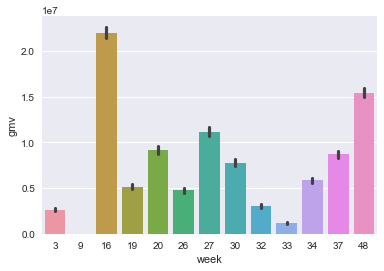

In [100]:
import seaborn as sns
sns.barplot(x = 'week', y = 'gmv', data = consumer_data[consumer_data['special_sales']==1], estimator = np.sum)

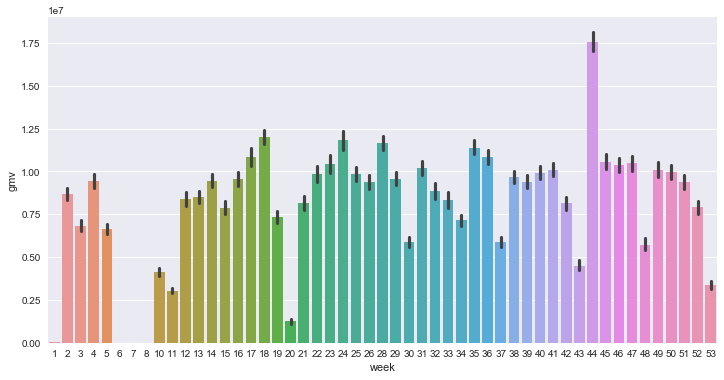

In [101]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'week', y = 'gmv', data = consumer_data[consumer_data['special_sales']==0], estimator = np.sum)

# Making NPS and Stock Index usable 

In [102]:
Monthly_NPS_stock = pd.read_excel("Media data and other information.xlsx", sheet_name = 3, skiprows=1)

The NPS or Net Promoter Score is an index ranging from -100 to 100 that measures the willingness of customers to recommed 
a company's products or services to others. It is used as a proxy for gauging the customer's overall satisfaction with a company's product or service and the customer's loyalty to the brand.

In [103]:
Monthly_NPS_stock

Unnamed: 0  July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  \
0          NPS    54.60   59.99    46.93   44.40   47.00   45.80   47.09   
1  Stock Index  1177.00 1206.00  1101.00 1210.00 1233.00 1038.00 1052.00   

   Feb'16  Mar'16  Apr'16  May'16  June'16  
0   50.33   49.02   51.83   47.31    50.52  
1 1222.00 1015.00 1242.00 1228.00  1194.00

In [104]:
Monthly_NPS_stock.set_index(['Unnamed: 0'], inplace = True)
Monthly_NPS_stock.index.name = ""
Monthly_NPS_stock

July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  Feb'16  \
                                                                                
NPS            54.60   59.99    46.93   44.40   47.00   45.80   47.09   50.33   
Stock Index  1177.00 1206.00  1101.00 1210.00 1233.00 1038.00 1052.00 1222.00   

             Mar'16  Apr'16  May'16  June'16  
                                              
NPS           49.02   51.83   47.31    50.52  
Stock Index 1015.00 1242.00 1228.00  1194.00

In [105]:
Monthly_NPS_stock = Monthly_NPS_stock.T
Monthly_NPS_stock

NPS  Stock Index
July'15 54.60      1177.00
Aug'15  59.99      1206.00
Sept'15 46.93      1101.00
Oct'15  44.40      1210.00
Nov'15  47.00      1233.00
Dec'15  45.80      1038.00
Jan'16  47.09      1052.00
Feb'16  50.33      1222.00
Mar'16  49.02      1015.00
Apr'16  51.83      1242.00
May'16  47.31      1228.00
June'16 50.52      1194.00

In [106]:
Monthly_NPS_stock.index = list([7,8,9,10,11,12,1,2,3,4,5,6])

In [107]:
Monthly_NPS_stock

NPS  Stock Index
7  54.60      1177.00
8  59.99      1206.00
9  46.93      1101.00
10 44.40      1210.00
11 47.00      1233.00
12 45.80      1038.00
1  47.09      1052.00
2  50.33      1222.00
3  49.02      1015.00
4  51.83      1242.00
5  47.31      1228.00
6  50.52      1194.00

In [108]:
consumer_data= consumer_data.merge(Monthly_NPS_stock, how='left', left_on = 'Month', right_index = True)

In [109]:
consumer_data.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
0      7  385.00      1   10               GamingAccessory          699   
1      7 2249.00      1    7                     HomeAudio         2800   
2      7  428.00      1    7               GamingAccessory          999   
3      7 2950.00      1    6                     HomeAudio         3299   
4      7 1599.00      1    7                     HomeAudio         3700   

   product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                        4         6                44.92        385.00   
1                        4         3                19.68       2249.00   
2                        3         4                57.16        428.00   
3                        5         1                10.58       2950.00   
4                        3         4                56.78       1599.00   

   order_payment_type_Prepaid       Date  week  special_sales   NPS  \
0                           1 2015-07-01     1              0 54.60   
1                           1 2015-07-01     1              0 54.60   
2                           1 2015-07-01     1              0 54.60   
3                           1 2015-07-01     1              0 54.60   
4                           1 2015-07-03     1              0 54.60   

   Stock Index  
0      1177.00  
1      1177.00  
2      1177.00  
3      1177.00  
4      1177.00

In [110]:
consumer_data.isna().sum()

Month                            0
gmv                              0
units                            0
sla                              0
product_analytic_sub_category    0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
Date                             0
week                             0
special_sales                    0
NPS                              0
Stock Index                      0
dtype: int64

# Making media spent information usable

In [111]:
MediaInvestment = pd.read_excel("Media data and other information.xlsx", sheet_name = 1,skiprows=2,usecols = 'B:M')

In [112]:
MediaInvestment

Year  Month  Total Investment    TV  Digital  Sponsorship  \
0  2015.00   7.00             17.06  0.22     2.53         7.41   
1  2015.00   8.00              5.06  0.01     1.28         1.06   
2  2015.00   9.00             96.25  3.88     1.36        62.79   
3  2015.00  10.00            170.16  6.14    12.62        84.67   
4  2015.00  11.00             51.22  4.22     1.28        14.17   
5  2015.00  12.00            106.75  5.40     3.06        56.71   
6  2016.00   1.00             74.20  4.38     0.46         4.20   
7  2016.00   2.00             48.05  2.59     1.91        11.73   
8  2016.00   3.00            100.02  9.30     2.10        41.59   
9  2016.00   4.00             56.85  5.21     0.87        24.31   
10 2016.00   5.00             78.06  1.37     0.77        31.68   
11 2016.00   6.00             42.83  1.66     1.42        25.05   
12     nan    nan               nan   nan      nan          nan   
13     nan    nan               nan   nan      nan          nan   
14     nan    nan               nan   nan      nan          nan   
15     nan    nan               nan 18.55      nan          nan   

    Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0                0.00              1.33         0.55  5.02    nan    nan  
1                0.00              0.13         0.07  2.51    nan    nan  
2                0.61             16.38         5.04  6.20    nan    nan  
3                3.44             24.37         6.97 31.93    nan    nan  
4                0.17             19.56         6.60  5.22    nan    nan  
5                1.07             22.50         6.83 11.18    nan    nan  
6                0.90             22.90         7.37  4.20   2.70  27.09  
7                0.60             19.89         6.47  4.87    nan    nan  
8                0.37             18.44         6.22  5.19   0.87  15.95  
9                0.03             16.51         5.69  4.22    nan    nan  
10               0.79             23.65         6.80  6.91   1.10   4.99  
11               0.05              7.97         2.77  3.74    nan    nan  
12                nan               nan          nan   nan    nan    nan  
13                nan               nan          nan   nan    nan    nan  
14                nan               nan          nan   nan    nan    nan  
15                nan               nan          nan   nan    nan    nan

In [113]:
MediaInvestment = MediaInvestment.iloc[0:12]
MediaInvestment=MediaInvestment.fillna(0)
MediaInvestment.drop(['Year'], axis = 1, inplace = True)

In [114]:
MediaInvestment['Month'] = MediaInvestment['Month'].astype('int')
MediaInvestment.set_index(['Month'], inplace = True)
MediaInvestment

Total Investment   TV  Digital  Sponsorship  Content Marketing  \
Month                                                                   
7                 17.06 0.22     2.53         7.41               0.00   
8                  5.06 0.01     1.28         1.06               0.00   
9                 96.25 3.88     1.36        62.79               0.61   
10               170.16 6.14    12.62        84.67               3.44   
11                51.22 4.22     1.28        14.17               0.17   
12               106.75 5.40     3.06        56.71               1.07   
1                 74.20 4.38     0.46         4.20               0.90   
2                 48.05 2.59     1.91        11.73               0.60   
3                100.02 9.30     2.10        41.59               0.37   
4                 56.85 5.21     0.87        24.31               0.03   
5                 78.06 1.37     0.77        31.68               0.79   
6                 42.83 1.66     1.42        25.05               0.05   

       Online marketing   Affiliates   SEM  Radio  Other  
Month                                                     
7                  1.33         0.55  5.02   0.00   0.00  
8                  0.13         0.07  2.51   0.00   0.00  
9                 16.38         5.04  6.20   0.00   0.00  
10                24.37         6.97 31.93   0.00   0.00  
11                19.56         6.60  5.22   0.00   0.00  
12                22.50         6.83 11.18   0.00   0.00  
1                 22.90         7.37  4.20   2.70  27.09  
2                 19.89         6.47  4.87   0.00   0.00  
3                 18.44         6.22  5.19   0.87  15.95  
4                 16.51         5.69  4.22   0.00   0.00  
5                 23.65         6.80  6.91   1.10   4.99  
6                  7.97         2.77  3.74   0.00   0.00

In [115]:
MediaInvestment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 7 to 6
Data columns (total 10 columns):
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10)
memory usage: 1.0 KB


In [116]:
MediaInvestment.rename(columns = {' Affiliates': 'Affiliates'}, inplace = True)

In [117]:
consumer_data= consumer_data.merge(MediaInvestment, how='left', left_on = 'Month', right_index = True)

In [118]:
consumer_data.isna().sum()

Month                            0
gmv                              0
units                            0
sla                              0
product_analytic_sub_category    0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
Date                             0
week                             0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
dtype: int64

In [119]:
consumer_data.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
0      7  385.00      1   10               GamingAccessory          699   
1      7 2249.00      1    7                     HomeAudio         2800   
2      7  428.00      1    7               GamingAccessory          999   
3      7 2950.00      1    6                     HomeAudio         3299   
4      7 1599.00      1    7                     HomeAudio         3700   

   product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                        4         6                44.92        385.00   
1                        4         3                19.68       2249.00   
2                        3         4                57.16        428.00   
3                        5         1                10.58       2950.00   
4                        3         4                56.78       1599.00   

   ...    Total Investment   TV  Digital  Sponsorship  Content Marketing  \
0  ...               17.06 0.22     2.53         7.41               0.00   
1  ...               17.06 0.22     2.53         7.41               0.00   
2  ...               17.06 0.22     2.53         7.41               0.00   
3  ...               17.06 0.22     2.53         7.41               0.00   
4  ...               17.06 0.22     2.53         7.41               0.00   

   Online marketing  Affiliates  SEM  Radio  Other  
0              1.33        0.55 5.02   0.00   0.00  
1              1.33        0.55 5.02   0.00   0.00  
2              1.33        0.55 5.02   0.00   0.00  
3              1.33        0.55 5.02   0.00   0.00  
4              1.33        0.55 5.02   0.00   0.00  

[5 rows x 26 columns]

In [120]:
consumer_data.columns

Index(['Month', 'gmv', 'units', 'sla', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'Date', 'week', 'special_sales', 'NPS', 'Stock Index',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [121]:
#Pay days are 1st and 15th of every month
consumer_data['pay_day'] = np.where((consumer_data['Date'].dt.day ==1) | (consumer_data['Date'].dt.day ==15), 1, 0)

In [122]:
consumer_data[consumer_data[['Date', 'pay_day']]['pay_day'] == 1][['Date', 'pay_day']]

Date  pay_day
0      2015-07-01        1
1      2015-07-01        1
2      2015-07-01        1
3      2015-07-01        1
8075   2015-07-15        1
8076   2015-07-15        1
8077   2015-07-15        1
8078   2015-07-15        1
8079   2015-07-15        1
8080   2015-07-15        1
8081   2015-07-15        1
8082   2015-07-15        1
8083   2015-07-15        1
8084   2015-07-15        1
8085   2015-07-15        1
8086   2015-07-15        1
8087   2015-07-15        1
8088   2015-07-15        1
8089   2015-07-15        1
8090   2015-07-15        1
8091   2015-07-15        1
8092   2015-07-15        1
8093   2015-07-15        1
8094   2015-07-15        1
8095   2015-07-15        1
8096   2015-07-15        1
8097   2015-07-15        1
8098   2015-07-15        1
8099   2015-07-15        1
8100   2015-07-15        1
...           ...      ...
417675 2016-06-15        1
417676 2016-06-15        1
417677 2016-06-15        1
417678 2016-06-15        1
417679 2016-06-15        1
417680 2016-06-15        1
417681 2016-06-15        1
417682 2016-06-15        1
417683 2016-06-15        1
417684 2016-06-15        1
417685 2016-06-15        1
417686 2016-06-15        1
417687 2016-06-15        1
417688 2016-06-15        1
417689 2016-06-15        1
417690 2016-06-15        1
417691 2016-06-15        1
417692 2016-06-15        1
417693 2016-06-15        1
417694 2016-06-15        1
417695 2016-06-15        1
417696 2016-06-15        1
417697 2016-06-15        1
417698 2016-06-15        1
417699 2016-06-15        1
417700 2016-06-15        1
417701 2016-06-15        1
417702 2016-06-15        1
417703 2016-06-15        1
417704 2016-06-15        1

[27801 rows x 2 columns]

## Creating separate DataFrames for the 3 sub-categories

In [331]:
Data_CameraAccessory = consumer_data[consumer_data.product_analytic_sub_category == "CameraAccessory"]
Data_GamingAccessory = consumer_data[consumer_data.product_analytic_sub_category == "GamingAccessory"]
Data_HomeAudio = consumer_data[consumer_data.product_analytic_sub_category == "HomeAudio"]

In [332]:
Data_CameraAccessory.iloc[:,16:26].head()

Total Investment   TV  Digital  Sponsorship  Content Marketing  \
5              17.06 0.22     2.53         7.41               0.00   
6              17.06 0.22     2.53         7.41               0.00   
10             17.06 0.22     2.53         7.41               0.00   
21             17.06 0.22     2.53         7.41               0.00   
23             17.06 0.22     2.53         7.41               0.00   

    Online marketing  Affiliates  SEM  Radio  Other  
5               1.33        0.55 5.02   0.00   0.00  
6               1.33        0.55 5.02   0.00   0.00  
10              1.33        0.55 5.02   0.00   0.00  
21              1.33        0.55 5.02   0.00   0.00  
23              1.33        0.55 5.02   0.00   0.00

In [333]:
# getting the media spent proportional to category specific gmv
Data_CameraAccessory.iloc[:,16:26] = Data_CameraAccessory.iloc[:,16:26]*GMV[GMV['product_analytic_sub_category'] 
                                                                            == "CameraAccessory"]['gmv'][0]

In [334]:
Data_CameraAccessory.head()

Month    gmv  units  sla product_analytic_sub_category  product_mrp  \
5       7 150.00      1    4               CameraAccessory          400   
6       7 339.00      1    1               CameraAccessory         1490   
10      7 189.00      1    6               CameraAccessory          250   
21      7 205.00      1   12               CameraAccessory          270   
23      7 889.00      1    1               CameraAccessory         1699   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
5                         3         1                62.50        150.00   
6                         1         0                77.25        339.00   
10                        3         3                24.40        189.00   
21                        2        10                24.07        205.00   
23                        1         0                47.68        889.00   

     ...      TV Digital  Sponsorship  Content Marketing  Online marketing  \
5    ...    0.02    0.19         0.54               0.00              0.10   
6    ...    0.02    0.19         0.54               0.00              0.10   
10   ...    0.02    0.19         0.54               0.00              0.10   
21   ...    0.02    0.19         0.54               0.00              0.10   
23   ...    0.02    0.19         0.54               0.00              0.10   

    Affiliates  SEM  Radio  Other  pay_day  
5         0.04 0.37   0.00   0.00        0  
6         0.04 0.37   0.00   0.00        0  
10        0.04 0.37   0.00   0.00        0  
21        0.04 0.37   0.00   0.00        0  
23        0.04 0.37   0.00   0.00        0  

[5 rows x 27 columns]

In [335]:
Data_GamingAccessory.iloc[:,16:26] = Data_GamingAccessory.iloc[:,16:26]*GMV[GMV['product_analytic_sub_category'] 
                                                                            == "GamingAccessory"]['gmv'][1]

In [336]:
Data_GamingAccessory.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
0       7  385.00      1   10               GamingAccessory          699   
2       7  428.00      1    7               GamingAccessory          999   
7       7  269.00      1    5               GamingAccessory          410   
12      7  689.00      1    1               GamingAccessory          790   
13      7 2280.00      1    4               GamingAccessory         3500   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                         4         6                44.92        385.00   
2                         3         4                57.16        428.00   
7                         1         4                34.39        269.00   
12                        1         0                12.78        689.00   
13                        2         2                34.86       2280.00   

     ...      TV Digital  Sponsorship  Content Marketing  Online marketing  \
0    ...    0.01    0.12         0.35               0.00              0.06   
2    ...    0.01    0.12         0.35               0.00              0.06   
7    ...    0.01    0.12         0.35               0.00              0.06   
12   ...    0.01    0.12         0.35               0.00              0.06   
13   ...    0.01    0.12         0.35               0.00              0.06   

    Affiliates  SEM  Radio  Other  pay_day  
0         0.03 0.24   0.00   0.00        1  
2         0.03 0.24   0.00   0.00        1  
7         0.03 0.24   0.00   0.00        0  
12        0.03 0.24   0.00   0.00        0  
13        0.03 0.24   0.00   0.00        0  

[5 rows x 27 columns]

In [337]:
Data_HomeAudio.iloc[:,16:26] = Data_HomeAudio.iloc[:,16:26]*GMV[GMV['product_analytic_sub_category'] == "HomeAudio"]['gmv'][2]

In [338]:
Data_HomeAudio.head()

Month     gmv  units  sla product_analytic_sub_category  product_mrp  \
1      7 2249.00      1    7                     HomeAudio         2800   
3      7 2950.00      1    6                     HomeAudio         3299   
4      7 1599.00      1    7                     HomeAudio         3700   
8      7  599.00      1    6                     HomeAudio         1499   
9      7 4794.00      1    1                     HomeAudio        10250   

   product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
1                        4         3                19.68       2249.00   
3                        5         1                10.58       2950.00   
4                        3         4                56.78       1599.00   
8                        1         5                60.04        599.00   
9                        1         0                53.23       4794.00   

    ...      TV Digital  Sponsorship  Content Marketing  Online marketing  \
1   ...    0.01    0.17         0.50               0.00              0.09   
3   ...    0.01    0.17         0.50               0.00              0.09   
4   ...    0.01    0.17         0.50               0.00              0.09   
8   ...    0.01    0.17         0.50               0.00              0.09   
9   ...    0.01    0.17         0.50               0.00              0.09   

   Affiliates  SEM  Radio  Other  pay_day  
1        0.04 0.34   0.00   0.00        1  
3        0.04 0.34   0.00   0.00        1  
4        0.04 0.34   0.00   0.00        0  
8        0.04 0.34   0.00   0.00        0  
9        0.04 0.34   0.00   0.00        0  

[5 rows x 27 columns]

In [339]:
#########################################################################################
#EDA
#########################################################################################

In [340]:
#Combining the 3 dataframes
consumer_data_filtered=Data_CameraAccessory.append([Data_GamingAccessory,Data_HomeAudio])

In [341]:
consumer_data_filtered.head()

Month    gmv  units  sla product_analytic_sub_category  product_mrp  \
5       7 150.00      1    4               CameraAccessory          400   
6       7 339.00      1    1               CameraAccessory         1490   
10      7 189.00      1    6               CameraAccessory          250   
21      7 205.00      1   12               CameraAccessory          270   
23      7 889.00      1    1               CameraAccessory         1699   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
5                         3         1                62.50        150.00   
6                         1         0                77.25        339.00   
10                        3         3                24.40        189.00   
21                        2        10                24.07        205.00   
23                        1         0                47.68        889.00   

     ...      TV Digital  Sponsorship  Content Marketing  Online marketing  \
5    ...    0.02    0.19         0.54               0.00              0.10   
6    ...    0.02    0.19         0.54               0.00              0.10   
10   ...    0.02    0.19         0.54               0.00              0.10   
21   ...    0.02    0.19         0.54               0.00              0.10   
23   ...    0.02    0.19         0.54               0.00              0.10   

    Affiliates  SEM  Radio  Other  pay_day  
5         0.04 0.37   0.00   0.00        0  
6         0.04 0.37   0.00   0.00        0  
10        0.04 0.37   0.00   0.00        0  
21        0.04 0.37   0.00   0.00        0  
23        0.04 0.37   0.00   0.00        0  

[5 rows x 27 columns]

In [342]:
consumer_data_filtered.isna().sum()

Month                            0
gmv                              0
units                            0
sla                              0
product_analytic_sub_category    0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
Date                             0
week                             0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
dtype: int64

In [343]:
consumer_data_filtered['Year'] = consumer_data_filtered.Date.dt.year

In [344]:
# GMV

consumer_data_filtered.gmv.describe()
#GMV varies from 10 - 148050

count   431861.00
mean      1174.33
std       2307.55
min         10.00
25%        282.00
50%        497.00
75%       1299.00
max     148050.00
Name: gmv, dtype: float64

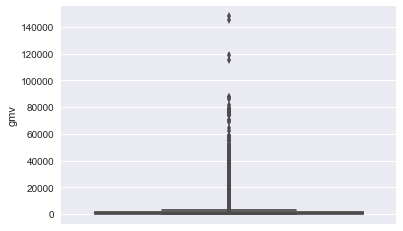

In [345]:
sns.boxplot(x='gmv', data = consumer_data_filtered, orient = 'vertical')

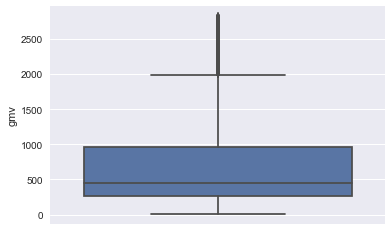

In [346]:
dummy = consumer_data_filtered.copy()
q1 = dummy['gmv'].quantile(0.25)
q3 = dummy['gmv'].quantile(0.75)
iqr = q3 - q1
dummy = dummy[(dummy['gmv'] > q1 - 1.5*iqr) & (dummy['gmv'] < q3 + 1.5*iqr)]

sns.boxplot(x='gmv', data = dummy, orient = 'vertical')

In [347]:
quantile=[0,0.5,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
consumer_data_filtered.gmv.quantile(quantile)
#50% values below 645 - outliers detected

0.00       10.00
0.50      497.00
0.10      199.00
0.15      225.00
0.20      250.00
0.25      282.00
0.30      300.00
0.35      339.00
0.40      383.00
0.45      439.00
0.50      497.00
0.55      579.00
0.60      693.00
0.65      834.00
0.70      999.00
0.75     1299.00
0.80     1605.00
0.85     2024.00
0.90     2599.00
0.95     3850.00
1.00   148050.00
Name: gmv, dtype: float64

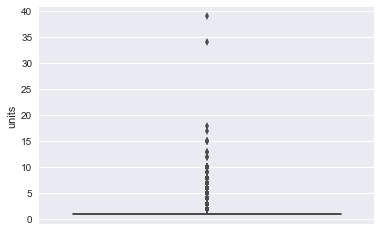

In [348]:
#Units
sns.boxplot(x='units', data = consumer_data_filtered, orient = 'vertical')

In [349]:
consumer_data_filtered.units.quantile(quantile)
#Range varies from 0 to 39 units. 95% of the data contains unit values as 1.

0.00    1.00
0.50    1.00
0.10    1.00
0.15    1.00
0.20    1.00
0.25    1.00
0.30    1.00
0.35    1.00
0.40    1.00
0.45    1.00
0.50    1.00
0.55    1.00
0.60    1.00
0.65    1.00
0.70    1.00
0.75    1.00
0.80    1.00
0.85    1.00
0.90    1.00
0.95    1.00
1.00   39.00
Name: units, dtype: float64

In [350]:
consumer_data_filtered['sla'].describe()

count   431861.00
mean         6.28
std          2.53
min          0.00
25%          5.00
50%          6.00
75%          8.00
max         60.00
Name: sla, dtype: float64

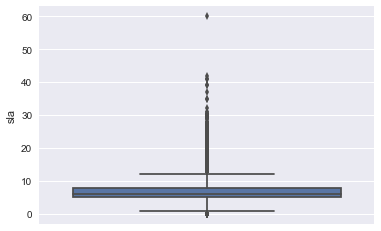

In [351]:
sns.boxplot(x='sla', data = consumer_data_filtered, orient = 'vertical')

In [352]:
consumer_data_filtered.sla.quantile(quantile)

0.00    0.00
0.50    6.00
0.10    3.00
0.15    4.00
0.20    4.00
0.25    5.00
0.30    5.00
0.35    5.00
0.40    5.00
0.45    6.00
0.50    6.00
0.55    6.00
0.60    7.00
0.65    7.00
0.70    7.00
0.75    8.00
0.80    8.00
0.85    9.00
0.90    9.00
0.95   11.00
1.00   60.00
Name: sla, dtype: float64

In [353]:
# Product MRP:
consumer_data_filtered.product_mrp.describe()

count   431861.00
mean      2113.70
std       3355.93
min         99.00
25%        745.00
50%       1100.00
75%       2050.00
max     180000.00
Name: product_mrp, dtype: float64

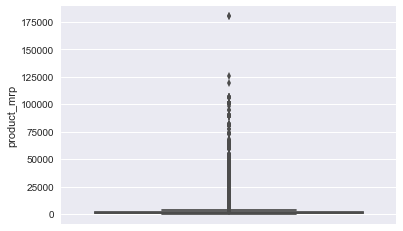

In [354]:
sns.boxplot(x='product_mrp', data = consumer_data_filtered, orient = 'vertical')

In [355]:
consumer_data_filtered.product_mrp.quantile(quantile)

0.00       99.00
0.50     1100.00
0.10      410.00
0.15      500.00
0.20      599.00
0.25      745.00
0.30      800.00
0.35      850.00
0.40      950.00
0.45      999.00
0.50     1100.00
0.55     1299.00
0.60     1499.00
0.65     1799.00
0.70     1999.00
0.75     2050.00
0.80     2990.00
0.85     3500.00
0.90     4570.00
0.95     6199.00
1.00   180000.00
Name: product_mrp, dtype: float64

In [356]:
# Discount Percentage
consumer_data_filtered.discount_percentage.describe()

count   431861.00
mean        46.69
std         23.54
min          0.00
25%         28.09
50%         47.50
75%         63.96
max         98.31
Name: discount_percentage, dtype: float64

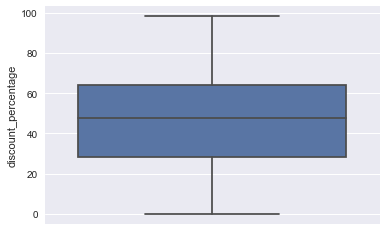

In [357]:
sns.boxplot(x='discount_percentage', data = consumer_data_filtered, orient = 'vertical')

In [358]:
consumer_data_filtered['discount_percentage'].quantile(quantile)

0.00    0.00
0.50   47.50
0.10   15.01
0.15   19.99
0.20   23.67
0.25   28.09
0.30   32.20
0.35   36.01
0.40   40.04
0.45   43.40
0.50   47.50
0.55   50.20
0.60   53.71
0.65   57.09
0.70   59.80
0.75   63.96
0.80   68.60
0.85   75.04
0.90   79.97
0.95   85.73
1.00   98.31
Name: discount_percentage, dtype: float64

In [359]:
# NPS Scores:
consumer_data_filtered['NPS'].describe()

count   431861.00
mean        48.34
std          2.66
min         44.40
25%         46.93
50%         47.31
75%         50.33
max         59.99
Name: NPS, dtype: float64

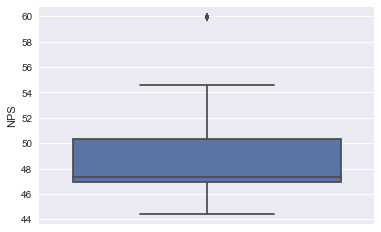

In [360]:
sns.boxplot(x='NPS', data = consumer_data_filtered, orient = 'vertical')

In [361]:
consumer_data_filtered['NPS'].quantile(quantile)

0.00   44.40
0.50   47.31
0.10   44.40
0.15   45.80
0.20   45.80
0.25   46.93
0.30   47.00
0.35   47.09
0.40   47.09
0.45   47.31
0.50   47.31
0.55   47.31
0.60   49.02
0.65   49.02
0.70   50.33
0.75   50.33
0.80   50.52
0.85   50.52
0.90   51.83
0.95   54.60
1.00   59.99
Name: NPS, dtype: float64

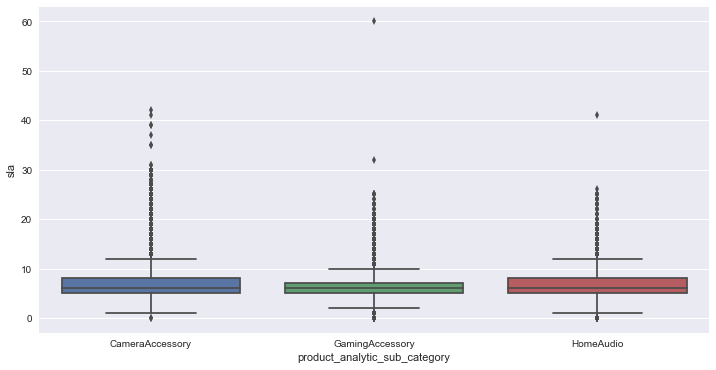

In [362]:
# How is the distribution of SLA for different product sub categories
plt.figure(figsize = (12,6))
b1 = sns.boxplot(data=consumer_data_filtered,x = 'product_analytic_sub_category', y = 'sla')

In [363]:
consumer_data_filtered.sla.mean()

6.275949900546704

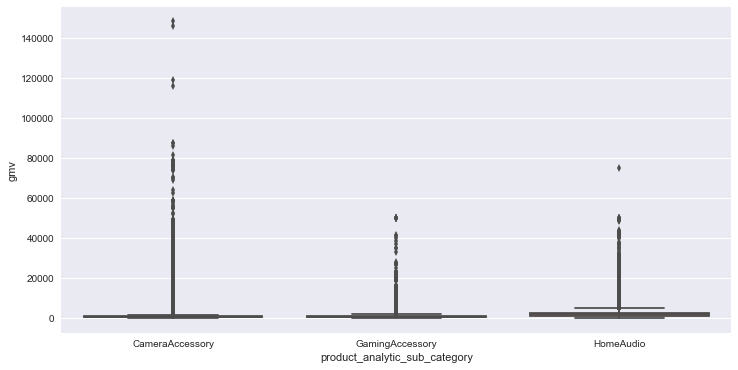

In [364]:
# Distribution of GMV for each product category
plt.figure(figsize = (12,6))
b2 = sns.boxplot(data=consumer_data_filtered,x ='product_analytic_sub_category', y='gmv')

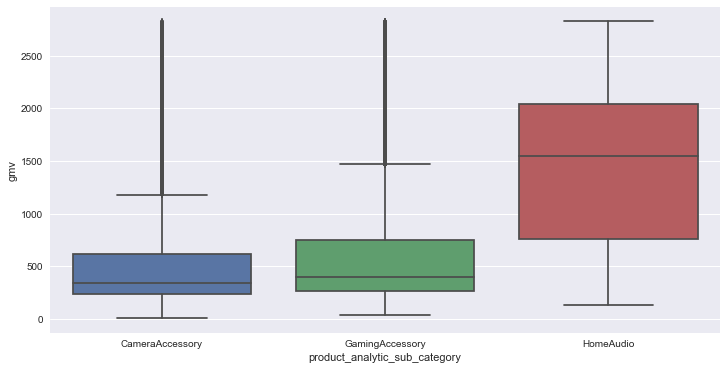

In [365]:
# Distribution of GMV for each product category
plt.figure(figsize = (12,6))
b2 = sns.boxplot(data=dummy,x ='product_analytic_sub_category', y='gmv')

In [366]:
# Mean GMV values for all three sub categories remained the same. We observe a lot of outliers in the CameraAccessory category

In [367]:
d1 = consumer_data_filtered[consumer_data_filtered['product_analytic_sub_category'] == "CameraAccessory"].groupby('week',as_index=False)[['discount_percentage']].mean()
d1['product_analytic_subtype'] = "CameraAccessory"
d1

week  discount_percentage product_analytic_subtype
0      1                52.47          CameraAccessory
1      2                44.89          CameraAccessory
2      3                45.42          CameraAccessory
3      4                44.33          CameraAccessory
4      5                43.58          CameraAccessory
5      6                51.79          CameraAccessory
6     10                45.22          CameraAccessory
7     11                47.14          CameraAccessory
8     12                46.15          CameraAccessory
9     13                45.04          CameraAccessory
10    14                58.35          CameraAccessory
11    15                46.99          CameraAccessory
12    16                54.02          CameraAccessory
13    17                45.92          CameraAccessory
14    18                47.19          CameraAccessory
15    19                48.91          CameraAccessory
16    20                46.97          CameraAccessory
17    21                47.14          CameraAccessory
18    22                43.61          CameraAccessory
19    23                46.07          CameraAccessory
20    24                50.71          CameraAccessory
21    25                45.08          CameraAccessory
22    26                49.54          CameraAccessory
23    27                46.53          CameraAccessory
24    28                50.86          CameraAccessory
25    29                50.91          CameraAccessory
26    30                49.52          CameraAccessory
27    31                45.65          CameraAccessory
28    32                52.68          CameraAccessory
29    33                46.94          CameraAccessory
30    34                48.77          CameraAccessory
31    35                54.52          CameraAccessory
32    36                49.81          CameraAccessory
33    37                51.50          CameraAccessory
34    38                54.57          CameraAccessory
35    39                50.66          CameraAccessory
36    40                51.59          CameraAccessory
37    41                54.45          CameraAccessory
38    42                54.14          CameraAccessory
39    43                54.23          CameraAccessory
40    44                55.43          CameraAccessory
41    45                58.64          CameraAccessory
42    46                57.90          CameraAccessory
43    47                55.77          CameraAccessory
44    48                56.05          CameraAccessory
45    49                56.81          CameraAccessory
46    50                58.28          CameraAccessory
47    51                54.55          CameraAccessory
48    52                50.62          CameraAccessory
49    53                51.52          CameraAccessory

In [368]:
d2 = consumer_data_filtered[consumer_data_filtered['product_analytic_sub_category'] == "GamingAccessory"].groupby('week',as_index=False)[['discount_percentage']].mean()
d2['product_analytic_subtype'] = "GamingAccessory"
d2

week  discount_percentage product_analytic_subtype
0      1                26.08          GamingAccessory
1      2                37.14          GamingAccessory
2      3                41.44          GamingAccessory
3      4                38.12          GamingAccessory
4      5                41.80          GamingAccessory
5      6                62.93          GamingAccessory
6      7                38.60          GamingAccessory
7      8                48.64          GamingAccessory
8      9                41.89          GamingAccessory
9     10                40.06          GamingAccessory
10    11                39.30          GamingAccessory
11    12                38.23          GamingAccessory
12    13                40.99          GamingAccessory
13    14                39.74          GamingAccessory
14    15                38.00          GamingAccessory
15    16                49.44          GamingAccessory
16    17                41.02          GamingAccessory
17    18                45.40          GamingAccessory
18    19                46.45          GamingAccessory
19    20                42.82          GamingAccessory
20    21                42.85          GamingAccessory
21    22                44.85          GamingAccessory
22    23                42.45          GamingAccessory
23    24                45.54          GamingAccessory
24    25                47.09          GamingAccessory
25    26                53.21          GamingAccessory
26    27                48.77          GamingAccessory
27    28                48.02          GamingAccessory
28    29                45.70          GamingAccessory
29    30                45.69          GamingAccessory
30    31                45.15          GamingAccessory
31    32                46.12          GamingAccessory
32    33                48.55          GamingAccessory
33    34                50.99          GamingAccessory
34    35                51.64          GamingAccessory
35    36                49.89          GamingAccessory
36    37                48.84          GamingAccessory
37    38                42.62          GamingAccessory
38    39                42.14          GamingAccessory
39    40                42.46          GamingAccessory
40    41                42.13          GamingAccessory
41    42                43.59          GamingAccessory
42    43                46.21          GamingAccessory
43    44                46.53          GamingAccessory
44    45                46.88          GamingAccessory
45    46                50.90          GamingAccessory
46    47                51.74          GamingAccessory
47    48                48.98          GamingAccessory
48    49                46.35          GamingAccessory
49    50                46.61          GamingAccessory
50    51                46.14          GamingAccessory
51    52                43.90          GamingAccessory
52    53                42.75          GamingAccessory

In [369]:
d3 = consumer_data_filtered[consumer_data_filtered['product_analytic_sub_category'] == "HomeAudio"].groupby('week',as_index=False)[['discount_percentage']].mean()
d3['product_analytic_subtype'] = "HomeAudio"
d3

week  discount_percentage product_analytic_subtype
0      1                35.94                HomeAudio
1      2                32.79                HomeAudio
2      3                33.35                HomeAudio
3      4                32.99                HomeAudio
4      5                32.69                HomeAudio
5      6                16.13                HomeAudio
6     10                36.95                HomeAudio
7     11                36.50                HomeAudio
8     12                35.87                HomeAudio
9     13                33.56                HomeAudio
10    14                34.59                HomeAudio
11    15                35.25                HomeAudio
12    16                42.83                HomeAudio
13    17                37.08                HomeAudio
14    18                36.87                HomeAudio
15    19                38.46                HomeAudio
16    20                36.55                HomeAudio
17    21                36.32                HomeAudio
18    22                34.57                HomeAudio
19    23                37.70                HomeAudio
20    24                40.22                HomeAudio
21    25                36.20                HomeAudio
22    26                42.14                HomeAudio
23    27                35.97                HomeAudio
24    28                40.61                HomeAudio
25    29                36.34                HomeAudio
26    30                38.93                HomeAudio
27    31                36.28                HomeAudio
28    32                39.31                HomeAudio
29    33                36.99                HomeAudio
30    34                40.56                HomeAudio
31    35                37.05                HomeAudio
32    36                34.80                HomeAudio
33    37                39.93                HomeAudio
34    38                36.61                HomeAudio
35    39                36.66                HomeAudio
36    40                37.46                HomeAudio
37    41                37.10                HomeAudio
38    42                38.39                HomeAudio
39    43                36.86                HomeAudio
40    44                39.39                HomeAudio
41    45                38.24                HomeAudio
42    46                40.26                HomeAudio
43    47                38.43                HomeAudio
44    48                38.27                HomeAudio
45    49                35.62                HomeAudio
46    50                33.92                HomeAudio
47    51                32.58                HomeAudio
48    52                32.96                HomeAudio
49    53                34.08                HomeAudio

In [ ]:
#Mean Discount offered by week for CameraAccessory
b3 = sns.catplot(data=d1,x = 'week' , y = 'discount_percentage',kind='point')
# Maximum discount offered in week 33

In [ ]:
#Mean Discount offered by week for GamingAccessory
b4 = sns.catplot(data=d2,x = 'week' , y = 'discount_percentage',kind='point')
# Maximum discount offered in the week 32, 42, 52, 60 and so on

In [ ]:
#Mean Discount offered by week for Home Audio
b5 = sns.catplot(data=d3,x = 'week' , y = 'discount_percentage',kind='point')
# Reverse trend observed for Home Audio Sub category, lowest discount in the week 32 , highest in 50, 54

In [ ]:
# Distribution of discounts offered on different events
e = consumer_data_filtered[consumer_data_filtered['special_sales']==1]
b6 = sns.catplot(data=e, x = 'Date' , y = 'discount_percentage' , kind = 'point')
#Distribution of Discount Percentage by Event Name'


In [ ]:
# Comparision of  mean gmv for normal days vs days on which there are holiday promotions
consumer_data_filtered.groupby('special_sales',as_index=False)[['gmv']].mean()
# The average gmv value is higher on the day when holiday promotions are there.

In [ ]:
# Consumer sentiment score 
b8 = sns.catplot(data=consumer_data_filtered,x = 'week', y= 'NPS',kind='point')

In [370]:
consumer_data_filtered.head()

Month    gmv  units  sla product_analytic_sub_category  product_mrp  \
5       7 150.00      1    4               CameraAccessory          400   
6       7 339.00      1    1               CameraAccessory         1490   
10      7 189.00      1    6               CameraAccessory          250   
21      7 205.00      1   12               CameraAccessory          270   
23      7 889.00      1    1               CameraAccessory         1699   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
5                         3         1                62.50        150.00   
6                         1         0                77.25        339.00   
10                        3         3                24.40        189.00   
21                        2        10                24.07        205.00   
23                        1         0                47.68        889.00   

    ...   Digital Sponsorship  Content Marketing  Online marketing  \
5   ...      0.19        0.54               0.00              0.10   
6   ...      0.19        0.54               0.00              0.10   
10  ...      0.19        0.54               0.00              0.10   
21  ...      0.19        0.54               0.00              0.10   
23  ...      0.19        0.54               0.00              0.10   

    Affiliates  SEM  Radio  Other  pay_day  Year  
5         0.04 0.37   0.00   0.00        0  2015  
6         0.04 0.37   0.00   0.00        0  2015  
10        0.04 0.37   0.00   0.00        0  2015  
21        0.04 0.37   0.00   0.00        0  2015  
23        0.04 0.37   0.00   0.00        0  2015  

[5 rows x 28 columns]

In [371]:
consumer_data_filtered.columns

Index(['Month', 'gmv', 'units', 'sla', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'Date', 'week', 'special_sales', 'NPS', 'Stock Index',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day',
       'Year'],
      dtype='object')

# Outlier Treatment

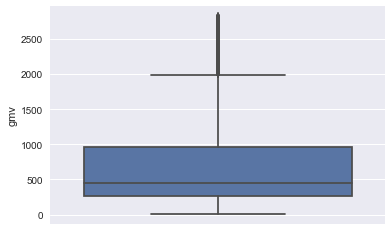

In [372]:
#Treating the gmv values
q1 = consumer_data_filtered['gmv'].quantile(0.25)
q3 = consumer_data_filtered['gmv'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['gmv'] > q1 - 1.5*iqr) & (consumer_data_filtered['gmv'] < q3 + 1.5*iqr)]

sns.boxplot(x='gmv', data = consumer_data_filtered, orient = 'vertical')

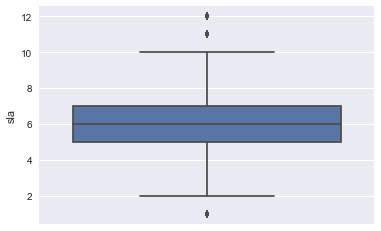

In [373]:
#treating the sla values
q1 = consumer_data_filtered['sla'].quantile(0.25)
q3 = consumer_data_filtered['sla'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['sla'] > q1 - 1.5*iqr) & (consumer_data_filtered['sla'] < q3 + 1.5*iqr)]

sns.boxplot(x='sla', data = consumer_data_filtered, orient = 'vertical')

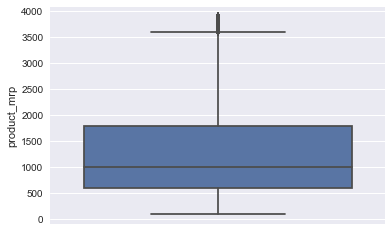

In [374]:
#treating the product_mrp values
q1 = consumer_data_filtered['product_mrp'].quantile(0.25)
q3 = consumer_data_filtered['product_mrp'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['product_mrp'] > q1 - 1.5*iqr) & (consumer_data_filtered['product_mrp'] < q3 + 1.5*iqr)]

sns.boxplot(x='product_mrp', data = consumer_data_filtered, orient = 'vertical')

In [375]:
numeric_cols = consumer_data_filtered.select_dtypes(exclude = ['object', 'datetime64[ns]']).columns
numeric_cols

Index(['Month', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'sla_diff', 'discount_percentage',
       'gmv_per_unit', 'order_payment_type_Prepaid', 'week', 'special_sales',
       'NPS', 'Stock Index', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'pay_day', 'Year'],
      dtype='object')

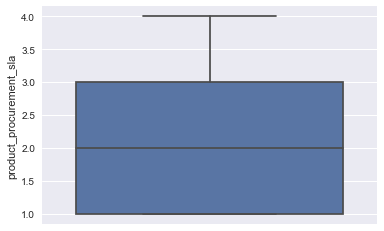

In [376]:
#treating the product_procurement_sla values
q1 = consumer_data_filtered['product_procurement_sla'].quantile(0.25)
q3 = consumer_data_filtered['product_procurement_sla'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['product_procurement_sla'] > q1 - 1.5*iqr) & (consumer_data_filtered['product_procurement_sla'] < q3 + 1.5*iqr)]

sns.boxplot(x='product_procurement_sla', data = consumer_data_filtered, orient = 'vertical')

In [377]:
# Group the data frame by week and product_analytic_sub_category and extract a number of stats from each group
weekly_data=consumer_data_filtered.groupby(['week', 'product_analytic_sub_category'],as_index=False).agg(
    {
         'gmv':sum,
         'units':sum,
         'sla':"mean",
         'product_mrp':"mean",
         'product_procurement_sla':"mean",
         'sla_diff': "mean",
         'discount_percentage':"mean",    
         'gmv_per_unit': "mean", 
         'order_payment_type_Prepaid':sum,
         'special_sales': sum,
         'NPS': "mean",
         'Stock Index':"mean",
         'Total Investment':"mean",
         'TV':"mean",
         'Digital':"mean",
         'Sponsorship':"mean",
         'Content Marketing':"mean",
         'Online marketing':"mean",
         'Affiliates':"mean",
         'SEM':"mean",
         'Radio':"mean",
         'Other':"mean",
         'pay_day':sum,
             }
)

weekly_data.head()

week product_analytic_sub_category        gmv  units  sla  product_mrp  \
0     1               CameraAccessory    4067.00     10 4.00      1047.70   
1     1               GamingAccessory    7758.00      9 5.56      1200.67   
2     1                     HomeAudio   12581.00      8 6.12      2769.38   
3     2               CameraAccessory 1003905.00   1780 6.86      1128.61   
4     2               GamingAccessory  763139.00   1326 6.54      1027.67   

   product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                     2.00      2.00                52.47        406.70   
1                     1.89      3.67                32.49        862.00   
2                     2.25      3.88                43.49       1572.62   
3                     2.04      4.82                46.50        571.62   
4                     2.19      4.35                40.22        583.01   

    ...      TV  Digital  Sponsorship  Content Marketing  Online marketing  \
0   ...    0.02     0.19         0.54               0.00              0.10   
1   ...    0.01     0.12         0.35               0.00              0.06   
2   ...    0.01     0.17         0.50               0.00              0.09   
3   ...    0.02     0.19         0.54               0.00              0.10   
4   ...    0.01     0.12         0.35               0.00              0.06   

   Affiliates  SEM  Radio  Other  pay_day  
0        0.04 0.37   0.00   0.00        0  
1        0.03 0.24   0.00   0.00        2  
2        0.04 0.34   0.00   0.00        1  
3        0.04 0.37   0.00   0.00        0  
4        0.03 0.24   0.00   0.00        0  

[5 rows x 25 columns]

In [378]:
weekly_data.shape

(153, 25)

In [379]:
weekly_data['pay_day'] = np.where(weekly_data['pay_day'] > 0, 1, 0)
weekly_data['special_sales'] = np.where(weekly_data['special_sales'] > 0, 1, 0)

In [380]:
#checking total sales on special_sales week vs non-special_sales week

In [381]:
ss1 = weekly_data[weekly_data['special_sales'] == 1]

In [382]:
ss1['gmv'].sum()

62735451.453578144

In [383]:
ss2 = weekly_data[weekly_data['special_sales'] == 0]

In [384]:
ss2['gmv'].sum()

131541361.60802883

In [385]:
62735451.453578144 / 131541361.60802883

0.4769256657120462

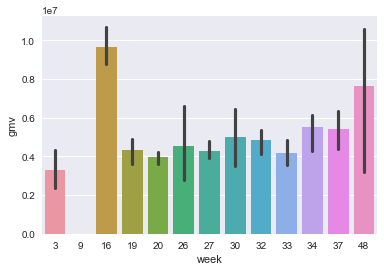

In [386]:
sns.barplot(x = 'week', y = 'gmv', data = ss1, estimator = np.sum)

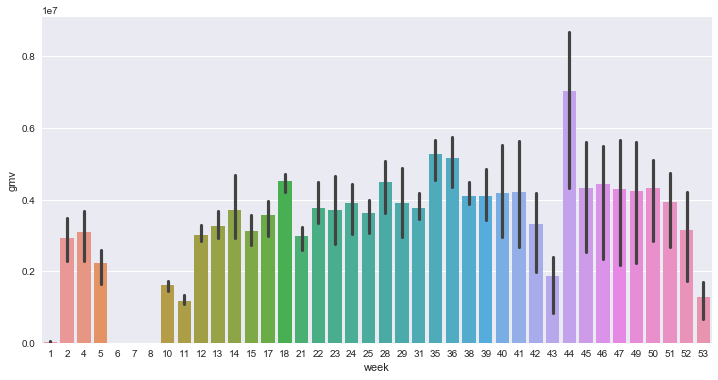

In [387]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'week', y = 'gmv', data = ss2, estimator = np.sum)

In [388]:
CameraAccessory_weekly = weekly_data[weekly_data['product_analytic_sub_category'] == 'CameraAccessory']
GamingAccessory_weekly = weekly_data[weekly_data['product_analytic_sub_category'] == 'GamingAccessory']
HomeAudio_weekly = weekly_data[weekly_data['product_analytic_sub_category'] == 'HomeAudio']

# Renaming columns (adding prefix avg and total)
cols = weekly_data.columns[~weekly_data.columns.isin(['week','product_analytic_sub_category','sla','product_mrp','discount_percentage','gmv_per_unit','NPSScore','stock_index'])]
weekly_data.rename(columns = dict(zip(cols, cols + '_total')), inplace=True)

cols = weekly_data.columns[weekly_data.columns.isin(['sla','product_mrp','discount_percentage','gmv_per_unit','NPSScore','stock_index'])]
weekly_data.rename(columns = dict(zip(cols, cols + '_avg')), inplace=True)


# Adstock 

In [389]:
# Assigning Adstock Rates for each Adv channel 
# we have considered these rates based on secondary research 
adstock_rate = [0.8, 0.5, 0.5, 0.5, 0.6, 0.1, 0.2, 0.5, 0.1] 
# These rates are use for EDA only

In [390]:
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

def adstock(df):
    df['TV_adstock'] = tsa.filters.filtertools.recursive_filter(df['TV'], adstock_rate[0])
    df['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(df['Digital'], adstock_rate[1])
    df['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(df['Sponsorship'], adstock_rate[2])
    df['content_marketing_adstock'] = tsa.filters.filtertools.recursive_filter(df['Content Marketing'], adstock_rate[3])
    df['online_marketing_adstock'] = tsa.filters.filtertools.recursive_filter(df['Online marketing'], adstock_rate[4])
    df['affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(df['Affiliates'], adstock_rate[5])
    df['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(df['SEM'], adstock_rate[6])
    df['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(df['Radio'], adstock_rate[7])
    df['Other_adstock'] = tsa.filters.filtertools.recursive_filter(df['Other'], adstock_rate[8])
    return 0

In [391]:
adstock(CameraAccessory_weekly)
CameraAccessory_weekly.head()

week product_analytic_sub_category        gmv  units  sla  product_mrp  \
0      1               CameraAccessory    4067.00     10 4.00      1047.70   
3      2               CameraAccessory 1003905.00   1780 6.86      1128.61   
6      3               CameraAccessory 1097503.00   1990 6.54      1186.39   
9      4               CameraAccessory 1092921.00   1991 6.56      1150.04   
12     5               CameraAccessory  747530.00   1343 6.48      1144.97   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                      2.00      2.00                52.47        406.70   
3                      2.04      4.82                46.50        571.62   
6                      2.04      4.50                47.76        558.00   
9                      2.07      4.50                45.40        553.12   
12                     2.10      4.38                45.26        564.68   

        ...        pay_day  TV_adstock  Digital_adstock  Sponsorship_adstock  \
0       ...              0        0.02             0.19                 0.54   
3       ...              0        0.03             0.28                 0.82   
6       ...              1        0.04             0.33                 0.95   
9       ...              0        0.05             0.35                 1.02   
12      ...              0        0.05             0.36                 1.05   

    content_marketing_adstock  online_marketing_adstock  affiliates_adstock  \
0                        0.00                      0.10                0.04   
3                        0.00                      0.16                0.04   
6                        0.00                      0.19                0.04   
9                        0.00                      0.21                0.04   
12                       0.00                      0.22                0.04   

    SEM_adstock  Radio_adstock  Other_adstock  
0          0.37           0.00           0.00  
3          0.44           0.00           0.00  
6          0.46           0.00           0.00  
9          0.46           0.00           0.00  
12         0.46           0.00           0.00  

[5 rows x 34 columns]

In [392]:
adstock(GamingAccessory_weekly)
GamingAccessory_weekly.head()

week product_analytic_sub_category       gmv  units  sla  product_mrp  \
1      1               GamingAccessory   7758.00      9 5.56      1200.67   
4      2               GamingAccessory 763139.00   1326 6.54      1027.67   
7      3               GamingAccessory 783978.36   1650 5.87       855.40   
10     4               GamingAccessory 765301.00   1303 6.00      1002.70   
13     5               GamingAccessory 551707.00    894 6.30      1047.57   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
1                      1.89      3.67                32.49        862.00   
4                      2.19      4.35                40.22        583.01   
7                      2.28      3.59                46.22        494.62   
10                     2.09      3.91                39.75        599.28   
13                     2.14      4.16                41.45        630.73   

        ...        pay_day  TV_adstock  Digital_adstock  Sponsorship_adstock  \
1       ...              1        0.01             0.12                 0.35   
4       ...              0        0.02             0.18                 0.52   
7       ...              1        0.02             0.21                 0.61   
10      ...              0        0.03             0.22                 0.65   
13      ...              0        0.03             0.23                 0.67   

    content_marketing_adstock  online_marketing_adstock  affiliates_adstock  \
1                        0.00                      0.06                0.03   
4                        0.00                      0.10                0.03   
7                        0.00                      0.12                0.03   
10                       0.00                      0.14                0.03   
13                       0.00                      0.14                0.03   

    SEM_adstock  Radio_adstock  Other_adstock  
1          0.24           0.00           0.00  
4          0.28           0.00           0.00  
7          0.29           0.00           0.00  
10         0.29           0.00           0.00  
13         0.29           0.00           0.00  

[5 rows x 34 columns]

In [393]:
adstock(HomeAudio_weekly)
HomeAudio_weekly.head()

week product_analytic_sub_category        gmv  units  sla  product_mrp  \
2      1                     HomeAudio   12581.00      8 6.12      2769.38   
5      2                     HomeAudio 1165624.00    909 7.49      1988.23   
8      3                     HomeAudio 1441028.00   1081 7.18      2063.21   
11     4                     HomeAudio 1230725.00    983 7.18      1942.15   
14     5                     HomeAudio  916000.00    710 7.30      1990.46   

    product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
2                      2.25      3.88                43.49       1572.62   
5                      1.91      5.58                32.63       1284.11   
8                      1.75      5.43                32.43       1337.00   
11                     1.73      5.45                31.34       1255.98   
14                     1.73      5.57                30.22       1291.96   

        ...        pay_day  TV_adstock  Digital_adstock  Sponsorship_adstock  \
2       ...              1        0.01             0.17                 0.50   
5       ...              0        0.03             0.26                 0.75   
8       ...              1        0.04             0.30                 0.87   
11      ...              0        0.04             0.32                 0.93   
14      ...              0        0.05             0.33                 0.97   

    content_marketing_adstock  online_marketing_adstock  affiliates_adstock  \
2                        0.00                      0.09                0.04   
5                        0.00                      0.14                0.04   
8                        0.00                      0.17                0.04   
11                       0.00                      0.19                0.04   
14                       0.00                      0.21                0.04   

    SEM_adstock  Radio_adstock  Other_adstock  
2          0.34           0.00           0.00  
5          0.41           0.00           0.00  
8          0.42           0.00           0.00  
11         0.42           0.00           0.00  
14         0.42           0.00           0.00  

[5 rows x 34 columns]

In [394]:
HomeAudio_weekly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 152
Data columns (total 34 columns):
week                             50 non-null int64
product_analytic_sub_category    50 non-null object
gmv                              50 non-null float64
units                            50 non-null int64
sla                              50 non-null float64
product_mrp                      50 non-null float64
product_procurement_sla          50 non-null float64
sla_diff                         50 non-null float64
discount_percentage              50 non-null float64
gmv_per_unit                     50 non-null float64
order_payment_type_Prepaid       50 non-null float64
special_sales                    50 non-null int32
NPS                              50 non-null float64
Stock Index                      50 non-null float64
Total Investment                 50 non-null float64
TV                               50 non-null float64
Digital                          50 non-null float64
Sp

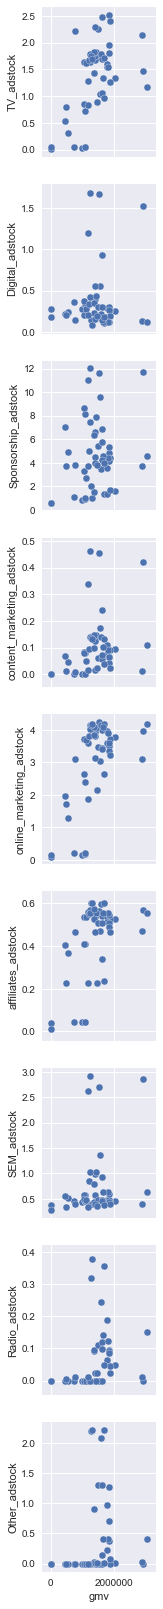

In [395]:
# Analyzing GMV against each channel adstock
g1 = sns.pairplot(CameraAccessory_weekly, y_vars=["TV_adstock", "Digital_adstock","Sponsorship_adstock","content_marketing_adstock",
                                       "online_marketing_adstock","affiliates_adstock","SEM_adstock","Radio_adstock","Other_adstock"]
                  ,x_vars=["gmv"])

a=weekly_data.columns.get_loc("Total Investment_total")
b=weekly_data.columns.get_loc("Other_total")
print(a,b)

weekly_data.iloc[:,a:(b+1)]=weekly_data.iloc[:,a:(b+1)]*10000000

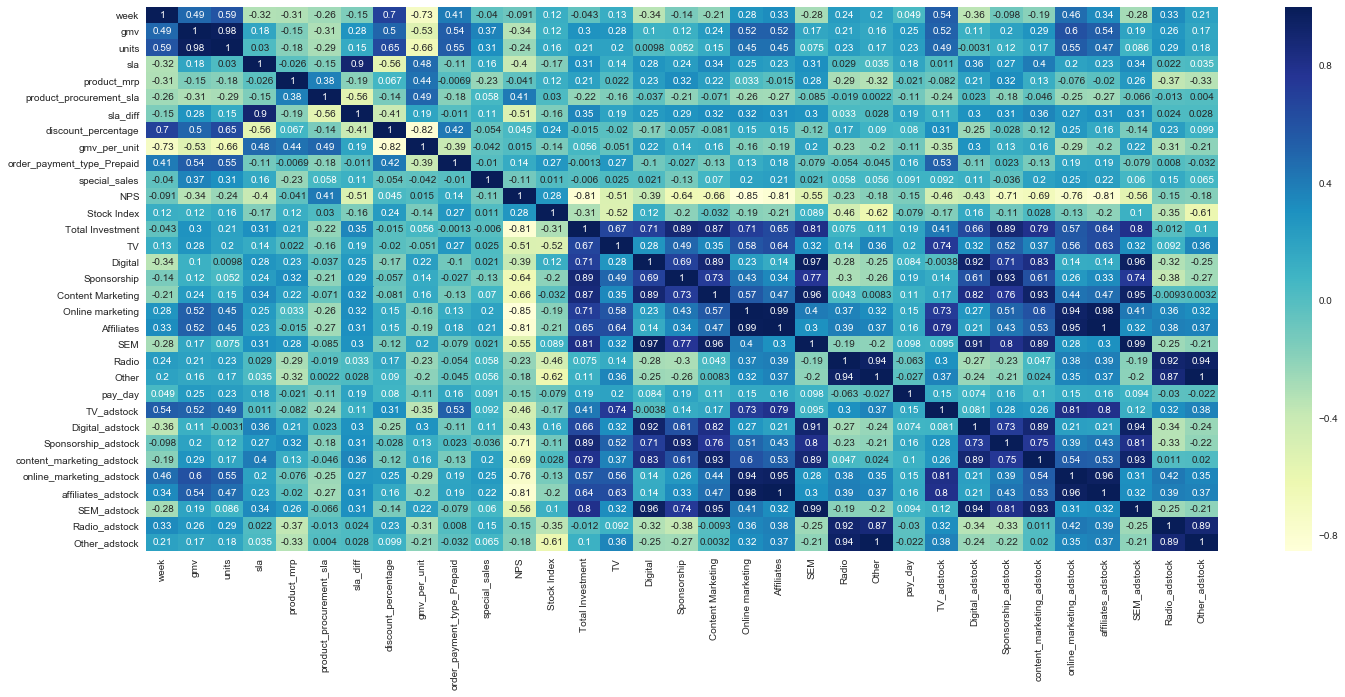

In [396]:
plt.figure(figsize=(24,10))
sns.heatmap(CameraAccessory_weekly.corr(),cmap='YlGnBu',annot=True)
plt.show()

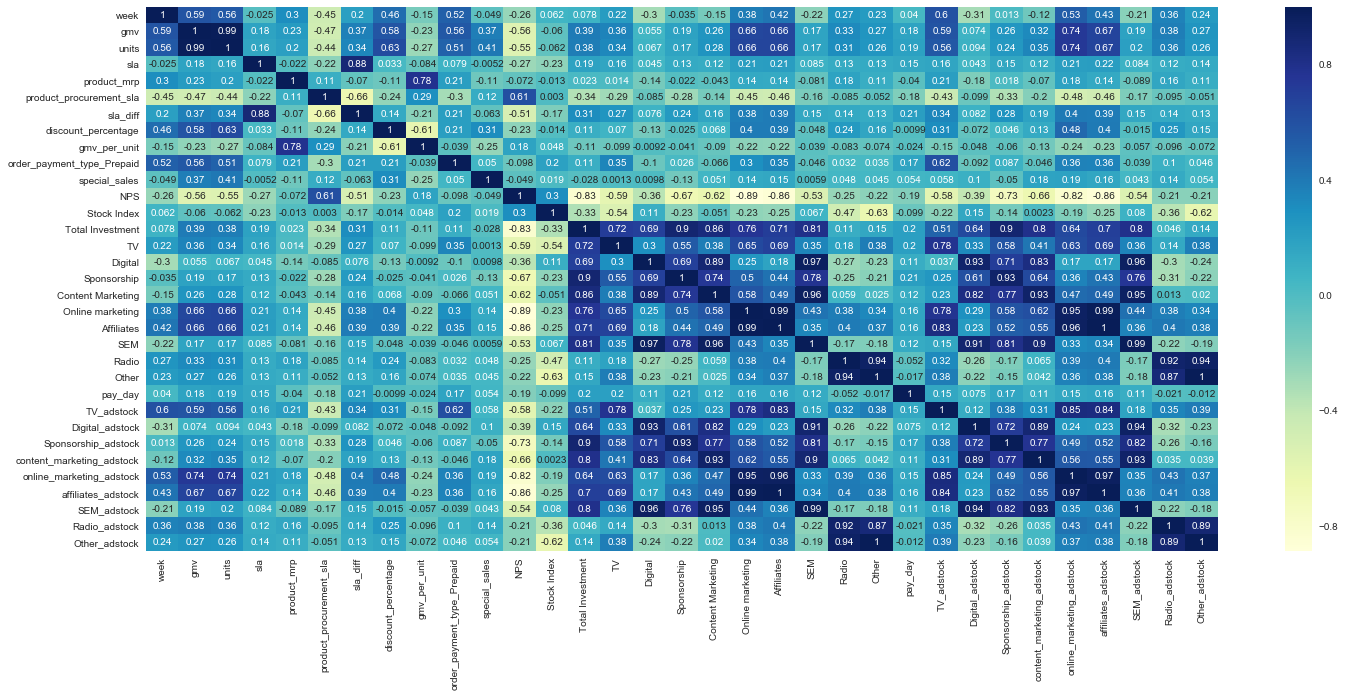

In [397]:
plt.figure(figsize=(24,10))
sns.heatmap(GamingAccessory_weekly.corr(),cmap='YlGnBu',annot=True)
plt.show()

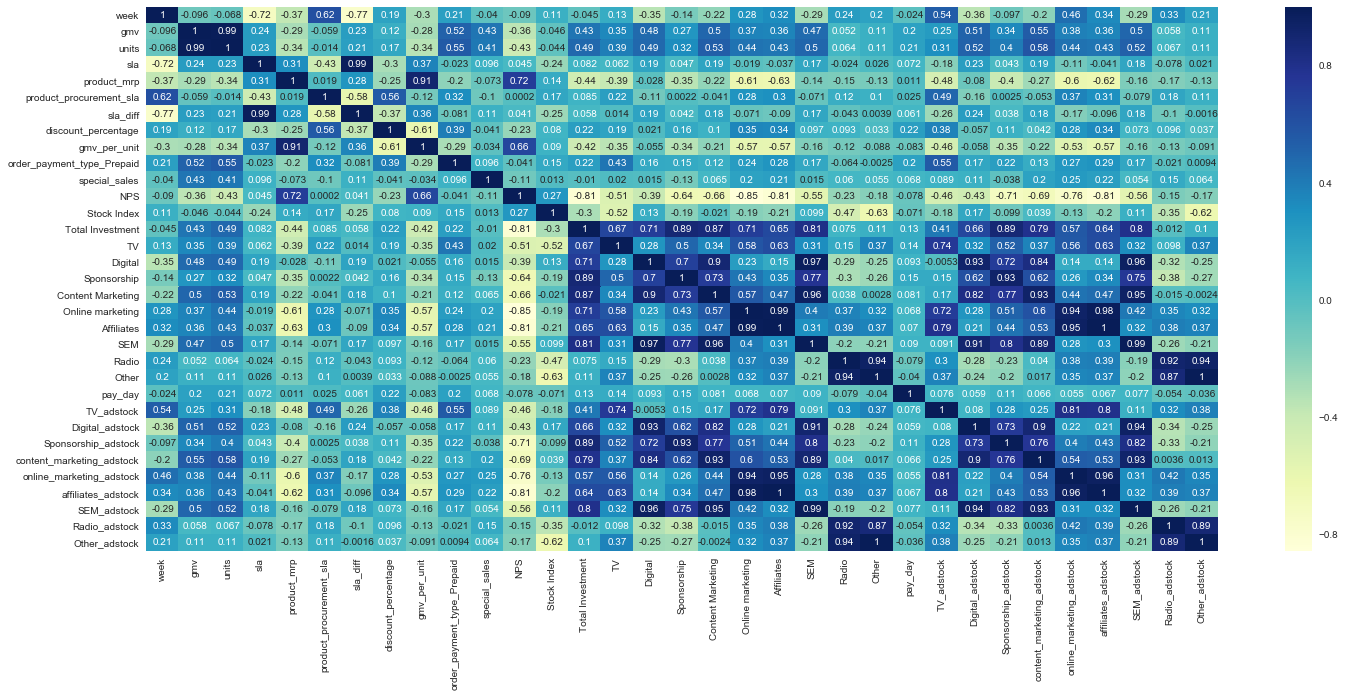

In [398]:
plt.figure(figsize=(24,10))
sns.heatmap(HomeAudio_weekly.corr(),cmap='YlGnBu',annot=True)
plt.show()

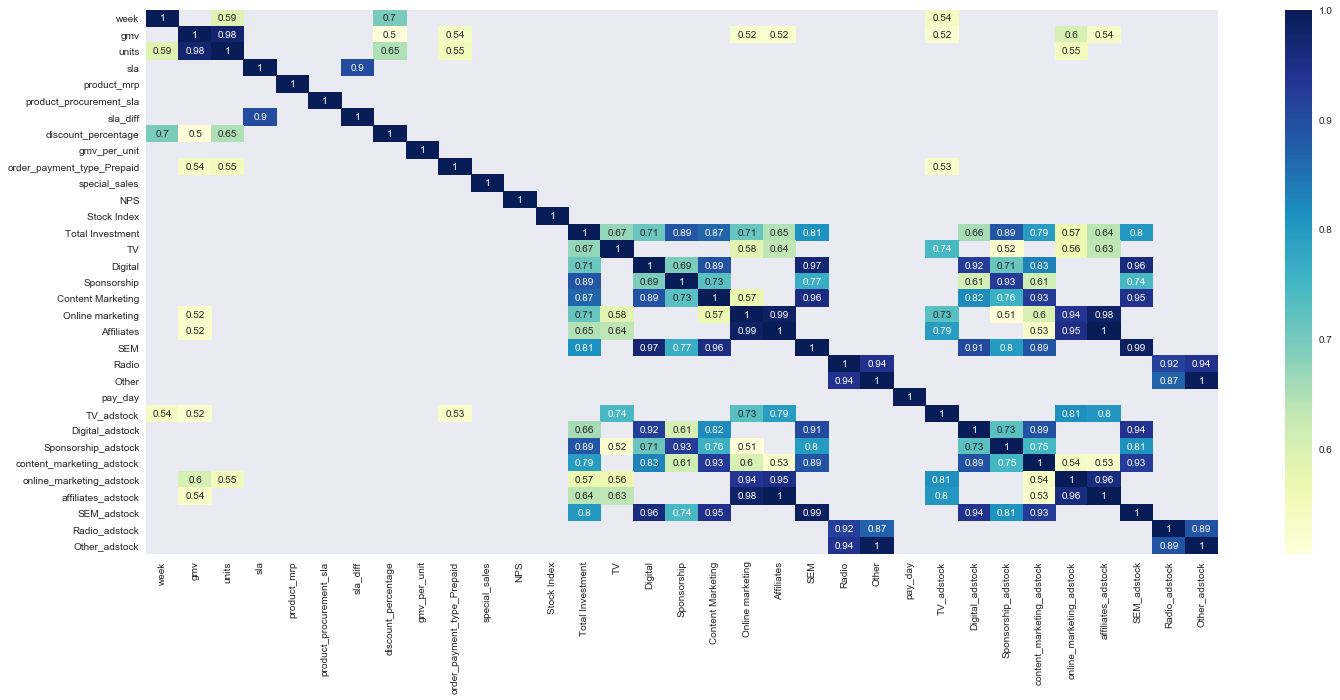

In [399]:
plt.figure(figsize=(24,10))
corr = CameraAccessory_weekly.corr()
sns.heatmap(corr[corr > 0.5] ,cmap='YlGnBu',annot=True)
plt.show()

In [400]:
#dropping units - its very obvious that more the units more is the gmv
#removing few other highly correlated variables
CameraAccessory_weekly.drop(['units'], axis = 1, inplace = True)

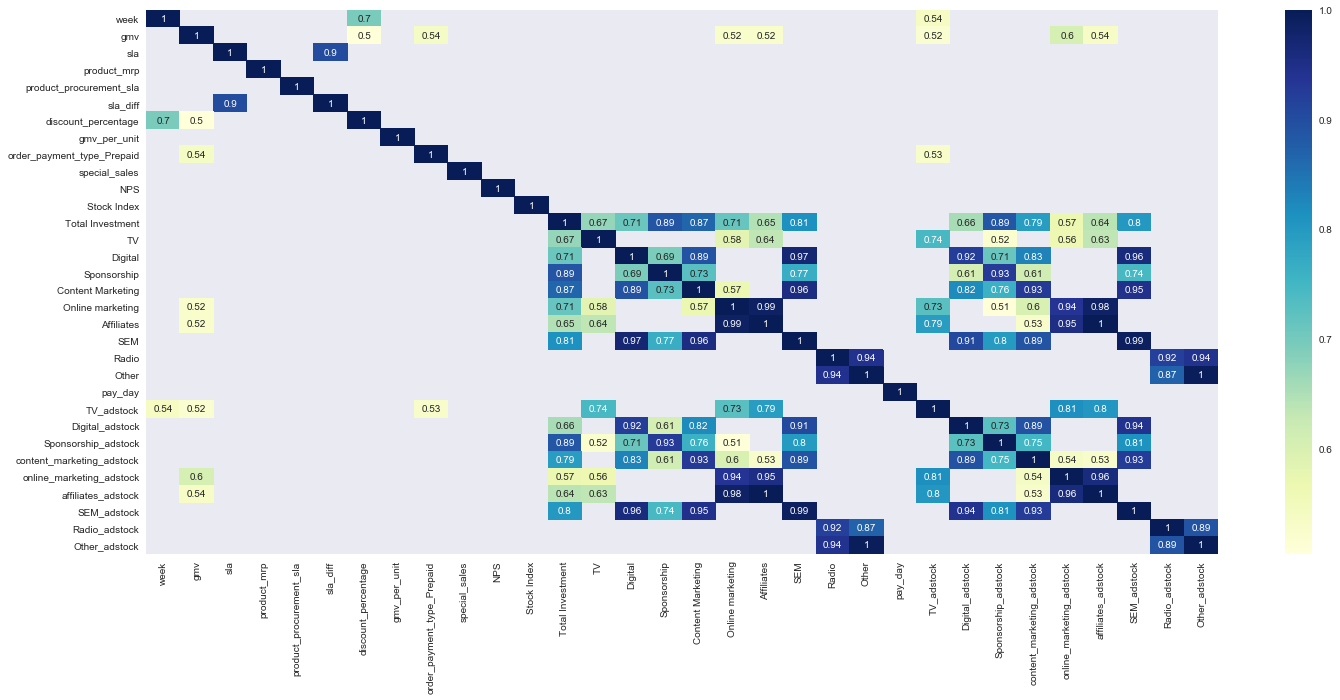

In [401]:
plt.figure(figsize=(24,10))
corr = CameraAccessory_weekly.corr()
sns.heatmap(corr[corr > 0.5] ,cmap='YlGnBu',annot=True)
plt.show()

In [402]:
GamingAccessory_weekly.drop(['units'], axis = 1, inplace = True)
HomeAudio_weekly.drop(['units'], axis = 1, inplace = True)

# Climate Data

## 2015 Climate Data

In [403]:
climate_2015 = pd.read_csv("ONTARIO-2015.csv", header = 22)

In [404]:
climate_2015

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0    2015-01-01  2015      1    1            †           0.00           NaN   
1    2015-01-02  2015      1    2            †           3.00           NaN   
2    2015-01-03  2015      1    3            †           2.50           NaN   
3    2015-01-04  2015      1    4            †           2.50           NaN   
4    2015-01-05  2015      1    5            †         -10.00           NaN   
5    2015-01-06  2015      1    6          NaN            nan           NaN   
6    2015-01-07  2015      1    7          NaN            nan           NaN   
7    2015-01-08  2015      1    8          NaN            nan           NaN   
8    2015-01-09  2015      1    9            †          -7.00           NaN   
9    2015-01-10  2015      1   10            †          -2.50           NaN   
10   2015-01-11  2015      1   11          NaN            nan           NaN   
11   2015-01-12  2015      1   12          NaN            nan           NaN   
12   2015-01-13  2015      1   13            †         -12.00           NaN   
13   2015-01-14  2015      1   14          NaN            nan           NaN   
14   2015-01-15  2015      1   15            †            nan             M   
15   2015-01-16  2015      1   16          NaN            nan           NaN   
16   2015-01-17  2015      1   17          NaN            nan           NaN   
17   2015-01-18  2015      1   18            †           5.00           NaN   
18   2015-01-19  2015      1   19            †           3.00           NaN   
19   2015-01-20  2015      1   20          NaN            nan           NaN   
20   2015-01-21  2015      1   21            †          -4.00           NaN   
21   2015-01-22  2015      1   22          NaN            nan           NaN   
22   2015-01-23  2015      1   23          NaN            nan           NaN   
23   2015-01-24  2015      1   24          NaN            nan           NaN   
24   2015-01-25  2015      1   25            †            nan             M   
25   2015-01-26  2015      1   26            †          -5.00           NaN   
26   2015-01-27  2015      1   27          NaN            nan           NaN   
27   2015-01-28  2015      1   28            †           2.00           NaN   
28   2015-01-29  2015      1   29          NaN            nan           NaN   
29   2015-01-30  2015      1   30          NaN            nan           NaN   
..          ...   ...    ...  ...          ...            ...           ...   
335  2015-12-02  2015     12    2            †           7.50           NaN   
336  2015-12-03  2015     12    3          NaN            nan           NaN   
337  2015-12-04  2015     12    4            †           6.50           NaN   
338  2015-12-05  2015     12    5          NaN            nan           NaN   
339  2015-12-06  2015     12    6          NaN            nan           NaN   
340  2015-12-07  2015     12    7            †           3.00           NaN   
341  2015-12-08  2015     12    8          NaN            nan           NaN   
342  2015-12-09  2015     12    9          NaN            nan           NaN   
343  2015-12-10  2015     12   10          NaN            nan           NaN   
344  2015-12-11  2015     12   11            †          13.00           NaN   
345  2015-12-12  2015     12   12            †          16.00           NaN   
346  2015-12-13  2015     12   13            †          15.00           NaN   
347  2015-12-14  2015     12   14          NaN            nan           NaN   
348  2015-12-15  2015     12   15          NaN            nan           NaN   
349  2015-12-16  2015     12   16          NaN            nan           NaN   
350  2015-12-17  2015     12   17            †          10.50           NaN   
351  2015-12-18  2015     12   18          NaN            nan           NaN   
352  2015-12-19  2015     12   19            †           3.00           NaN   
353  2015-12-20  2015     12   20            †          

In [405]:
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [406]:
climate_2015.shape

(365, 27)

In [407]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null object
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Snow Flag 

In [408]:
climate_2015['Date/Time'] = pd.to_datetime(climate_2015['Date/Time'])

In [409]:
climate_2015['Date/Time'].dtype

dtype('<M8[ns]')

In [410]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null datetime64[ns]
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Sn

In [411]:
c1 = climate_2015

In [412]:
c1.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [413]:
#we only need climate data from July 2015
c1 = c1[c1['Date'] >= pd.to_datetime('2015-07-01')]

In [414]:
c1.shape

(184, 27)

In [415]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 27 columns):
Date                         184 non-null datetime64[ns]
Year                         184 non-null int64
Month                        184 non-null int64
Day                          184 non-null int64
Data Quality                 115 non-null object
Max Temp (°C)                109 non-null float64
Max Temp Flag                6 non-null object
Min Temp (°C)                98 non-null float64
Min Temp Flag                17 non-null object
Mean Temp (°C)               98 non-null float64
Mean Temp Flag               17 non-null object
Heat Deg Days (°C)           98 non-null float64
Heat Deg Days Flag           17 non-null object
Cool Deg Days (°C)           98 non-null float64
Cool Deg Days Flag           17 non-null object
Total Rain (mm)              115 non-null float64
Total Rain Flag              5 non-null object
Total Snow (cm)              115 non-null float64
Total Snow 

In [416]:
round((c1.isnull().sum() / len(c1.index)) *100, 2)
#below is a series

Date                          0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 37.50
Max Temp (°C)                40.76
Max Temp Flag                96.74
Min Temp (°C)                46.74
Min Temp Flag                90.76
Mean Temp (°C)               46.74
Mean Temp Flag               90.76
Heat Deg Days (°C)           46.74
Heat Deg Days Flag           90.76
Cool Deg Days (°C)           46.74
Cool Deg Days Flag           90.76
Total Rain (mm)              37.50
Total Rain Flag              97.28
Total Snow (cm)              37.50
Total Snow Flag              99.46
Total Precip (mm)            37.50
Total Precip Flag            97.28
Snow on Grnd (cm)            37.50
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [417]:
c1['Mean Temp Flag'].value_counts()

M    17
Name: Mean Temp Flag, dtype: int64

In [418]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c1.isnull().sum() / len(c1.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [419]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                96.74
Min Temp Flag                90.76
Mean Temp Flag               90.76
Heat Deg Days Flag           90.76
Cool Deg Days Flag           90.76
Total Rain Flag              97.28
Total Snow Flag              99.46
Total Precip Flag            97.28
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [420]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [421]:
c1.drop(cols, axis=1, inplace=True)
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 14 columns):
Date                  184 non-null datetime64[ns]
Year                  184 non-null int64
Month                 184 non-null int64
Day                   184 non-null int64
Data Quality          115 non-null object
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.6+ KB


In [422]:
c1['Data Quality'].value_counts()

†    115
Name: Data Quality, dtype: int64

In [423]:
#dropping the column Data Quality
c1.drop(['Data Quality'], axis=1, inplace=True)

In [424]:
c1

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
181 2015-07-01  2015      7    1          24.50          17.00   
182 2015-07-02  2015      7    2          24.00          14.00   
183 2015-07-03  2015      7    3          25.00          10.00   
184 2015-07-04  2015      7    4          26.00          11.00   
185 2015-07-05  2015      7    5          28.00          14.00   
186 2015-07-06  2015      7    6            nan            nan   
187 2015-07-07  2015      7    7          26.00          18.00   
188 2015-07-08  2015      7    8          20.00          12.50   
189 2015-07-09  2015      7    9          24.00          17.00   
190 2015-07-10  2015      7   10          26.00          13.00   
191 2015-07-11  2015      7   11          28.00          13.50   
192 2015-07-12  2015      7   12          25.00          18.00   
193 2015-07-13  2015      7   13            nan            nan   
194 2015-07-14  2015      7   14          29.00          19.50   
195 2015-07-15  2015      7   15          23.50          14.50   
196 2015-07-16  2015      7   16          25.00          11.00   
197 2015-07-17  2015      7   17          30.00          18.00   
198 2015-07-18  2015      7   18          32.00          21.00   
199 2015-07-19  2015      7   19          33.00          21.50   
200 2015-07-20  2015      7   20          30.00          15.00   
201 2015-07-21  2015      7   21            nan            nan   
202 2015-07-22  2015      7   22          27.00          14.50   
203 2015-07-23  2015      7   23          29.00          15.00   
204 2015-07-24  2015      7   24          31.00            nan   
205 2015-07-25  2015      7   25          31.50          18.50   
206 2015-07-26  2015      7   26          30.00          20.00   
207 2015-07-27  2015      7   27          32.00          16.00   
208 2015-07-28  2015      7   28          33.50          17.50   
209 2015-07-29  2015      7   29            nan            nan   
210 2015-07-30  2015      7   30          30.50          19.00   
..         ...   ...    ...  ...            ...            ...   
335 2015-12-02  2015     12    2           7.50          -4.00   
336 2015-12-03  2015     12    3            nan            nan   
337 2015-12-04  2015     12    4           6.50            nan   
338 2015-12-05  2015     12    5            nan            nan   
339 2015-12-06  2015     12    6            nan            nan   
340 2015-12-07  2015     12    7           3.00          -2.50   
341 2015-12-08  2015     12    8            nan            nan   
342 2015-12-09  2015     12    9            nan            nan   
343 2015-12-10  2015     12   10            nan            nan   
344 2015-12-11  2015     12   11          13.00           5.50   
345 2015-12-12  2015     12   12          16.00           7.00   
346 2015-12-13  2015     12   13          15.00          11.00   
347 2015-12-14  2015     12   14            nan            nan   
348 2015-12-15  2015     12   15            nan            nan   
349 2015-12-16  2015     12   16            nan            nan   
350 2015-12-17  2015     12   17          10.50            nan   
351 2015-12-18  2015     12   18            nan            nan   
352 2015-12-19  2015     12   19           3.00          -4.00   
353 2015-12-20  2015     12   20           5.50          -5.00   
354 2015-12-21  2015     12   21            nan            nan   
355 2015-12-22  2015     12   22          11.50           4.00   
356 2015-12-23  2015     12   23          15.50           1.00   
357 2015-12-24  2015     12   24            nan            nan   
358 2015-12-25  2015     12   25            nan            nan   
359 2015-12-26  2015     12   26           9.50            nan   
360 2015-12-27  2015     12   27            nan            nan   
361 2015-12-28  2015     12   28            nan            nan   
362 2015-12-29  2015     12   29           6.50          -2.00   
363 2015-12-30  2015     12   30            nan   

Upon visual inspection it is evident that weather data for few rows are completely missing

In [425]:
c1.dropna(thresh = 5, inplace = True)

In [426]:
print(c1.shape, "\n\n")
c1.info()

(115, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


In [427]:
c1['Max Temp (°C)']

181   24.50
182   24.00
183   25.00
184   26.00
185   28.00
187   26.00
188   20.00
189   24.00
190   26.00
191   28.00
192   25.00
194   29.00
195   23.50
196   25.00
197   30.00
198   32.00
199   33.00
200   30.00
202   27.00
203   29.00
204   31.00
205   31.50
206   30.00
207   32.00
208   33.50
210   30.50
211   31.00
212   29.00
213   33.50
215   28.50
       ... 
298   15.50
300   16.00
306   22.00
307   23.00
308   22.00
309   18.00
310   12.50
312   14.50
315   10.50
318   17.00
321   16.00
322   14.50
324    2.00
325    1.50
330   12.00
332    4.50
335    7.50
337    6.50
340    3.00
344   13.00
345   16.00
346   15.00
350   10.50
352    3.00
353    5.50
355   11.50
356   15.50
358     nan
359    9.50
362    6.50
Name: Max Temp (°C), Length: 115, dtype: float64

In [428]:
c1['Max Temp (°C)'].max()

33.5

Text(0,0.5,'Temperature')

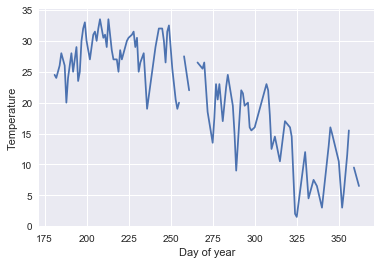

In [429]:
plt.plot(c1['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

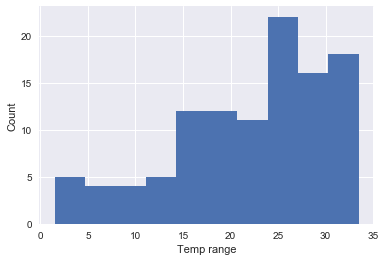

In [430]:
plt.hist(c1['Max Temp (°C)'], range = (c1['Max Temp (°C)'].min(), c1['Max Temp (°C)'].max()))
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

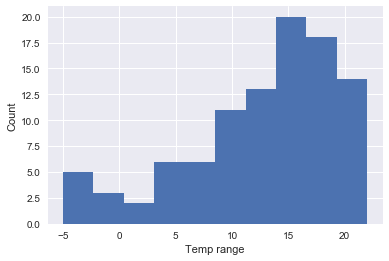

In [431]:
plt.hist(c1['Min Temp (°C)'], range = (c1['Min Temp (°C)'].min(), c1['Min Temp (°C)'].max()), histtype = 'bar')
plt.xlabel('Temp range')
plt.ylabel('Count')

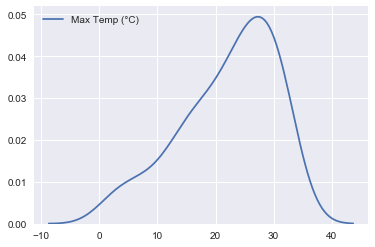

In [432]:
sns.kdeplot(c1['Max Temp (°C)'])

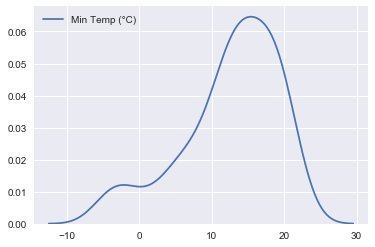

In [433]:
sns.kdeplot(c1['Min Temp (°C)'])

In [434]:
c1['Heat Deg Days (°C)']

181    0.00
182    0.00
183    0.50
184    0.00
185    0.00
187    0.00
188    1.70
189    0.00
190    0.00
191    0.00
192    0.00
194    0.00
195    0.00
196    0.00
197    0.00
198    0.00
199    0.00
200    0.00
202    0.00
203    0.00
204     nan
205    0.00
206    0.00
207    0.00
208    0.00
210    0.00
211    0.00
212    0.00
213    0.00
215    0.00
       ... 
298    9.20
300    5.00
306    3.70
307    4.00
308    1.50
309    3.00
310    8.20
312   11.50
315    9.00
318    7.00
321    4.00
322    7.20
324   17.20
325   19.30
330   10.20
332     nan
335   16.20
337     nan
340   17.70
344    8.70
345    6.50
346    5.00
350     nan
352   18.50
353   17.70
355   10.20
356    9.70
358     nan
359     nan
362   15.70
Name: Heat Deg Days (°C), Length: 115, dtype: float64

(array([66.,  7.,  6.,  3.,  5.,  4.,  0.,  0.,  3.,  4.]),
 array([ 0.  ,  1.93,  3.86,  5.79,  7.72,  9.65, 11.58, 13.51, 15.44,
        17.37, 19.3 ]),
 <a list of 10 Patch objects>)

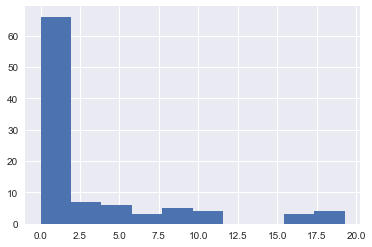

In [435]:
plt.hist(c1['Heat Deg Days (°C)'].dropna())

(array([47.,  4.,  4., 10.,  5.,  6.,  7.,  8.,  5.,  2.]),
 array([0.  , 0.93, 1.86, 2.79, 3.72, 4.65, 5.58, 6.51, 7.44, 8.37, 9.3 ]),
 <a list of 10 Patch objects>)

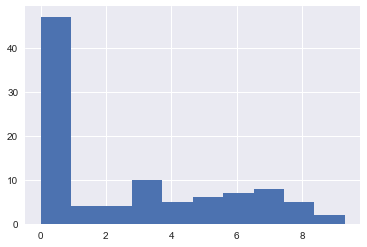

In [436]:
plt.hist(c1['Cool Deg Days (°C)'].dropna())

In [437]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


(array([ 5.,  2.,  1.,  8.,  5., 11., 14., 19., 17., 16.]),
 array([-1.3 ,  1.56,  4.42,  7.28, 10.14, 13.  , 15.86, 18.72, 21.58,
        24.44, 27.3 ]),
 <a list of 10 Patch objects>)

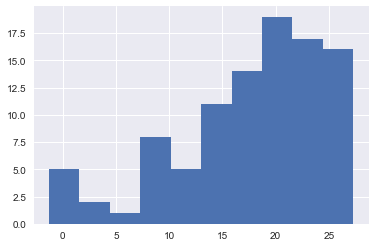

In [438]:
plt.hist(c1['Mean Temp (°C)'].dropna())

In [439]:
#creating week column
c1['week'] = c1['Date'].dt.week

In [440]:
#group by week
c1_grp = c1.groupby('week')

In [441]:
c1.aggregate(['mean', 'min', 'max'])

Date    Year  Month   Day  Max Temp (°C)  Min Temp (°C)  \
min  2015-07-01 2015.00   7.00  1.00           1.50          -5.00   
max  2015-12-29 2015.00  12.00 31.00          33.50          22.00   
mean        NaT 2015.00   9.12 15.32          22.09          12.57   

      Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
min            -1.30                0.00                0.00             0.00   
max            27.30               19.30                9.30            57.20   
mean           17.63                2.96                2.59             2.56   

      Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  week  
min              0.00               0.00               0.00 27.00  
max             10.00              57.20               7.00 53.00  
mean             0.09               2.65               0.06 38.19

In [442]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c1.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2015 = c1_grp[cols].mean()

In [443]:
climate_2015

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week                                                                     
27            25.50          13.20           19.36                0.10   
28            24.83          15.33           20.10                0.28   
29            28.75          17.58           23.18                0.00   
30            29.75          16.60           23.06                0.00   
31            31.58          17.50           24.57                0.00   
32            27.20          16.00           21.65                0.00   
33            29.62          18.25           23.95                0.00   
34            28.42          18.42           23.45                0.00   
35            24.00          16.50           20.25                0.75   
36            30.42          18.70           24.46                0.00   
37            23.50          14.90           19.24                1.28   
38            24.75          16.25           20.55                0.00   
39            26.00          14.50           20.00                0.00   
40            19.70          14.12           17.73                1.93   
41            21.20          12.00           16.62                1.38   
42            17.00           8.75           14.30                4.10   
43            19.80          11.50           15.68                2.32   
44            15.75           6.00           10.90                7.10   
45            19.50           8.30           13.92                4.08   
46            14.00           3.67            8.83                9.17   
47             8.50           3.62            6.08               11.93   
48             8.25           3.50            7.80               10.20   
49             7.00          -4.00            1.80               16.20   
50            11.75           5.25            8.53                9.47   
51             6.33          -4.50           -0.10               18.10   
52            12.17           2.50            8.05                9.95   
53             6.50          -2.00            2.30               15.70   

      Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
week                                                                            
27                  1.46             0.00             0.00               0.00   
28                  2.38             4.42             0.00               4.42   
29                  5.18             1.40             0.00               1.40   
30                  5.06             0.90             0.00               0.90   
31                  6.57             4.63             0.00               4.63   
32                  3.65             0.28             0.00               0.28   
33                  5.95             2.90             0.00               2.90   
34                  5.45             5.13             0.00               5.13   
35                  3.00             0.00             0.00               0.00   
36                  6.46            10.10             0.00              10.10   
37                  2.52             0.96             0.00               0.96   
38                  2.55             0.55             0.00               0.55   
39                  2.00             0.00             0.00               0.00   
40                  1.65             3.72             0.00               3.72   
41                  0.00             0.00             0.00               0.00   
42                  0.40             0.30             0.00               0.30   
43                  0.00             0.84             0.00               0.84   
44                  0.00             0.90             0.00               0.90   
45                  0.00             1.72             0.00               1.72   
46                  0.00             5.13             0.00               5.13   
47                  0.00             3.30             2.50               5.80

In [444]:
climate_2015.shape

(27, 10)

## 2016 Climate Data

In [445]:
climate_2016 = pd.read_csv("ONTARIO-2016.csv", header = 22)

In [446]:
climate_2016

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0    2016-01-01  2016      1    1          NaN            nan           NaN   
1    2016-01-02  2016      1    2          NaN            nan           NaN   
2    2016-01-03  2016      1    3          NaN            nan           NaN   
3    2016-01-04  2016      1    4          NaN            nan           NaN   
4    2016-01-05  2016      1    5          NaN            nan           NaN   
5    2016-01-06  2016      1    6          NaN            nan           NaN   
6    2016-01-07  2016      1    7          NaN            nan           NaN   
7    2016-01-08  2016      1    8            †           7.00           NaN   
8    2016-01-09  2016      1    9            †          11.00           NaN   
9    2016-01-10  2016      1   10            †          -1.50           NaN   
10   2016-01-11  2016      1   11          NaN            nan           NaN   
11   2016-01-12  2016      1   12            †          -5.00           NaN   
12   2016-01-13  2016      1   13          NaN            nan           NaN   
13   2016-01-14  2016      1   14            †           2.50           NaN   
14   2016-01-15  2016      1   15            †           4.50           NaN   
15   2016-01-16  2016      1   16          NaN            nan           NaN   
16   2016-01-17  2016      1   17          NaN            nan           NaN   
17   2016-01-18  2016      1   18          NaN            nan           NaN   
18   2016-01-19  2016      1   19          NaN            nan           NaN   
19   2016-01-20  2016      1   20          NaN            nan           NaN   
20   2016-01-21  2016      1   21            †          -3.00           NaN   
21   2016-01-22  2016      1   22          NaN            nan           NaN   
22   2016-01-23  2016      1   23          NaN            nan           NaN   
23   2016-01-24  2016      1   24            †           3.00           NaN   
24   2016-01-25  2016      1   25            †           5.50           NaN   
25   2016-01-26  2016      1   26            †           6.00           NaN   
26   2016-01-27  2016      1   27          NaN            nan           NaN   
27   2016-01-28  2016      1   28          NaN            nan           NaN   
28   2016-01-29  2016      1   29          NaN            nan           NaN   
29   2016-01-30  2016      1   30          NaN            nan           NaN   
..          ...   ...    ...  ...          ...            ...           ...   
336  2016-12-02  2016     12    2          NaN            nan           NaN   
337  2016-12-03  2016     12    3            †           4.00           NaN   
338  2016-12-04  2016     12    4          NaN            nan           NaN   
339  2016-12-05  2016     12    5          NaN            nan           NaN   
340  2016-12-06  2016     12    6            †           5.00           NaN   
341  2016-12-07  2016     12    7          NaN            nan           NaN   
342  2016-12-08  2016     12    8            †          -2.00           NaN   
343  2016-12-09  2016     12    9          NaN            nan           NaN   
344  2016-12-10  2016     12   10            †           0.00           NaN   
345  2016-12-11  2016     12   11            †           1.00           NaN   
346  2016-12-12  2016     12   12            †           2.00           NaN   
347  2016-12-13  2016     12   13            †          -2.00           NaN   
348  2016-12-14  2016     12   14          NaN            nan           NaN   
349  2016-12-15  2016     12   15          NaN            nan           NaN   
350  2016-12-16  2016     12   16            †          -3.50           NaN   
351  2016-12-17  2016     12   17            †          -1.00           NaN   
352  2016-12-18  2016     12   18          NaN            nan           NaN   
353  2016-12-19  2016     12   19          NaN            nan           NaN   
354  2016-12-20  2016     12   20            †          

In [447]:
climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [448]:
climate_2016.shape

(366, 27)

In [449]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null object
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Flag      

In [450]:
climate_2016['Date/Time'] = pd.to_datetime(climate_2016['Date/Time'], errors = 'coerce')

In [451]:
climate_2016['Date/Time'].dtype

dtype('<M8[ns]')

In [452]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Fl

In [453]:
c2 = climate_2016

In [454]:
c2.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [455]:
#we only need climate data from July 2015
c2 = c2[c2['Date'] <= pd.to_datetime('2016-06-30')]

In [456]:
c2.shape

(182, 27)

In [457]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 27 columns):
Date                         182 non-null datetime64[ns]
Year                         182 non-null int64
Month                        182 non-null int64
Day                          182 non-null int64
Data Quality                 100 non-null object
Max Temp (°C)                99 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                93 non-null float64
Min Temp Flag                7 non-null object
Mean Temp (°C)               93 non-null float64
Mean Temp Flag               7 non-null object
Heat Deg Days (°C)           93 non-null float64
Heat Deg Days Flag           7 non-null object
Cool Deg Days (°C)           93 non-null float64
Cool Deg Days Flag           7 non-null object
Total Rain (mm)              100 non-null float64
Total Rain Flag              2 non-null object
Total Snow (cm)              100 non-null float64
Total Snow Flag   

In [458]:
round((c2.isnull().sum() / len(c2.index)) *100, 2)
#below is a series

Date                          0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 45.05
Max Temp (°C)                45.60
Max Temp Flag                99.45
Min Temp (°C)                48.90
Min Temp Flag                96.15
Mean Temp (°C)               48.90
Mean Temp Flag               96.15
Heat Deg Days (°C)           48.90
Heat Deg Days Flag           96.15
Cool Deg Days (°C)           48.90
Cool Deg Days Flag           96.15
Total Rain (mm)              45.05
Total Rain Flag              98.90
Total Snow (cm)              45.05
Total Snow Flag              97.25
Total Precip (mm)            45.05
Total Precip Flag            96.70
Snow on Grnd (cm)            45.05
Snow on Grnd Flag            97.80
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [459]:
c2['Mean Temp Flag'].value_counts()

M    7
Name: Mean Temp Flag, dtype: int64

In [460]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c2.isnull().sum() / len(c2.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [461]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                99.45
Min Temp Flag                96.15
Mean Temp Flag               96.15
Heat Deg Days Flag           96.15
Cool Deg Days Flag           96.15
Total Rain Flag              98.90
Total Snow Flag              97.25
Total Precip Flag            96.70
Snow on Grnd Flag            97.80
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [462]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [463]:
c2.drop(cols, axis=1, inplace=True)
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 14 columns):
Date                  182 non-null datetime64[ns]
Year                  182 non-null int64
Month                 182 non-null int64
Day                   182 non-null int64
Data Quality          100 non-null object
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.3+ KB


In [464]:
c2['Data Quality'].value_counts()

†    100
Name: Data Quality, dtype: int64

In [465]:
#dropping the column Data Quality
c2.drop(['Data Quality'], axis=1, inplace=True)

In [466]:
c2

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
0   2016-01-01  2016      1    1            nan            nan   
1   2016-01-02  2016      1    2            nan            nan   
2   2016-01-03  2016      1    3            nan            nan   
3   2016-01-04  2016      1    4            nan            nan   
4   2016-01-05  2016      1    5            nan            nan   
5   2016-01-06  2016      1    6            nan            nan   
6   2016-01-07  2016      1    7            nan            nan   
7   2016-01-08  2016      1    8           7.00         -14.00   
8   2016-01-09  2016      1    9          11.00           3.00   
9   2016-01-10  2016      1   10          -1.50          -5.00   
10  2016-01-11  2016      1   11            nan            nan   
11  2016-01-12  2016      1   12          -5.00         -12.00   
12  2016-01-13  2016      1   13            nan            nan   
13  2016-01-14  2016      1   14           2.50         -10.50   
14  2016-01-15  2016      1   15           4.50          -2.00   
15  2016-01-16  2016      1   16            nan            nan   
16  2016-01-17  2016      1   17            nan            nan   
17  2016-01-18  2016      1   18            nan            nan   
18  2016-01-19  2016      1   19            nan            nan   
19  2016-01-20  2016      1   20            nan            nan   
20  2016-01-21  2016      1   21          -3.00            nan   
21  2016-01-22  2016      1   22            nan            nan   
22  2016-01-23  2016      1   23            nan            nan   
23  2016-01-24  2016      1   24           3.00            nan   
24  2016-01-25  2016      1   25           5.50          -9.00   
25  2016-01-26  2016      1   26           6.00            nan   
26  2016-01-27  2016      1   27            nan            nan   
27  2016-01-28  2016      1   28            nan            nan   
28  2016-01-29  2016      1   29            nan            nan   
29  2016-01-30  2016      1   30            nan            nan   
..         ...   ...    ...  ...            ...            ...   
152 2016-06-01  2016      6    1            nan            nan   
153 2016-06-02  2016      6    2          30.00          16.00   
154 2016-06-03  2016      6    3            nan            nan   
155 2016-06-04  2016      6    4          26.50          14.00   
156 2016-06-05  2016      6    5          25.00          17.00   
157 2016-06-06  2016      6    6          29.00          15.00   
158 2016-06-07  2016      6    7            nan            nan   
159 2016-06-08  2016      6    8          21.50           9.00   
160 2016-06-09  2016      6    9          25.00           9.50   
161 2016-06-10  2016      6   10          29.00          13.50   
162 2016-06-11  2016      6   11          35.00          19.00   
163 2016-06-12  2016      6   12          26.50          16.00   
164 2016-06-13  2016      6   13          24.00           8.50   
165 2016-06-14  2016      6   14            nan            nan   
166 2016-06-15  2016      6   15            nan            nan   
167 2016-06-16  2016      6   16          27.50          17.00   
168 2016-06-17  2016      6   17            nan            nan   
169 2016-06-18  2016      6   18          30.50          13.00   
170 2016-06-19  2016      6   19          33.00          16.50   
171 2016-06-20  2016      6   20          34.50          20.50   
172 2016-06-21  2016      6   21            nan            nan   
173 2016-06-22  2016      6   22          30.50          17.00   
174 2016-06-23  2016      6   23            nan            nan   
175 2016-06-24  2016      6   24          29.00          13.00   
176 2016-06-25  2016      6   25          30.50          13.00   
177 2016-06-26  2016      6   26          34.00          18.50   
178 2016-06-27  2016      6   27          34.50          20.00   
179 2016-06-28  2016      6   28            nan            nan   
180 2016-06-29  2016      6   29            nan   

Upon visual inspection it is evident that weather data for few rows are completely missing

In [467]:
c2.dropna(thresh = 5, inplace = True)

In [468]:
print(c2.shape, "\n\n")
c2.info()

(100, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


In [469]:
c2['Max Temp (°C)']

7      7.00
8     11.00
9     -1.50
11    -5.00
13     2.50
14     4.50
20    -3.00
23     3.00
24     5.50
25     6.00
32     9.50
33    13.00
34     1.50
37     8.50
38     5.00
43    -8.50
44    -5.00
48     6.50
49    17.50
50    17.50
54     1.00
55     1.00
59    10.50
60    10.50
63     2.00
65     7.50
66    18.00
68    20.00
72    11.00
74    15.00
       ... 
134   11.50
135   11.00
136   21.00
138   18.50
144   29.00
145   30.00
146   30.00
147   30.00
148   31.00
149   31.00
153   30.00
155   26.50
156   25.00
157   29.00
159   21.50
160   25.00
161   29.00
162   35.00
163   26.50
164   24.00
167   27.50
169   30.50
170   33.00
171   34.50
173   30.50
175   29.00
176   30.50
177   34.00
178   34.50
181   30.00
Name: Max Temp (°C), Length: 100, dtype: float64

In [470]:
c2['Max Temp (°C)'].max()

35.0

Text(0,0.5,'Temperature')

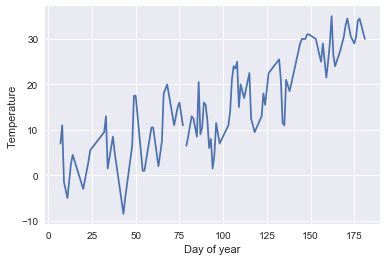

In [471]:
plt.plot(c2['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

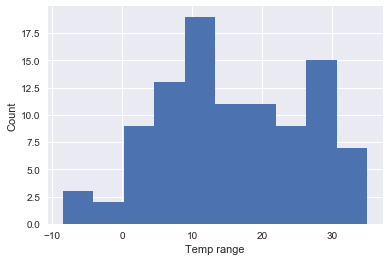

In [472]:
plt.hist(c2['Max Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

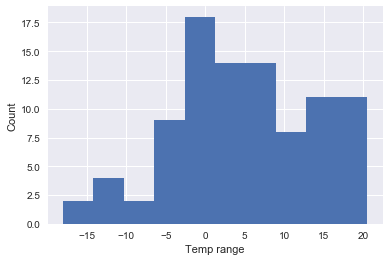

In [473]:
plt.hist(c2['Min Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

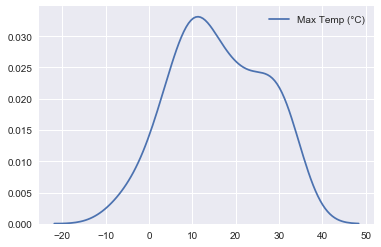

In [474]:
sns.kdeplot(c2['Max Temp (°C)'])

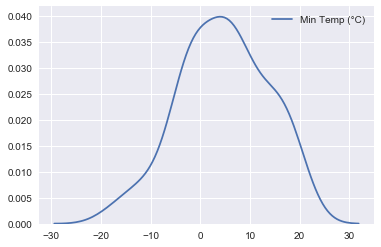

In [475]:
sns.kdeplot(c2['Min Temp (°C)'])

In [476]:
c2['Heat Deg Days (°C)']

7     21.50
8     11.00
9     21.30
11    26.50
13    22.00
14    16.70
20      nan
23      nan
24    19.80
25      nan
32    16.00
33    10.70
34    17.70
37      nan
38    16.00
43    30.30
44    29.50
48    20.80
49    11.00
50     6.70
54    18.00
55    19.30
59    13.20
60    15.20
63    19.00
65      nan
66    10.00
68     3.50
72    10.00
74     7.00
       ... 
134    8.20
135   11.20
136    5.50
138    5.70
144    0.00
145    0.00
146    0.00
147    0.00
148    0.00
149    0.00
153    0.00
155    0.00
156    0.00
157    0.00
159    2.70
160    0.70
161    0.00
162    0.00
163    0.00
164    1.70
167    0.00
169    0.00
170    0.00
171    0.00
173    0.00
175    0.00
176    0.00
177    0.00
178    0.00
181    0.00
Name: Heat Deg Days (°C), Length: 100, dtype: float64

(array([29., 12., 12., 12.,  6., 10.,  6.,  3.,  1.,  2.]),
 array([ 0.  ,  3.03,  6.06,  9.09, 12.12, 15.15, 18.18, 21.21, 24.24,
        27.27, 30.3 ]),
 <a list of 10 Patch objects>)

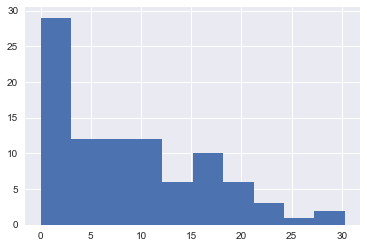

In [477]:
plt.hist(c2['Heat Deg Days (°C)'].dropna())

(array([70.,  1.,  1.,  5.,  5.,  1.,  4.,  2.,  1.,  3.]),
 array([0.  , 0.95, 1.9 , 2.85, 3.8 , 4.75, 5.7 , 6.65, 7.6 , 8.55, 9.5 ]),
 <a list of 10 Patch objects>)

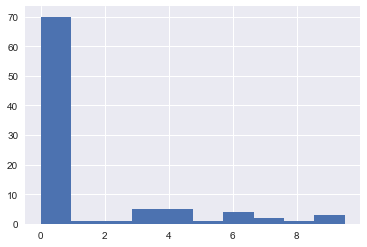

In [478]:
plt.hist(c2['Cool Deg Days (°C)'].dropna())

In [479]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


(array([ 3.,  0.,  8., 12., 14., 15., 14.,  5., 12., 10.]),
 array([-12.3 ,  -8.32,  -4.34,  -0.36,   3.62,   7.6 ,  11.58,  15.56,
         19.54,  23.52,  27.5 ]),
 <a list of 10 Patch objects>)

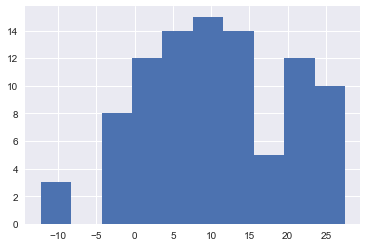

In [480]:
plt.hist(c2['Mean Temp (°C)'].dropna())

In [481]:
#creating week column
c2['week'] = c2['Date'].dt.week

In [482]:
c2.describe()

Year  Month    Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
count  100.00 100.00 100.00          99.00          93.00           93.00   
mean  2016.00   3.80  15.70          15.97           4.61           10.67   
std      0.00   1.61   8.66          10.55           8.86            9.37   
min   2016.00   1.00   1.00          -8.50         -18.00          -12.30   
25%   2016.00   3.00   8.00           8.50          -2.00            4.30   
50%   2016.00   4.00  16.00          15.00           5.00           10.80   
75%   2016.00   5.00  24.00          25.00          11.00           18.30   
max   2016.00   6.00  31.00          35.00          20.50           27.50   

       Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
count               93.00               93.00           100.00   
mean                 8.61                1.28             2.61   
std                  7.69                2.51             6.08   
min                  0.00                0.00             0.00   
25%                  0.00                0.00             0.00   
50%                  7.20                0.00             0.00   
75%                 13.70                0.30             1.55   
max                 30.30                9.50            32.60   

       Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)   week  
count           100.00             100.00             100.00 100.00  
mean              0.34               2.95               0.55  14.36  
std               1.32               6.34               2.06   7.03  
min               0.00               0.00               0.00   1.00  
25%               0.00               0.00               0.00   9.00  
50%               0.00               0.00               0.00  14.00  
75%               0.00               3.20               0.00  21.00  
max               7.00              32.60              12.00  26.00

In [483]:
#group by week
c2_grp = c2.groupby('week')

In [484]:
c2.aggregate(['mean', 'min', 'max'])

Date    Year  Month   Day  Max Temp (°C)  Min Temp (°C)  \
min  2016-01-08 2016.00   1.00  1.00          -8.50         -18.00   
max  2016-06-30 2016.00   6.00 31.00          35.00          20.50   
mean        NaT 2016.00   3.80 15.70          15.97           4.61   

      Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
min           -12.30                0.00                0.00             0.00   
max            27.50               30.30                9.50            32.60   
mean           10.67                8.61                1.28             2.61   

      Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  week  
min              0.00               0.00               0.00  1.00  
max              7.00              32.60              12.00 26.00  
mean             0.34               2.95               0.55 14.36

In [485]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c2.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2016 = c2_grp[cols].mean()

In [486]:
climate_2016

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week                                                                     
1              5.50          -5.33            0.07               17.93   
2              0.67          -8.17           -3.73               21.73   
3              0.00            nan             nan                 nan   
4              5.75          -9.00           -1.80               19.80   
5              8.12          -1.67            3.20               14.80   
6             -2.83         -11.67           -7.27               25.27   
7             13.83          -3.50            5.17               12.83   
8              1.00          -2.25           -0.65               18.65   
9              7.62          -3.33            2.20               15.80   
10            16.33           4.00           10.17                7.83   
11            12.40           3.88            8.90                9.10   
12            12.60          -1.20            5.72               12.28   
13            11.00           2.71            6.87               11.13   
14             6.12          -3.62            1.25               16.75   
15            18.70           1.10            9.92                8.08   
16            19.25           6.00           12.62                5.38   
17            14.83           6.00           10.43                7.57   
18            17.60           6.20           11.92                6.08   
19            17.25           8.38           12.85                5.22   
20            19.75           5.00           12.40                5.60   
21            30.17          16.08           23.15                0.00   
22            27.17          15.67           21.43                0.00   
23            27.67          13.67           20.70                0.57   
24            28.75          13.75           21.30                0.42   
25            31.70          16.40           24.08                0.00   
26            32.25          16.50           24.40                0.00   

      Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
week                                                                            
1                   0.00             7.87             2.33              10.20   
2                   0.00             2.53             0.00               2.53   
3                    nan             0.00             0.00               0.00   
4                   0.00             0.00             0.00               0.00   
5                   0.00             2.65             0.00               2.65   
6                   0.00             0.00             2.67               2.67   
7                   0.00             0.00             0.00               0.00   
8                   0.00            12.70             3.00              15.70   
9                   0.00             0.75             1.75               2.50   
10                  0.00             9.00             0.00               9.00   
11                  0.00             0.33             0.00               0.33   
12                  0.00            12.80             0.00              12.80   
13                  0.00             2.83             0.54               3.37   
14                  0.00             2.35             0.55               2.90   
15                  0.00             0.00             0.00               0.00   
16                  0.00             0.00             0.00               0.00   
17                  0.00             5.27             0.00               5.27   
18                  0.00             2.16             0.00               2.16   
19                  0.07             4.25             0.00               4.25   
20                  0.00             0.30             0.00               0.30   
21                  5.15             0.37             0.00               0.37   
22                  3.43             4.20             0.00            

Week 3 has nan values. Replacing the nan values for week 55 with mean of values from week 2 and week 4

In [487]:
climate_2016.loc[3]

Max Temp (°C)        0.00
Min Temp (°C)         nan
Mean Temp (°C)        nan
Heat Deg Days (°C)    nan
Cool Deg Days (°C)    nan
Total Rain (mm)      0.00
Total Snow (cm)      0.00
Total Precip (mm)    0.00
Snow on Grnd (cm)    0.00
week                 3.00
Name: 3, dtype: float64

In [488]:
climate_2016.loc[3, 'Min Temp (°C)'] = climate_2016.loc[2, 'Min Temp (°C)'] + climate_2016.loc[4, 'Min Temp (°C)']
climate_2016.loc[3, 'Min Temp (°C)']

-17.166666666666664

In [489]:
climate_2016.loc[3, 'Mean Temp (°C)'] = climate_2016.loc[2, 'Mean Temp (°C)'] + climate_2016.loc[4, 'Mean Temp (°C)']
climate_2016.loc[3, 'Heat Deg Days (°C)'] = climate_2016.loc[2, 'Heat Deg Days (°C)'] + climate_2016.loc[4, 'Heat Deg Days (°C)']
climate_2016.loc[3, 'Cool Deg Days (°C)'] = climate_2016.loc[2, 'Cool Deg Days (°C)'] + climate_2016.loc[4, 'Cool Deg Days (°C)']

## Merging 2015 and 2016 data

In [490]:
climate_merge = pd.concat([climate_2015, climate_2016])

In [491]:
climate_merge

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week                                                                     
27            25.50          13.20           19.36                0.10   
28            24.83          15.33           20.10                0.28   
29            28.75          17.58           23.18                0.00   
30            29.75          16.60           23.06                0.00   
31            31.58          17.50           24.57                0.00   
32            27.20          16.00           21.65                0.00   
33            29.62          18.25           23.95                0.00   
34            28.42          18.42           23.45                0.00   
35            24.00          16.50           20.25                0.75   
36            30.42          18.70           24.46                0.00   
37            23.50          14.90           19.24                1.28   
38            24.75          16.25           20.55                0.00   
39            26.00          14.50           20.00                0.00   
40            19.70          14.12           17.73                1.93   
41            21.20          12.00           16.62                1.38   
42            17.00           8.75           14.30                4.10   
43            19.80          11.50           15.68                2.32   
44            15.75           6.00           10.90                7.10   
45            19.50           8.30           13.92                4.08   
46            14.00           3.67            8.83                9.17   
47             8.50           3.62            6.08               11.93   
48             8.25           3.50            7.80               10.20   
49             7.00          -4.00            1.80               16.20   
50            11.75           5.25            8.53                9.47   
51             6.33          -4.50           -0.10               18.10   
52            12.17           2.50            8.05                9.95   
53             6.50          -2.00            2.30               15.70   
1              5.50          -5.33            0.07               17.93   
2              0.67          -8.17           -3.73               21.73   
3              0.00         -17.17           -5.53               41.53   
4              5.75          -9.00           -1.80               19.80   
5              8.12          -1.67            3.20               14.80   
6             -2.83         -11.67           -7.27               25.27   
7             13.83          -3.50            5.17               12.83   
8              1.00          -2.25           -0.65               18.65   
9              7.62          -3.33            2.20               15.80   
10            16.33           4.00           10.17                7.83   
11            12.40           3.88            8.90                9.10   
12            12.60          -1.20            5.72               12.28   
13            11.00           2.71            6.87               11.13   
14             6.12          -3.62            1.25               16.75   
15            18.70           1.10            9.92                8.08   
16            19.25           6.00           12.62                5.38   
17            14.83           6.00           10.43                7.57   
18            17.60           6.20           11.92                6.08   
19            17.25           8.38           12.85                5.22   
20            19.75           5.00           12.40                5.60   
21            30.17          16.08           23.15                0.00   
22            27.17          15.67           21.43                0.00   
23            27.67          13.67           20.70                0.57   
24            28.75          13.75           21.30                0.42   
25            31.70          16.40           24.08                0.00   
26        

In [492]:
# July 2015 should have week 1 and June 2016 should have last week i.e. 53rd week for continuation in analysis
climate_merge['week'] = np.where((climate_merge['week'] >= 27) & (climate_merge['week'] <= 53), 
                                 climate_merge['week'] - 26, climate_merge['week'] + 27)

In [493]:
climate_merge.reset_index(drop = True, inplace = True)

In [494]:
climate_merge

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
0           25.50          13.20           19.36                0.10   
1           24.83          15.33           20.10                0.28   
2           28.75          17.58           23.18                0.00   
3           29.75          16.60           23.06                0.00   
4           31.58          17.50           24.57                0.00   
5           27.20          16.00           21.65                0.00   
6           29.62          18.25           23.95                0.00   
7           28.42          18.42           23.45                0.00   
8           24.00          16.50           20.25                0.75   
9           30.42          18.70           24.46                0.00   
10          23.50          14.90           19.24                1.28   
11          24.75          16.25           20.55                0.00   
12          26.00          14.50           20.00                0.00   
13          19.70          14.12           17.73                1.93   
14          21.20          12.00           16.62                1.38   
15          17.00           8.75           14.30                4.10   
16          19.80          11.50           15.68                2.32   
17          15.75           6.00           10.90                7.10   
18          19.50           8.30           13.92                4.08   
19          14.00           3.67            8.83                9.17   
20           8.50           3.62            6.08               11.93   
21           8.25           3.50            7.80               10.20   
22           7.00          -4.00            1.80               16.20   
23          11.75           5.25            8.53                9.47   
24           6.33          -4.50           -0.10               18.10   
25          12.17           2.50            8.05                9.95   
26           6.50          -2.00            2.30               15.70   
27           5.50          -5.33            0.07               17.93   
28           0.67          -8.17           -3.73               21.73   
29           0.00         -17.17           -5.53               41.53   
30           5.75          -9.00           -1.80               19.80   
31           8.12          -1.67            3.20               14.80   
32          -2.83         -11.67           -7.27               25.27   
33          13.83          -3.50            5.17               12.83   
34           1.00          -2.25           -0.65               18.65   
35           7.62          -3.33            2.20               15.80   
36          16.33           4.00           10.17                7.83   
37          12.40           3.88            8.90                9.10   
38          12.60          -1.20            5.72               12.28   
39          11.00           2.71            6.87               11.13   
40           6.12          -3.62            1.25               16.75   
41          18.70           1.10            9.92                8.08   
42          19.25           6.00           12.62                5.38   
43          14.83           6.00           10.43                7.57   
44          17.60           6.20           11.92                6.08   
45          17.25           8.38           12.85                5.22   
46          19.75           5.00           12.40                5.60   
47          30.17          16.08           23.15                0.00   
48          27.17          15.67           21.43                0.00   
49          27.67          13.67           20.70                0.57   
50          28.75          13.75           21.30                0.42   
51          31.70          16.40           24.08                0.00   
52          32.25          16.50           24.40                0.00   

    Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0                 1.46             0

In [495]:
climate_merge.isnull().sum()

Max Temp (°C)         0
Min Temp (°C)         0
Mean Temp (°C)        0
Heat Deg Days (°C)    0
Cool Deg Days (°C)    0
Total Rain (mm)       0
Total Snow (cm)       0
Total Precip (mm)     0
Snow on Grnd (cm)     0
week                  0
dtype: int64

In [496]:
climate_merge.describe()

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
count          53.00          53.00           53.00               53.00   
mean           17.45           6.62           12.19                7.71   
std             9.66           9.11            9.13                8.53   
min            -2.83         -17.17           -7.27                0.00   
25%             8.50          -1.20            5.72                0.10   
50%            17.60           6.00           12.40                5.60   
75%            26.00          15.33           20.55               12.28   
max            32.25          18.70           24.57               41.53   

       Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
count               53.00            53.00            53.00   
mean                 1.55             2.60             0.25   
std                  2.26             3.23             0.74   
min                  0.00             0.00             0.00   
25%                  0.00             0.28             0.00   
50%                  0.00             1.10             0.00   
75%                  3.00             4.20             0.00   
max                  6.57            12.80             3.00   

       Total Precip (mm)  Snow on Grnd (cm)  week  
count              53.00              53.00 53.00  
mean                2.85               0.39 27.00  
std                 3.50               1.52 15.44  
min                 0.00               0.00  1.00  
25%                 0.30               0.00 14.00  
50%                 1.72               0.00 27.00  
75%                 4.25               0.00 40.00  
max                15.70              10.33 53.00

In [497]:
climate_merge.shape

(53, 10)

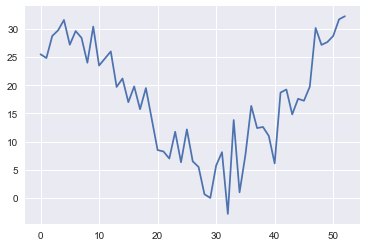

In [498]:
plt.plot(climate_merge['Max Temp (°C)'])

Text(0,0.5,'Weekly Mean Temperature')

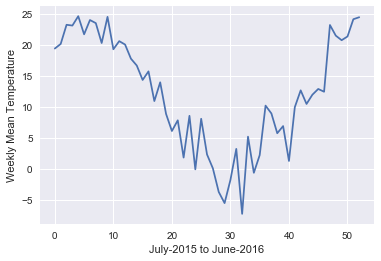

In [499]:
plt.plot(climate_merge['Mean Temp (°C)'])
plt.xlabel('July-2015 to June-2016')
plt.ylabel('Weekly Mean Temperature')

In [500]:
climate_merge.set_index(['week'], inplace = True)

In [501]:
climate_merge.describe()

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
count          53.00          53.00           53.00               53.00   
mean           17.45           6.62           12.19                7.71   
std             9.66           9.11            9.13                8.53   
min            -2.83         -17.17           -7.27                0.00   
25%             8.50          -1.20            5.72                0.10   
50%            17.60           6.00           12.40                5.60   
75%            26.00          15.33           20.55               12.28   
max            32.25          18.70           24.57               41.53   

       Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
count               53.00            53.00            53.00   
mean                 1.55             2.60             0.25   
std                  2.26             3.23             0.74   
min                  0.00             0.00             0.00   
25%                  0.00             0.28             0.00   
50%                  0.00             1.10             0.00   
75%                  3.00             4.20             0.00   
max                  6.57            12.80             3.00   

       Total Precip (mm)  Snow on Grnd (cm)  
count              53.00              53.00  
mean                2.85               0.39  
std                 3.50               1.52  
min                 0.00               0.00  
25%                 0.30               0.00  
50%                 1.72               0.00  
75%                 4.25               0.00  
max                15.70              10.33

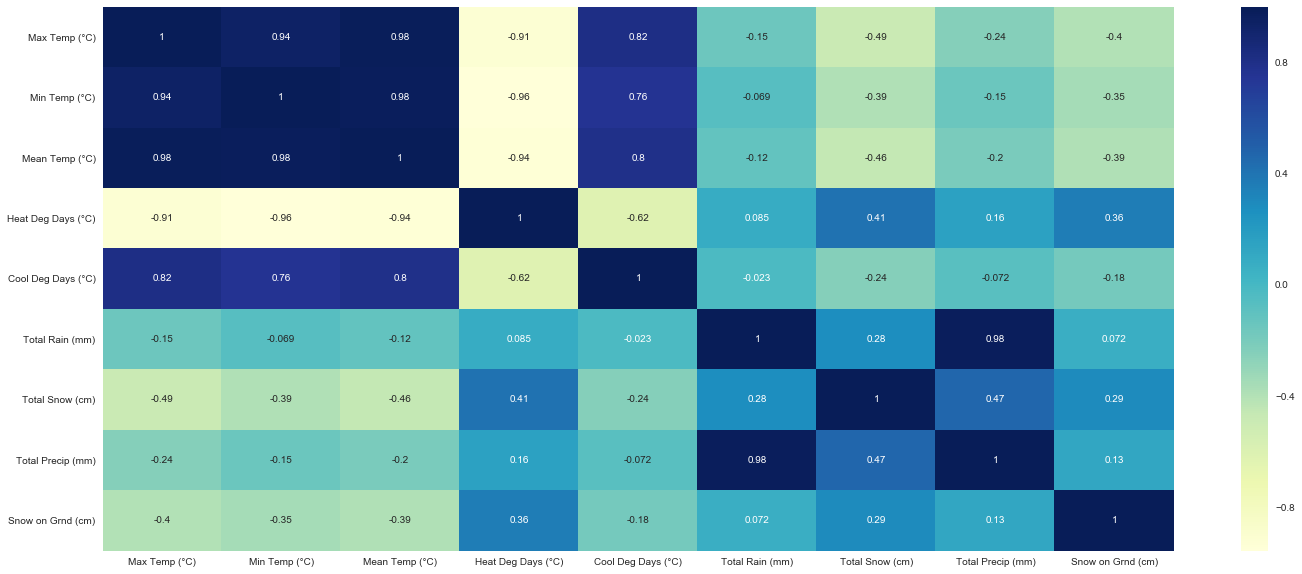

In [502]:
plt.figure(figsize=(24,10))
sns.heatmap(climate_merge.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [503]:
climate_merge.drop(['Total Precip (mm)', 'Cool Deg Days (°C)', 'Max Temp (°C)', 'Min Temp (°C)'], axis = 1, inplace = True)

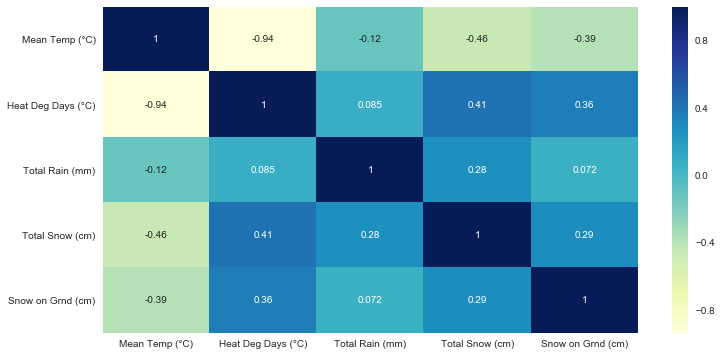

In [504]:
plt.figure(figsize=(12,6))
sns.heatmap(climate_merge.corr(),cmap='YlGnBu',annot=True)
plt.show()

## Combining climate data

In [505]:
CameraAccessory_weekly = CameraAccessory_weekly.merge(climate_merge, how = 'left', left_on = 'week', right_index = True)
CameraAccessory_weekly

week product_analytic_sub_category        gmv  sla  product_mrp  \
0       1               CameraAccessory    4067.00 4.00      1047.70   
3       2               CameraAccessory 1003905.00 6.86      1128.61   
6       3               CameraAccessory 1097503.00 6.54      1186.39   
9       4               CameraAccessory 1092921.00 6.56      1150.04   
12      5               CameraAccessory  747530.00 6.48      1144.97   
15      6               CameraAccessory     699.00 5.00      1450.00   
21     10               CameraAccessory  557495.00 6.31      1145.41   
24     11               CameraAccessory  447470.00 6.20      1232.03   
27     12               CameraAccessory 1096477.00 6.64      1163.49   
30     13               CameraAccessory 1061658.00 6.64      1200.07   
33     14               CameraAccessory 1564973.00 5.46      1474.56   
36     15               CameraAccessory 1192208.00 6.24      1275.92   
39     16               CameraAccessory 2922538.25 6.42      1152.41   
42     17               CameraAccessory 1254770.11 6.92      1196.36   
45     18               CameraAccessory 1532157.00 6.81      1180.03   
48     19               CameraAccessory 1639681.00 6.15      1158.44   
51     20               CameraAccessory 1402863.00 6.56      1213.73   
54     21               CameraAccessory 1053853.00 6.00      1247.11   
57     22               CameraAccessory 1116641.00 6.44      1179.12   
60     23               CameraAccessory 1227462.00 6.26      1204.15   
63     24               CameraAccessory 1407888.00 5.97      1329.62   
66     25               CameraAccessory 1259280.00 6.76      1188.93   
69     26               CameraAccessory 1434999.00 6.39      1158.68   
72     27               CameraAccessory 1362286.00 6.15      1124.75   
75     28               CameraAccessory 1605146.00 6.05      1089.69   
78     29               CameraAccessory 1285497.00 6.45      1137.75   
81     30               CameraAccessory 1705972.00 6.24      1049.04   
84     31               CameraAccessory 1300352.00 6.55      1129.62   
87     32               CameraAccessory 1790209.00 6.25      1084.12   
90     33               CameraAccessory 1391401.00 6.18      1120.62   
93     34               CameraAccessory 2048439.00 5.94      1078.98   
96     35               CameraAccessory 1885103.00 6.04      1132.71   
99     36               CameraAccessory 1788057.00 5.97      1079.88   
102    37               CameraAccessory 1860610.00 5.91      1113.71   
105    38               CameraAccessory 1500613.50 5.92      1200.48   
108    39               CameraAccessory 1617127.00 5.60      1090.75   
111    40               CameraAccessory 1843524.00 5.57      1092.03   
114    41               CameraAccessory 1879317.00 5.89      1230.00   
117    42               CameraAccessory 1395482.00 5.68      1159.55   
120    43               CameraAccessory  771785.00 4.86      1167.85   
123    44               CameraAccessory 2892142.00 6.22      1229.72   
126    45               CameraAccessory 1868718.00 5.82      1192.16   
129    46               CameraAccessory 1815196.00 5.76      1184.98   
132    47               CameraAccessory 1675126.00 5.53      1166.70   
135    48               CameraAccessory 3070014.00 5.64      1157.86   
138    49               CameraAccessory 1630654.00 6.02      1100.22   
141    50               CameraAccessory 1699946.00 5.67      1129.63   
144    51               CameraAccessory 1470807.00 5.68      1090.11   
147    52               CameraAccessory 1170671.00 6.01      1129.68   
150    53               CameraAccessory  478815.00 5.18      1096.55   

     product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
0                       2.00      2.00                52.47        406.70   
3                       2.04      4.82                46.50        571.62   
6                       2.04      4.50                47.76        558.00   
9                       

In [506]:
GamingAccessory_weekly = GamingAccessory_weekly.merge(climate_merge, how = 'left', left_on = 'week', right_index = True)
GamingAccessory_weekly

week product_analytic_sub_category        gmv  sla  product_mrp  \
1       1               GamingAccessory    7758.00 5.56      1200.67   
4       2               GamingAccessory  763139.00 6.54      1027.67   
7       3               GamingAccessory  783978.36 5.87       855.40   
10      4               GamingAccessory  765301.00 6.00      1002.70   
13      5               GamingAccessory  551707.00 6.30      1047.57   
16      6               GamingAccessory    1441.00 7.00       891.67   
18      7               GamingAccessory    1322.00 5.00      1995.00   
19      8               GamingAccessory     359.00 3.00       699.00   
20      9               GamingAccessory     614.00 6.50       674.50   
22     10               GamingAccessory  577636.00 5.60       922.00   
25     11               GamingAccessory  365568.00 5.95       979.47   
28     12               GamingAccessory  950705.75 6.49      1101.22   
31     13               GamingAccessory  973568.00 6.36      1107.91   
34     14               GamingAccessory  978894.00 6.22      1080.44   
37     15               GamingAccessory  911973.00 5.72      1047.29   
40     16               GamingAccessory 3167714.00 5.68      1044.20   
43     17               GamingAccessory  992776.00 6.33      1030.27   
46     18               GamingAccessory 1405713.46 6.12      1022.90   
49     19               GamingAccessory 1470290.00 5.45       944.24   
52     20               GamingAccessory 1350319.00 6.34      1010.64   
55     21               GamingAccessory 1081336.00 5.90      1103.80   
58     22               GamingAccessory 1496676.00 6.08      1103.68   
61     23               GamingAccessory 1553554.00 6.32      1044.51   
64     24               GamingAccessory 1483030.25 6.01      1036.35   
67     25               GamingAccessory 1331840.00 6.80      1117.31   
70     26               GamingAccessory 2206569.00 5.99      1366.69   
73     27               GamingAccessory 1605851.00 6.19      1282.08   
76     28               GamingAccessory 1690682.00 6.18      1183.62   
79     29               GamingAccessory 1631372.00 6.12      1155.84   
82     30               GamingAccessory 2144142.90 6.40      1133.47   
85     31               GamingAccessory 1391588.00 6.29      1081.12   
88     32               GamingAccessory 1677618.25 6.05      1055.21   
91     33               GamingAccessory 1611661.50 5.74      1056.11   
94     34               GamingAccessory 2022935.08 5.72      1041.66   
97     35               GamingAccessory 1866201.35 6.21      1059.07   
100    36               GamingAccessory 1917160.25 5.95      1033.92   
103    37               GamingAccessory 2112722.25 5.65      1131.54   
106    38               GamingAccessory 1314071.25 6.06      1079.74   
109    39               GamingAccessory 1331551.50 6.11      1111.84   
112    40               GamingAccessory 1357487.50 6.00      1154.39   
115    41               GamingAccessory 1450082.00 6.28      1215.34   
118    42               GamingAccessory 1249617.00 6.07      1202.54   
121    43               GamingAccessory  801032.00 4.77      1168.80   
124    44               GamingAccessory 2698957.00 6.35      1192.47   
127    45               GamingAccessory 1616853.00 6.00      1261.51   
130    46               GamingAccessory 1834555.00 5.81      1210.69   
133    47               GamingAccessory 1886556.25 5.76      1263.59   
136    48               GamingAccessory 3521468.25 5.78      1320.82   
139    49               GamingAccessory 1867497.92 5.93      1187.96   
142    50               GamingAccessory 1664411.00 5.88      1168.90   
145    51               GamingAccessory 1584534.00 6.04      1145.26   
148    52               GamingAccessory 1402869.25 6.05      1133.35   
151    53               GamingAccessory  566818.25 5.14      1115.83   

     product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
1                       1.89      3.67 

In [507]:
HomeAudio_weekly = HomeAudio_weekly.merge(climate_merge, how = 'left', left_on = 'week', right_index = True)
HomeAudio_weekly

week product_analytic_sub_category        gmv  sla  product_mrp  \
2       1                     HomeAudio   12581.00 6.12      2769.38   
5       2                     HomeAudio 1165624.00 7.49      1988.23   
8       3                     HomeAudio 1441028.00 7.18      2063.21   
11      4                     HomeAudio 1230725.00 7.18      1942.15   
14      5                     HomeAudio  916000.00 7.30      1990.46   
17      6                     HomeAudio    2599.00 9.00      3099.00   
23     10                     HomeAudio  479403.00 7.00      1653.92   
26     11                     HomeAudio  357437.00 6.62      1654.90   
29     12                     HomeAudio  966148.00 7.33      1690.54   
32     13                     HomeAudio 1223796.00 7.17      1574.97   
35     14                     HomeAudio 1172485.00 7.24      1744.30   
38     15                     HomeAudio 1004890.00 6.71      1681.28   
41     16                     HomeAudio 3568673.00 6.94      1838.51   
44     17                     HomeAudio 1323833.00 7.06      1706.79   
47     18                     HomeAudio 1575308.00 6.97      1767.72   
50     19                     HomeAudio 1205247.50 6.76      1627.73   
53     20                     HomeAudio 1196277.12 7.33      1666.08   
56     21                     HomeAudio  861101.00 6.63      1666.84   
59     22                     HomeAudio 1146037.00 7.25      1766.30   
62     23                     HomeAudio  916252.00 6.88      1657.39   
65     24                     HomeAudio 1014544.00 7.12      1799.86   
68     25                     HomeAudio 1020977.00 7.60      1703.89   
71     26                     HomeAudio  919274.00 7.01      1680.39   
74     27                     HomeAudio 1300364.00 7.13      1795.60   
77     28                     HomeAudio 1207999.00 6.75      1688.54   
80     29                     HomeAudio  983815.00 6.89      1763.17   
83     30                     HomeAudio 1171921.00 7.12      1714.61   
86     31                     HomeAudio 1080067.00 6.99      1688.40   
89     32                     HomeAudio 1374374.00 6.66      1747.07   
92     33                     HomeAudio 1192557.00 6.73      1747.29   
95     34                     HomeAudio 1427027.00 6.69      1814.78   
98     35                     HomeAudio 1515281.00 6.79      1916.79   
101    36                     HomeAudio 1448342.00 6.64      1786.04   
104    37                     HomeAudio 1469342.00 6.66      1802.46   
107    38                     HomeAudio 1283850.00 6.62      1793.79   
110    39                     HomeAudio 1145983.00 6.47      1752.54   
113    40                     HomeAudio  980578.00 6.04      1780.04   
116    41                     HomeAudio  888232.00 6.32      1794.74   
119    42                     HomeAudio  659773.00 6.25      1798.73   
122    43                     HomeAudio  279103.00 5.43      1790.97   
125    44                     HomeAudio 1442296.00 6.71      1761.55   
128    45                     HomeAudio  843533.00 6.18      1680.94   
131    46                     HomeAudio  779767.00 6.10      1733.28   
134    47                     HomeAudio  723558.00 5.99      1730.24   
137    48                     HomeAudio 1066968.00 5.36      1779.43   
140    49                     HomeAudio  741266.00 6.05      1724.55   
143    50                     HomeAudio  951583.00 6.28      1723.45   
146    51                     HomeAudio  888152.00 5.73      1737.95   
149    52                     HomeAudio  574656.00 4.89      1731.04   
152    53                     HomeAudio  220061.00 4.29      1766.99   

     product_procurement_sla  sla_diff  discount_percentage  gmv_per_unit  \
2                       2.25      3.88                43.49       1572.62   
5                       1.91      5.58                32.63       1284.11   
8                       1.75      5.43                32.43       1337.00   
11                      

## Final DataFrames

In [508]:
CameraAccessory_weekly.to_csv('CameraAccessory_weekly.csv')
print(CameraAccessory_weekly.isnull().sum())
print(CameraAccessory_weekly.shape)

week                             0
product_analytic_sub_category    0
gmv                              0
sla                              0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
TV_adstock                       0
Digital_adstock                  0
Sponsorship_adstock              0
content_marketing_adstock        0
online_marketing_ads

In [509]:
GamingAccessory_weekly.to_csv('GamingAccessory_weekly.csv')
print(GamingAccessory_weekly.isnull().sum())
print(GamingAccessory_weekly.shape)

week                             0
product_analytic_sub_category    0
gmv                              0
sla                              0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
TV_adstock                       0
Digital_adstock                  0
Sponsorship_adstock              0
content_marketing_adstock        0
online_marketing_ads

In [510]:
HomeAudio_weekly.to_csv('HomeAudio_weekly.csv')
print(HomeAudio_weekly.isnull().sum())
print(HomeAudio_weekly.shape)

week                             0
product_analytic_sub_category    0
gmv                              0
sla                              0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
TV_adstock                       0
Digital_adstock                  0
Sponsorship_adstock              0
content_marketing_adstock        0
online_marketing_ads

In [511]:
#dropping week and product_analytic_sub_category for modelling purpose
CameraAccessory_weekly.drop(['week', 'product_analytic_sub_category'], axis = 1, inplace = True)
GamingAccessory_weekly.drop(['week', 'product_analytic_sub_category'], axis = 1, inplace = True)
HomeAudio_weekly.drop(['week', 'product_analytic_sub_category'], axis = 1, inplace = True)

In [512]:
CameraAccessory_weekly

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
0      4067.00 4.00      1047.70                     2.00      2.00   
3   1003905.00 6.86      1128.61                     2.04      4.82   
6   1097503.00 6.54      1186.39                     2.04      4.50   
9   1092921.00 6.56      1150.04                     2.07      4.50   
12   747530.00 6.48      1144.97                     2.10      4.38   
15      699.00 5.00      1450.00                     4.00      1.00   
21   557495.00 6.31      1145.41                     2.07      4.25   
24   447470.00 6.20      1232.03                     2.08      4.12   
27  1096477.00 6.64      1163.49                     2.10      4.53   
30  1061658.00 6.64      1200.07                     2.13      4.51   
33  1564973.00 5.46      1474.56                     2.00      3.45   
36  1192208.00 6.24      1275.92                     2.08      4.16   
39  2922538.25 6.42      1152.41                     2.19      4.23   
42  1254770.11 6.92      1196.36                     2.14      4.78   
45  1532157.00 6.81      1180.03                     2.03      4.78   
48  1639681.00 6.15      1158.44                     2.27      3.89   
51  1402863.00 6.56      1213.73                     2.18      4.39   
54  1053853.00 6.00      1247.11                     2.05      3.95   
57  1116641.00 6.44      1179.12                     2.12      4.32   
60  1227462.00 6.26      1204.15                     2.13      4.13   
63  1407888.00 5.97      1329.62                     1.97      4.00   
66  1259280.00 6.76      1188.93                     2.17      4.59   
69  1434999.00 6.39      1158.68                     2.15      4.23   
72  1362286.00 6.15      1124.75                     1.99      4.17   
75  1605146.00 6.05      1089.69                     2.25      3.79   
78  1285497.00 6.45      1137.75                     2.10      4.35   
81  1705972.00 6.24      1049.04                     2.34      3.90   
84  1300352.00 6.55      1129.62                     2.10      4.45   
87  1790209.00 6.25      1084.12                     2.25      4.00   
90  1391401.00 6.18      1120.62                     2.12      4.07   
93  2048439.00 5.94      1078.98                     2.21      3.74   
96  1885103.00 6.04      1132.71                     1.96      4.08   
99  1788057.00 5.97      1079.88                     2.15      3.82   
102 1860610.00 5.91      1113.71                     2.10      3.81   
105 1500613.50 5.92      1200.48                     2.00      3.92   
108 1617127.00 5.60      1090.75                     2.06      3.54   
111 1843524.00 5.57      1092.03                     2.08      3.49   
114 1879317.00 5.89      1230.00                     2.03      3.86   
117 1395482.00 5.68      1159.55                     2.02      3.65   
120  771785.00 4.86      1167.85                     2.00      2.85   
123 2892142.00 6.22      1229.72                     2.05      4.17   
126 1868718.00 5.82      1192.16                     1.94      3.88   
129 1815196.00 5.76      1184.98                     1.95      3.81   
132 1675126.00 5.53      1166.70                     2.02      3.51   
135 3070014.00 5.64      1157.86                     1.98      3.66   
138 1630654.00 6.02      1100.22                     2.04      3.98   
141 1699946.00 5.67      1129.63                     2.01      3.66   
144 1470807.00 5.68      1090.11                     2.06      3.61   
147 1170671.00 6.01      1129.68                     2.09      3.93   
150  478815.00 5.18      1096.55                     2.06      3.12   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
0                  52.47        406.70                       10.00   
3                  46.50        571.62                      515.00   
6                  47.76        558.00                      593.00   
9                  45.40        553.12                      551.00   
12                 45.26        564.68 

In [513]:
CameraAccessory_weekly.describe()

gmv   sla  product_mrp  product_procurement_sla  sla_diff  \
count      50.00 50.00        50.00                    50.00     50.00   
mean  1418440.96  6.05      1167.34                     2.12      3.93   
std    605406.37  0.55        83.25                     0.28      0.65   
min       699.00  4.00      1047.70                     1.94      1.00   
25%   1102287.50  5.78      1121.65                     2.02      3.75   
50%   1405375.50  6.10      1158.15                     2.07      3.99   
75%   1704465.50  6.43      1195.31                     2.13      4.30   
max   3070014.00  6.92      1474.56                     4.00      4.82   

       discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
count                50.00         50.00                       50.00   
mean                 52.36        496.11                      788.88   
std                   4.95         67.65                      777.30   
min                  44.31        390.60                        0.00   
25%                  48.18        445.25                      432.25   
50%                  52.48        482.24                      549.00   
75%                  56.58        556.79                      746.25   
max                  61.96        699.00                     3893.00   

       special_sales   NPS        ...          online_marketing_adstock  \
count          50.00 50.00        ...                             50.00   
mean            0.24 48.93        ...                              3.06   
std             0.43  3.27        ...                              1.29   
min             0.00 44.40        ...                              0.10   
25%             0.00 46.94        ...                              2.63   
50%             0.00 47.31        ...                              3.60   
75%             0.00 50.52        ...                              3.97   
max             1.00 59.99        ...                              4.24   

       affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  \
count               50.00        50.00          50.00          50.00   
mean                 0.44         0.72           0.06           0.34   
std                  0.18         0.65           0.09           0.65   
min                  0.01         0.28           0.00           0.00   
25%                  0.41         0.41           0.00           0.00   
50%                  0.52         0.47           0.01           0.00   
75%                  0.55         0.63           0.09           0.39   
max                  0.60         2.92           0.38           2.21   

       Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
count           50.00               50.00            50.00            50.00   
mean            11.57                8.15             2.59             0.27   
std              9.02                8.58             3.28             0.75   
min             -7.27                0.00             0.00             0.00   
25%              5.30                0.32             0.28             0.00   
50%             11.41                6.59             1.05             0.00   
75%             20.07               12.70             4.08             0.00   
max             24.57               41.53            12.80             3.00   

       Snow on Grnd (cm)  
count              50.00  
mean                0.41  
std                 1.57  
min                 0.00  
25%                 0.00  
50%                 0.00  
75%                 0.00  
max                10.33  

[8 rows x 36 columns]

# Model Building

## Linear model for HomeAudio

In [765]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = HomeAudio_weekly.select_dtypes(include=numerics)

In [766]:
### Finally required data is prepared and ready to start model building

### Let's split the data into train(70%) and test(30%)

In [767]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(newdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [768]:
from sklearn.preprocessing import MinMaxScaler

In [769]:
scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
23  0.06 0.78         0.16                     0.19      0.82   
113 0.21 0.42         0.42                     0.87      0.31   
116 0.19 0.53         0.45                     1.02      0.39   
89  0.33 0.65         0.35                     0.42      0.64   
134 0.14 0.40         0.32                     1.02      0.26   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
23                  0.53          0.15                        0.05   
113                 0.71          0.32                        0.59   
116                 0.76          0.30                        0.99   
89                  0.40          0.51                        0.23   
134                 1.00          0.06                        0.12   

     special_sales  NPS        ...          online_marketing_adstock  \
23            0.00 0.26        ...                              0.27   
113           0.00 0.56        ...                              0.78   
116           0.00 0.73        ...                              0.75   
89            1.00 0.58        ...                              0.93   
134           0.00 0.29        ...                              0.96   

     affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  \
23                 0.58         0.06           0.00           0.00   
113                0.80         0.04           0.26           0.38   
116                0.76         0.02           0.13           0.04   
89                 0.88         0.04           0.50           0.10   
134                0.92         0.11           0.38           0.18   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
23             1.00                0.00             0.79             0.00   
113            0.44                0.27             0.22             0.18   
116            0.27                0.40             0.18             0.18   
89             0.33                0.36             0.21             0.00   
134            0.62                0.13             0.02             0.00   

     Snow on Grnd (cm)  
23                0.00  
113               0.00  
116               0.00  
89                0.00  
134               0.00  

[5 rows x 36 columns]

In [770]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

sla  product_mrp  product_procurement_sla  sla_diff  discount_percentage  \
80  0.74         0.39                     0.39      0.74                 0.34   
83  0.82         0.29                     0.52      0.80                 0.48   
110 0.58         0.36                     1.00      0.45                 0.65   
56  0.64         0.19                     0.61      0.59                 0.38   
26  0.64         0.16                     0.48      0.62                 0.31   

     gmv_per_unit  order_payment_type_Prepaid  special_sales  NPS  \
80           0.54                        0.16           0.00 0.26   
83           0.38                        0.22           1.00 0.26   
110          0.34                        0.37           0.00 0.45   
56           0.33                        0.12           0.00 0.26   
26           0.29                        0.00           0.00 0.25   

     Stock Index        ...          online_marketing_adstock  \
80          0.16        ...                              0.98   
83          0.16        ...                              0.98   
110         0.00        ...                              0.80   
56          0.96        ...                              0.87   
26          0.38        ...                              0.44   

     affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  \
80                 1.00         0.02           0.85           0.99   
83                 1.00         0.02           0.95           1.00   
110                0.83         0.05           0.32           0.59   
56                 0.89         0.06           0.00           0.00   
26                 0.65         0.08           0.00           0.00   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
80             0.11                0.52             0.20             0.00   
83             0.05                1.00             0.00             0.00   
110            0.41                0.30             1.00             0.00   
56             0.42                0.29             0.26             0.83   
26             0.83                0.03             0.07             0.00   

     Snow on Grnd (cm)  
80                1.00  
83                0.00  
110               0.00  
56                0.17  
26                0.00  

[5 rows x 35 columns]

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [828]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [829]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [830]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_mrp', False, 13),
 ('product_procurement_sla', True, 1),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 4),
 ('gmv_per_unit', False, 10),
 ('order_payment_type_Prepaid', False, 19),
 ('special_sales', False, 11),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 14),
 ('TV_adstock', False, 7),
 ('Digital_adstock', False, 9),
 ('Sponsorship_adstock', False, 8),
 ('content_marketing_adstock', False, 2),
 ('online_marketing_adstock', False, 6),
 ('affiliates_adstock', True, 1),
 ('SEM_adstock', False, 3),
 ('Radio_adstock', False, 5),
 ('Other_adstock', True, 1),
 ('Mean Temp (°C)', False, 15),
 ('Heat Deg Days (°C)', False, 16),
 ('Total Rain (mm)', False, 12),
 ('Total Snow (cm)', Fals

In [831]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'sla_diff', 'NPS', 'Stock Index',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other',
       'affiliates_adstock', 'Other_adstock'],
      dtype='object')

In [832]:
X_train.columns[~rfe.support_]

Index(['product_mrp', 'discount_percentage', 'gmv_per_unit',
       'order_payment_type_Prepaid', 'special_sales', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'SEM_adstock', 'Radio_adstock',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [833]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [834]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [835]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [836]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     13.77
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.65e-07
Time:                        22:13:01   Log-Likelihood:                 59.395
No. Observations:                  35   AIC:                            -86.79
Df Residuals:                      19   BIC:                            -61.91
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

In [837]:
#dropping Other_adstock   --> high p-value
X_train_new = X_train_rfe.drop(["Other_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     12.94
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.30e-07
Time:                        22:13:01   Log-Likelihood:                 56.488
No. Observations:                  35   AIC:                            -82.98
Df Residuals:                      20   BIC:                            -59.65
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

In [838]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features         VIF
8                   Digital         inf
11         Online marketing         inf
15                    Other 52980027.10
4                       NPS 15916975.65
14                    Radio 11565825.13
5               Stock Index   511553.33
1                       sla   434048.46
13                      SEM   343512.85
2   product_procurement_sla   191697.61
3                  sla_diff   169845.83
7                        TV    54002.04
6          Total Investment    47033.88
10        Content Marketing    20822.99
12               Affiliates     9563.43
9               Sponsorship     9404.12
16       affiliates_adstock     5883.45
0                     const        0.00

In [839]:
#dropping TV   --> high vif
X_train_new = X_train_new.drop(["TV"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     11.33
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.01e-06
Time:                        22:13:02   Log-Likelihood:                 52.523
No. Observations:                  35   AIC:                            -77.05
Df Residuals:                      21   BIC:                            -55.27
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [840]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
4                       NPS      inf
5               Stock Index      inf
6          Total Investment      inf
7                   Digital      inf
8               Sponsorship      inf
9         Content Marketing      inf
10         Online marketing      inf
11               Affiliates      inf
12                      SEM      inf
13                    Radio      inf
14                    Other      inf
3                  sla_diff 25128.68
1                       sla 15594.20
2   product_procurement_sla  7818.26
15       affiliates_adstock  2467.83
0                     const     0.00

In [841]:
# Dropping sla --> high vif
X_train_new = X_train_new.drop(["sla"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     10.91
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.40e-06
Time:                        22:13:06   Log-Likelihood:                 51.940
No. Observations:                  35   AIC:                            -75.88
Df Residuals:                      21   BIC:                            -54.10
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [842]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3                       NPS     inf
4               Stock Index     inf
5          Total Investment     inf
6                   Digital     inf
7               Sponsorship     inf
8         Content Marketing     inf
9          Online marketing     inf
10               Affiliates     inf
11                      SEM     inf
12                    Radio     inf
13                    Other     inf
14       affiliates_adstock 2912.19
1   product_procurement_sla    6.16
2                  sla_diff    5.49
0                     const    0.00

In [843]:
# Dropping NPS
X_train_new = X_train_new.drop(["NPS"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1.907
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0908
Time:                        22:13:10   Log-Likelihood:                 29.740
No. Observations:                  35   AIC:                            -31.48
Df Residuals:                      21   BIC:                            -9.705
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [844]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
4          Total Investment 55088.43
5                   Digital 33384.43
12                    Other 27859.36
9                Affiliates 27012.01
11                    Radio 26461.94
6               Sponsorship 24779.35
10                      SEM 22262.90
0                     const  7587.88
8          Online marketing  7529.00
13       affiliates_adstock  6259.02
7         Content Marketing  4185.20
3               Stock Index   244.90
1   product_procurement_sla     6.00
2                  sla_diff     5.31

In [845]:
# Dropping Total Investment
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2.149
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0577
Time:                        22:13:19   Log-Likelihood:                 29.674
No. Observations:                  35   AIC:                            -33.35
Df Residuals:                      22   BIC:                            -13.13
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [846]:
# Dropping Stock Index  --> High p
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2.444
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0341
Time:                        22:13:43   Log-Likelihood:                 29.644
No. Observations:                  35   AIC:                            -35.29
Df Residuals:                      23   BIC:                            -16.62
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [847]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7                Affiliates 6067.15
11       affiliates_adstock 5140.24
3                   Digital 1378.12
8                       SEM  933.64
9                     Radio  768.07
0                     const  571.14
10                    Other  530.57
6          Online marketing  508.21
5         Content Marketing  246.22
4               Sponsorship   62.86
1   product_procurement_sla    4.22
2                  sla_diff    3.23

In [848]:
# Dropping SEM_adstock
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     2.614
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0262
Time:                        22:14:02   Log-Likelihood:                 28.989
No. Observations:                  35   AIC:                            -35.98
Df Residuals:                      24   BIC:                            -18.87
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [849]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3                   Digital 1371.92
7                       SEM  930.58
8                     Radio  768.00
0                     const  569.51
9                     Other  530.24
6          Online marketing  401.63
10       affiliates_adstock  399.70
5         Content Marketing  242.28
4               Sponsorship   62.86
1   product_procurement_sla    4.08
2                  sla_diff    3.23

In [850]:
# Dropping Online marketing
X_train_new = X_train_new.drop(["Digital"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2.653
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0260
Time:                        22:14:13   Log-Likelihood:                 27.829
No. Observations:                  35   AIC:                            -35.66
Df Residuals:                      25   BIC:                            -20.10
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [851]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5         Online marketing 396.04
9       affiliates_adstock 323.40
7                    Radio  79.77
8                    Other  63.96
4        Content Marketing  56.92
6                      SEM  47.34
0                    const  47.03
3              Sponsorship   7.68
1  product_procurement_sla   3.24
2                 sla_diff   2.66

In [852]:
# Dropping NPS
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     3.095
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0137
Time:                        22:14:28   Log-Likelihood:                 27.804
No. Observations:                  35   AIC:                            -37.61
Df Residuals:                      26   BIC:                            -23.61
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [853]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4        Content Marketing 53.26
5                      SEM 46.76
0                    const 39.51
6                    Radio 27.03
7                    Other 18.44
3              Sponsorship  3.48
8       affiliates_adstock  3.06
1  product_procurement_sla  3.01
2                 sla_diff  2.43

In [854]:
# Dropping Radio
X_train_new = X_train_new.drop(["SEM"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     3.647
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00676
Time:                        22:14:39   Log-Likelihood:                 27.744
No. Observations:                  35   AIC:                            -39.49
Df Residuals:                      27   BIC:                            -27.04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [855]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    const 37.33
5                    Radio 20.19
6                    Other 17.21
3              Sponsorship  3.45
4        Content Marketing  3.22
1  product_procurement_sla  3.00
7       affiliates_adstock  2.50
2                 sla_diff  2.40

In [856]:
# Dropping Radio
X_train_new = X_train_new.drop(["Radio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3.853
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00630
Time:                        22:16:08   Log-Likelihood:                 26.631
No. Observations:                  35   AIC:                            -39.26
Df Residuals:                      28   BIC:                            -28.37
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [857]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    const 32.42
4        Content Marketing  2.81
3              Sponsorship  2.76
1  product_procurement_sla  2.65
6       affiliates_adstock  2.31
2                 sla_diff  2.09
5                    Other  1.66

In [858]:
# Dropping Radio
X_train_new = X_train_new.drop(["Other"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     4.744
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00274
Time:                        22:16:35   Log-Likelihood:                 26.556
No. Observations:                  35   AIC:                            -41.11
Df Residuals:                      29   BIC:                            -31.78
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [859]:
# Dropping Radio
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     5.095
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00297
Time:                        22:16:54   Log-Likelihood:                 25.168
No. Observations:                  35   AIC:                            -40.34
Df Residuals:                      30   BIC:                            -32.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [860]:
# Dropping Radio
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.416
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00410
Time:                        22:17:15   Log-Likelihood:                 23.471
No. Observations:                  35   AIC:                            -38.94
Df Residuals:                      31   BIC:                            -32.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1700      0

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [861]:
# Dropping Radio
X_train_new = X_train_new.drop(["affiliates_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     8.184
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00135
Time:                        22:17:35   Log-Likelihood:                 23.326
No. Observations:                  35   AIC:                            -40.65
Df Residuals:                      32   BIC:                            -35.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1387      0.05

In [862]:
# Dropping Radio
X_train_new = X_train_new.drop(["sla_diff"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     14.96
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000489
Time:                        22:18:18   Log-Likelihood:                 22.639
No. Observations:                  35   AIC:                            -41.28
Df Residuals:                      33   BIC:                            -38.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1974      0.02

## Making Predictions

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [869]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [870]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [871]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

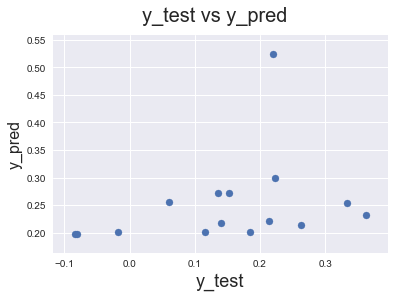

In [872]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [873]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.02749982597771723


In [874]:
print(metrics.r2_score(y_test, y_pred))

-0.6329447719354109


## Linear Model Gaming Accessory

In [875]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = GamingAccessory_weekly.select_dtypes(include=numerics)

### Let's split the data into train(70%) and test(30%)

In [876]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(newdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [877]:
from sklearn.preprocessing import MinMaxScaler

In [878]:
scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
70  0.63 0.79         1.07                     0.24      0.80   
139 0.53 0.77         0.79                     0.05      0.86   
151 0.16 0.56         0.68                    -0.00      0.71   
106 0.37 0.81         0.63                     0.15      0.85   
18  0.00 0.53         2.04                     1.31      0.22   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
70                  1.19          0.63                        0.23   
139                 0.69          0.76                        0.22   
151                 0.38          0.80                        0.06   
106                 0.28          0.77                        0.16   
18                 -0.46          3.00                        0.00   

     special_sales  NPS        ...          online_marketing_adstock  \
70            1.00 0.09        ...                              0.96   
139           0.00 0.33        ...                              0.81   
151           0.00 0.39        ...                              0.40   
106           0.00 0.30        ...                              0.81   
18            0.00 1.00        ...                              0.01   

     affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  \
70                 0.93         0.30           0.00           0.00   
139                0.57         0.09           0.27           0.07   
151                0.37         0.04           0.02           0.00   
106                0.84         0.09           0.30           0.59   
18                 0.00         0.00           0.00           0.00   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
70             0.45                0.24             0.56             0.00   
139            0.90                0.00             0.33             0.00   
151            0.99                0.00             0.08             0.00   
106            0.48                0.22             0.03             0.00   
18             0.98                0.00             0.23             0.00   

     Snow on Grnd (cm)  
70                0.00  
139               0.00  
151               0.00  
106               0.00  
18                0.00  

[5 rows x 36 columns]

In [879]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [880]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [894]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [895]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_mrp', False, 8),
 ('product_procurement_sla', True, 1),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 17),
 ('gmv_per_unit', False, 6),
 ('order_payment_type_Prepaid', True, 1),
 ('special_sales', False, 14),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 19),
 ('TV_adstock', False, 2),
 ('Digital_adstock', False, 7),
 ('Sponsorship_adstock', False, 11),
 ('content_marketing_adstock', False, 18),
 ('online_marketing_adstock', False, 16),
 ('affiliates_adstock', True, 1),
 ('SEM_adstock', False, 5),
 ('Radio_adstock', False, 9),
 ('Other_adstock', False, 10),
 ('Mean Temp (°C)', False, 3),
 ('Heat Deg Days (°C)', False, 4),
 ('Total Rain (mm)', False, 15),
 ('Total Snow (cm)', Fals

In [896]:
[zip(X_train.columns,rfe.support_,rfe.ranking_)]

In [897]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'sla_diff',
       'order_payment_type_Prepaid', 'NPS', 'Stock Index', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'affiliates_adstock'],
      dtype='object')

In [898]:
X_train.columns[~rfe.support_]

Index(['product_mrp', 'discount_percentage', 'gmv_per_unit', 'special_sales',
       'pay_day', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'content_marketing_adstock', 'online_marketing_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [899]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [900]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [901]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [902]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     22.37
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.37e-09
Time:                        22:22:13   Log-Likelihood:                 60.151
No. Observations:                  37   AIC:                            -86.30
Df Residuals:                      20   BIC:                            -58.92
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [903]:
#dropping affiliates_adstock
X_train_new = X_train_rfe.drop(["affiliates_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [904]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     24.07
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.75e-10
Time:                        22:22:36   Log-Likelihood:                 59.445
No. Observations:                  37   AIC:                            -86.89
Df Residuals:                      21   BIC:                            -61.12
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [905]:
#dropping Online marketing
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     25.64
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.13e-10
Time:                        22:22:44   Log-Likelihood:                 58.531
No. Observations:                  37   AIC:                            -87.06
Df Residuals:                      22   BIC:                            -62.90
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [906]:
#dropping Affiliates
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.15e-09
Time:                        22:22:58   Log-Likelihood:                 51.193
No. Observations:                  37   AIC:                            -74.39
Df Residuals:                      23   BIC:                            -51.83
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [907]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
1                          sla      inf
2      product_procurement_sla      inf
3                     sla_diff      inf
12                         SEM 13886.35
13                       Radio 13780.93
14                       Other 12911.31
9                      Digital 12380.87
7             Total Investment  4535.95
8                           TV  1286.94
10                 Sponsorship  1195.78
11           Content Marketing   759.50
5                          NPS   142.22
6                  Stock Index    40.53
4   order_payment_type_Prepaid     6.65
0                        const     0.00

In [908]:
#dropping SEM_adstock
X_train_new = X_train_new.drop(["sla"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.15e-09
Time:                        22:23:17   Log-Likelihood:                 51.193
No. Observations:                  37   AIC:                            -74.39
Df Residuals:                      23   BIC:                            -51.83
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [909]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11                         SEM 13886.35
12                       Radio 13780.93
13                       Other 12911.31
8                      Digital 12380.87
6             Total Investment  4535.95
7                           TV  1286.94
9                  Sponsorship  1195.78
10           Content Marketing   759.50
0                        const   730.20
4                          NPS   142.22
5                  Stock Index    40.53
1      product_procurement_sla    16.84
3   order_payment_type_Prepaid     6.65
2                     sla_diff     3.73

In [910]:
#dropping content_marketing_adstock
X_train_new = X_train_new.drop(["SEM"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     12.53
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.45e-07
Time:                        22:23:43   Log-Likelihood:                 42.462
No. Observations:                  37   AIC:                            -58.92
Df Residuals:                      24   BIC:                            -37.98
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [911]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6             Total Investment 2557.27
10           Content Marketing  638.29
9                  Sponsorship  627.85
0                        const  504.04
11                       Radio  496.44
12                       Other  303.56
7                           TV  205.24
8                      Digital  145.80
4                          NPS   38.18
1      product_procurement_sla    7.08
5                  Stock Index    6.21
3   order_payment_type_Prepaid    5.84
2                     sla_diff    2.69

In [912]:
#dropping online_marketing_adstock
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4.669
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000684
Time:                        22:23:58   Log-Likelihood:                 26.434
No. Observations:                  37   AIC:                            -28.87
Df Residuals:                      25   BIC:                            -9.538
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [913]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 308.46
10                       Radio 260.20
11                       Other 224.28
9            Content Marketing 192.83
7                      Digital 133.57
4                          NPS  30.92
6                           TV  19.19
8                  Sponsorship  12.76
1      product_procurement_sla   6.32
5                  Stock Index   6.03
3   order_payment_type_Prepaid   5.35
2                     sla_diff   2.59

In [914]:
#dropping Digital
X_train_new = X_train_new.drop(["Radio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     5.155
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000364
Time:                        22:24:09   Log-Likelihood:                 25.995
No. Observations:                  37   AIC:                            -29.99
Df Residuals:                      26   BIC:                            -12.27
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [915]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 302.51
9            Content Marketing  95.71
7                      Digital  63.75
4                          NPS  30.90
8                  Sponsorship  12.47
10                       Other  11.33
6                           TV   8.91
1      product_procurement_sla   5.80
5                  Stock Index   5.40
3   order_payment_type_Prepaid   4.87
2                     sla_diff   2.58

In [916]:
#dropping Mean Temp (°C)
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     5.592
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000228
Time:                        22:24:25   Log-Likelihood:                 25.243
No. Observations:                  37   AIC:                            -30.49
Df Residuals:                      27   BIC:                            -14.38
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [917]:
#dropping Other_adstock
X_train_new = X_train_new.drop(["Other"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     6.521
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.39e-05
Time:                        22:24:41   Log-Likelihood:                 25.239
No. Observations:                  37   AIC:                            -32.48
Df Residuals:                      28   BIC:                            -17.98
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [918]:
#dropping NPS
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     7.648
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.06e-05
Time:                        22:24:58   Log-Likelihood:                 25.127
No. Observations:                  37   AIC:                            -34.25
Df Residuals:                      29   BIC:                            -21.37
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [919]:
#dropping Heat Deg Days (°C)
X_train_new = X_train_new.drop(["sla_diff"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     8.904
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.30e-05
Time:                        22:25:14   Log-Likelihood:                 24.699
No. Observations:                  37   AIC:                            -35.40
Df Residuals:                      30   BIC:                            -24.12
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [920]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 25.72
4                          TV  3.78
6                 Sponsorship  3.60
5                     Digital  3.23
3                 Stock Index  2.79
1  order_payment_type_Prepaid  2.44
2                         NPS  2.31

In [921]:
#dropping Digital_adstock
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     9.753
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.13e-05
Time:                        22:25:40   Log-Likelihood:                 23.262
No. Observations:                  37   AIC:                            -34.52
Df Residuals:                      31   BIC:                            -24.86
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [922]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Digital"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.08e-06
Time:                        22:25:56   Log-Likelihood:                 22.597
No. Observations:                  37   AIC:                            -35.19
Df Residuals:                      32   BIC:                            -27.14
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [923]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["TV"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     14.23
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.05e-06
Time:                        22:26:15   Log-Likelihood:                 21.136
No. Observations:                  37   AIC:                            -34.27
Df Residuals:                      33   BIC:                            -27.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Making Predictions

In [924]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [925]:
X_train_new=X_train_new.drop('const',axis=1)

In [926]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [927]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [928]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

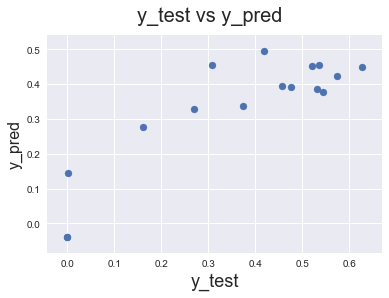

In [929]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [930]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.012183340447066843


In [931]:
print(metrics.r2_score(y_test, y_pred))

0.7217928370346851


## Linear Model Camera Accessory

In [934]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = CameraAccessory_weekly.select_dtypes(include=numerics)

### Let's split the data into train(70%) and test(30%)

In [935]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(newdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [936]:
from sklearn.preprocessing import MinMaxScaler

In [937]:
scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
21  0.04 0.71         0.23                     0.32      0.71   
111 0.53 0.34         0.10                     0.35      0.33   
114 0.55 0.50         0.43                     0.24      0.51   
87  0.51 0.67         0.08                     0.77      0.59   
132 0.47 0.33         0.28                     0.21      0.33   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
21                  0.04          0.89                        0.01   
111                 0.52          0.28                        0.62   
114                 0.71          0.34                        1.18   
87                  0.56          0.32                        0.14   
132                 0.82          0.17                        0.15   

     special_sales  NPS        ...          online_marketing_adstock  \
21            0.00 0.25        ...                              0.28   
111           0.00 0.59        ...                              0.78   
114           0.00 0.73        ...                              0.75   
87            1.00 0.58        ...                              0.93   
132           0.00 0.29        ...                              0.96   

     affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  \
21                 0.58         0.06           0.00           0.00   
111                0.80         0.04           0.24           0.32   
114                0.76         0.02           0.12           0.03   
87                 0.88         0.04           0.50           0.10   
132                0.92         0.11           0.38           0.18   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
21             1.00                0.00             0.79             0.00   
111            0.44                0.27             0.22             0.18   
114            0.27                0.40             0.18             0.18   
87             0.33                0.36             0.21             0.00   
132            0.62                0.13             0.02             0.00   

     Snow on Grnd (cm)  
21                0.00  
111               0.00  
114               0.00  
87                0.00  
132               0.00  

[5 rows x 36 columns]

In [939]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [940]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [941]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [942]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_mrp', False, 11),
 ('product_procurement_sla', True, 1),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 6),
 ('gmv_per_unit', False, 7),
 ('order_payment_type_Prepaid', True, 1),
 ('special_sales', False, 15),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 19),
 ('TV_adstock', False, 2),
 ('Digital_adstock', False, 5),
 ('Sponsorship_adstock', False, 3),
 ('content_marketing_adstock', False, 4),
 ('online_marketing_adstock', True, 1),
 ('affiliates_adstock', False, 14),
 ('SEM_adstock', False, 12),
 ('Radio_adstock', False, 8),
 ('Other_adstock', False, 16),
 ('Mean Temp (°C)', False, 9),
 ('Heat Deg Days (°C)', False, 10),
 ('Total Rain (mm)', False, 13),
 ('Total Snow (cm)', Fals

In [943]:
[zip(X_train.columns,rfe.support_,rfe.ranking_)]

In [944]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'sla_diff',
       'order_payment_type_Prepaid', 'NPS', 'Stock Index', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'online_marketing_adstock'],
      dtype='object')

In [945]:
X_train.columns[~rfe.support_]

Index(['product_mrp', 'discount_percentage', 'gmv_per_unit', 'special_sales',
       'pay_day', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'content_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [946]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [947]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [948]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [949]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     34.04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.28e-10
Time:                        22:32:21   Log-Likelihood:                 64.592
No. Observations:                  35   AIC:                            -95.18
Df Residuals:                      18   BIC:                            -68.74
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [950]:
#dropping Radio_adstock
X_train_new = X_train_rfe.drop(["Other"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [951]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     38.33
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.12e-11
Time:                        22:32:43   Log-Likelihood:                 64.596
No. Observations:                  35   AIC:                            -97.19
Df Residuals:                      19   BIC:                            -72.31
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [952]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
8                           TV       inf
14                         SEM       inf
15                       Radio       inf
5                          NPS       inf
6                  Stock Index       inf
7             Total Investment       inf
9                      Digital       inf
10                 Sponsorship       inf
11           Content Marketing       inf
12            Online marketing       inf
13                  Affiliates       inf
3                     sla_diff 671920.60
1                          sla 590499.99
2      product_procurement_sla 140488.35
16    online_marketing_adstock     74.18
4   order_payment_type_Prepaid      4.18
0                        const      0.00

In [953]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     38.33
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.11e-11
Time:                        22:34:45   Log-Likelihood:                 64.596
No. Observations:                  35   AIC:                            -97.19
Df Residuals:                      19   BIC:                            -72.31
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [954]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                          NPS   inf
5                  Stock Index   inf
6             Total Investment   inf
7                           TV   inf
8                      Digital   inf
9                  Sponsorship   inf
10           Content Marketing   inf
11            Online marketing   inf
12                  Affiliates   inf
13                         SEM   inf
14                       Radio   inf
15    online_marketing_adstock 74.13
1                          sla 45.29
2                     sla_diff 40.88
3   order_payment_type_Prepaid  4.18
0                        const  0.00

In [955]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["sla"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     43.02
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.89e-12
Time:                        22:34:56   Log-Likelihood:                 64.513
No. Observations:                  35   AIC:                            -99.03
Df Residuals:                      20   BIC:                            -75.70
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [956]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                          NPS   inf
4                  Stock Index   inf
5             Total Investment   inf
6                           TV   inf
7                      Digital   inf
8                  Sponsorship   inf
9            Content Marketing   inf
10            Online marketing   inf
11                  Affiliates   inf
12                         SEM   inf
13                       Radio   inf
14    online_marketing_adstock 73.95
2   order_payment_type_Prepaid  3.79
1                     sla_diff  2.19
0                        const  0.00

In [957]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["NPS"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     47.10
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.51e-12
Time:                        22:35:07   Log-Likelihood:                 63.966
No. Observations:                  35   AIC:                            -99.93
Df Residuals:                      21   BIC:                            -78.16
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [958]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
4             Total Investment 856432.43
7                  Sponsorship 395973.00
6                      Digital 111062.22
12                       Radio  65486.05
0                        const  64069.27
10                  Affiliates  58430.16
8            Content Marketing   6964.22
5                           TV   2817.46
9             Online marketing   2155.10
3                  Stock Index    660.89
11                         SEM    235.18
13    online_marketing_adstock     68.08
2   order_payment_type_Prepaid      3.74
1                     sla_diff      2.18

In [959]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     29.08
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.05e-10
Time:                        22:35:31   Log-Likelihood:                 53.796
No. Observations:                  35   AIC:                            -81.59
Df Residuals:                      22   BIC:                            -61.37
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [960]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9                   Affiliates 3270.36
5                      Digital 1829.24
7            Content Marketing 1573.22
8             Online marketing 1451.76
0                        const  427.54
4                           TV  362.51
6                  Sponsorship  196.79
10                         SEM  178.92
11                       Radio  117.92
12    online_marketing_adstock   35.60
3                  Stock Index   34.68
2   order_payment_type_Prepaid    3.41
1                     sla_diff    1.87

In [961]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.89e-08
Time:                        22:35:45   Log-Likelihood:                 42.825
No. Observations:                  35   AIC:                            -61.65
Df Residuals:                      23   BIC:                            -42.99
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [962]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5                      Digital 423.04
7            Content Marketing 283.47
0                        const 196.22
9                          SEM 163.24
8             Online marketing  85.19
4                           TV  28.13
6                  Sponsorship  25.06
10                       Radio  21.26
11    online_marketing_adstock  18.90
3                  Stock Index   7.39
1                     sla_diff   1.79
2   order_payment_type_Prepaid   1.67

In [963]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Digital"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5.609
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000263
Time:                        22:35:58   Log-Likelihood:                 25.444
No. Observations:                  35   AIC:                            -28.89
Df Residuals:                      24   BIC:                            -11.78
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [964]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        const 83.47
6            Content Marketing 73.53
8                          SEM 69.17
7             Online marketing 24.26
10    online_marketing_adstock 18.70
5                  Sponsorship  8.12
9                        Radio  7.06
3                  Stock Index  6.07
4                           TV  5.27
1                     sla_diff  1.78
2   order_payment_type_Prepaid  1.54

In [965]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     6.449
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000102
Time:                        22:36:13   Log-Likelihood:                 25.364
No. Observations:                  35   AIC:                            -30.73
Df Residuals:                      25   BIC:                            -15.17
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [966]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 83.34
6            Online marketing 21.03
9    online_marketing_adstock 18.70
5                 Sponsorship  7.98
3                 Stock Index  5.83
7                         SEM  5.45
8                       Radio  4.74
4                          TV  4.13
1                    sla_diff  1.77
2  order_payment_type_Prepaid  1.52

In [967]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     7.085
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.86e-05
Time:                        22:36:29   Log-Likelihood:                 24.600
No. Observations:                  35   AIC:                            -31.20
Df Residuals:                      26   BIC:                            -17.20
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [968]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 75.43
3                 Stock Index  5.65
5                 Sponsorship  5.64
6                         SEM  5.20
4                          TV  4.13
7                       Radio  3.91
8    online_marketing_adstock  2.64
1                    sla_diff  1.66
2  order_payment_type_Prepaid  1.52

In [969]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     8.030
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.80e-05
Time:                        22:37:44   Log-Likelihood:                 24.051
No. Observations:                  35   AIC:                            -32.10
Df Residuals:                      27   BIC:                            -19.66
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [970]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 28.52
4                 Sponsorship  3.74
5                         SEM  3.06
3                          TV  2.23
7    online_marketing_adstock  2.12
6                       Radio  1.74
1                    sla_diff  1.43
2  order_payment_type_Prepaid  1.13

In [971]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["sla_diff"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     9.633
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.03e-06
Time:                        22:38:08   Log-Likelihood:                 23.950
No. Observations:                  35   AIC:                            -33.90
Df Residuals:                      28   BIC:                            -23.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [972]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     11.96
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.44e-06
Time:                        22:38:35   Log-Likelihood:                 23.940
No. Observations:                  35   AIC:                            -35.88
Df Residuals:                      29   BIC:                            -26.55
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [973]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Radio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     15.08
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.30e-07
Time:                        22:38:49   Log-Likelihood:                 23.639
No. Observations:                  35   AIC:                            -37.28
Df Residuals:                      30   BIC:                            -29.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [974]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["SEM"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     18.33
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.01e-07
Time:                        22:39:02   Log-Likelihood:                 22.210
No. Observations:                  35   AIC:                            -36.42
Df Residuals:                      31   BIC:                            -30.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Making Predictions

In [975]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [976]:
X_train_new=X_train_new.drop('const',axis=1)

In [977]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [978]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [979]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

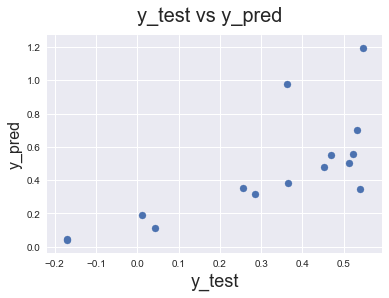

In [980]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [981]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.0671229066685036


In [982]:
print(metrics.r2_score(y_test, y_pred))

-0.09709062173066974


# Multiplicative Model

In [1061]:
cam = CameraAccessory_weekly.copy()

In [1062]:
cam.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
0     4067.00 4.00      1047.70                     2.00      2.00   
3  1003905.00 6.86      1128.61                     2.04      4.82   
6  1097503.00 6.54      1186.39                     2.04      4.50   
9  1092921.00 6.56      1150.04                     2.07      4.50   
12  747530.00 6.48      1144.97                     2.10      4.38   

    discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
0                 52.47        406.70                       10.00   
3                 46.50        571.62                      515.00   
6                 47.76        558.00                      593.00   
9                 45.40        553.12                      551.00   
12                45.26        564.68                      349.00   

    special_sales   NPS        ...          online_marketing_adstock  \
0               0 54.60        ...                              0.10   
3               0 54.60        ...                              0.16   
6               1 54.60        ...                              0.19   
9               0 54.60        ...                              0.21   
12              0 54.60        ...                              0.22   

    affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  \
0                 0.04         0.37           0.00           0.00   
3                 0.04         0.44           0.00           0.00   
6                 0.04         0.46           0.00           0.00   
9                 0.04         0.46           0.00           0.00   
12                0.04         0.46           0.00           0.00   

    Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
0            19.36                0.10             0.00             0.00   
3            20.10                0.28             4.42             0.00   
6            23.18                0.00             1.40             0.00   
9            23.06                0.00             0.90             0.00   
12           24.57                0.00             4.63             0.00   

    Snow on Grnd (cm)  
0                0.00  
3                0.00  
6                0.00  
9                0.00  
12               0.00  

[5 rows x 36 columns]

In [1063]:
cam['ln_gmv'] = np.log(cam['gmv'])

In [1064]:
cam['ln_mrp'] = np.log(cam['product_mrp'])

In [1065]:
gmv_mrp = cam[['ln_gmv', 'ln_mrp']]

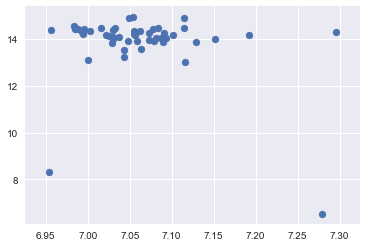

In [1066]:
plt.scatter(gmv_mrp['ln_mrp'], gmv_mrp['ln_gmv'])

In [1067]:
import statsmodels.formula.api as smf

In [1068]:
result = smf.ols(formula = 'ln_gmv ~ ln_mrp', data = gmv_mrp).fit()

In [1069]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.078
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0857
Time:                        23:28:15   Log-Likelihood:                -85.491
No. Observations:                  50   AIC:                             175.0
Df Residuals:                      48   BIC:                             178.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.5741     20.352      2.436      0.019       8.655      90.494
ln_mrp        -5.0574      2.882     -1.755      0.086     -10.853       0.738
==============================================================================
Omnibus:                       69.995   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.418
Skew:                          -3.813   Prob(JB):                    1.02e-128
Kurtosis:                      17.993   Cond. No.                         759.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1070]:
cam.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'ln_gmv', 'ln_mrp'],
      dtype='object')

In [1071]:
cam.replace(to_replace = 0, value = 0.00000001, inplace = True)

In [1072]:
cam['ln_TV'] = np.log(cam['TV'])
cam['ln_Digital'] = np.log(cam['Digital'])
cam['ln_Sponsorship'] = np.log(cam['Sponsorship'])
cam['ln_Online_marketing'] = np.log(cam['Online marketing'])
cam['ln_Affiliates'] = np.log(cam['Affiliates'])
cam['ln_Radio'] = np.log(cam['Radio'])
cam['ln_Content_Marketing'] = np.log(cam['Content Marketing'])
cam['ln_SEM'] = np.log(cam['SEM'])
cam['ln_Other'] = np.log(cam['Other'])

In [1073]:
cam.iloc[:, 13:]

Digital  Sponsorship  Content Marketing  Online marketing  Affiliates  \
0       0.19         0.54               0.00              0.10        0.04   
3       0.19         0.54               0.00              0.10        0.04   
6       0.19         0.54               0.00              0.10        0.04   
9       0.19         0.54               0.00              0.10        0.04   
12      0.19         0.54               0.00              0.10        0.04   
15      0.09         0.08               0.00              0.01        0.01   
21      0.10         4.58               0.04              1.20        0.37   
24      0.10         4.61               0.04              1.20        0.37   
27      0.10         4.61               0.04              1.20        0.37   
30      0.10         4.61               0.04              1.20        0.37   
33      0.45         5.29               0.13              1.45        0.43   
36      0.93         6.21               0.25              1.79        0.51   
39      0.93         6.21               0.25              1.79        0.51   
42      0.93         6.21               0.25              1.79        0.51   
45      0.83         5.60               0.22              1.75        0.51   
48      0.09         1.04               0.01              1.44        0.48   
51      0.09         1.04               0.01              1.44        0.48   
54      0.09         1.04               0.01              1.44        0.48   
57      0.09         1.04               0.01              1.44        0.48   
60      0.20         3.65               0.07              1.62        0.50   
63      0.22         4.16               0.08              1.65        0.50   
66      0.22         4.16               0.08              1.65        0.50   
69      0.22         4.16               0.08              1.65        0.50   
72      0.14         2.39               0.07              1.66        0.52   
75      0.03         0.31               0.07              1.68        0.54   
78      0.03         0.31               0.07              1.68        0.54   
81      0.03         0.31               0.07              1.68        0.54   
84      0.03         0.31               0.07              1.68        0.54   
87      0.14         0.86               0.04              1.46        0.47   
90      0.14         0.86               0.04              1.46        0.47   
93      0.14         0.86               0.04              1.46        0.47   
96      0.14         0.86               0.04              1.46        0.47   
99      0.15         2.69               0.03              1.37        0.46   
102     0.15         3.05               0.03              1.35        0.46   
105     0.15         3.05               0.03              1.35        0.46   
108     0.15         3.05               0.03              1.35        0.46   
111     0.11         2.41               0.01              1.28        0.44   
114     0.06         1.78               0.00              1.21        0.42   
117     0.06         1.78               0.00              1.21        0.42   
120     0.06         1.78               0.00              1.21        0.42   
123     0.06         1.83               0.01              1.25        0.42   
126     0.06         2.32               0.06              1.74        0.50   
129     0.06         2.32               0.06              1.74        0.50   
132     0.06         2.32               0.06              1.74        0.50   
135     0.06         2.32               0.06              1.74        0.50   
138     0.09         1.97               0.02              0.90        0.28   
141     0.10         1.84               0.00              0.58        0.20   
144     0.10         1.84               0.00              0.58        0.20   
147     0.10         1.84               0.00              0.58        0.20   
150     0.10         1.84               0.00              0.58        0.20   

     SEM  Radio  Other  pa

In [1074]:
result_ad = smf.ols(formula = 'ln_gmv ~ ln_mrp + ln_TV + ln_Digital + ln_Sponsorship * ln_Online_marketing + ln_Affiliates + \
                    ln_Radio + ln_Content_Marketing + ln_SEM + ln_Other', data = cam).fit()

In [1075]:
result_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     9.199
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.95e-08
Time:                        23:28:22   Log-Likelihood:                -54.589
No. Observations:                  50   AIC:                             133.2
Df Residuals:                      38   BIC:                             156.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -25.9697     41.663     -0.623      0.537    -110.312      58.373
ln_mrp                                 4.3188      2.727      1.584      0.122      -1.202       9.840
ln_TV                                 -0.1480      1.123     -0.132      0.896      -2.421       2.125
ln_Digital                             1.1473      1.109      1.034      0.308      -1.098       3.393
ln_Sponsorship                        -0.3100      0.971     -0.319      0.751      -2.277       1.657
ln_Online_marketing                    9.6468     26.497      0.364      0.718     -43.994      63.288
ln_Sponsorship:ln_Online_marketing    -0.5071      0.381     -1.331      0.191      -1.278       0.264
ln_Affiliates                         -8.6008     27.557     -0.312      0.757     -64.386      47.185
ln_Radio                              -0.1104      1.383     -0.080      0.937      -2.910       2.689
ln_Content_Marketing                  -0.4786      0.761     -0.629      0.533      -2.019       1.062
ln_SEM                                -0.9278      1.836     -0.505      0.616      -4.644       2.789
ln_Other                               0.1418      1.209      0.117      0.907      -2.306       2.589
==============================================================================
Omnibus:                       65.548   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.523
Skew:                          -3.259   Prob(JB):                    6.88e-151
Kurtosis:                      20.013   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has higher p-values but those can be accounted for the interaction effect between variables

# Multiplicative Model - GamingAccessory

In [1081]:
game = GamingAccessory_weekly.copy()

In [1082]:
game['ln_gmv'] = np.log(game['gmv'])

In [1083]:
game['ln_mrp'] = np.log(game['product_mrp'])

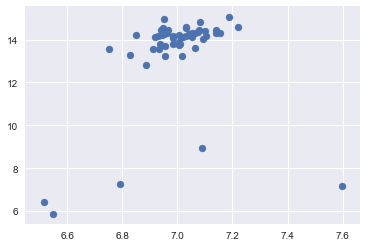

In [1084]:
gmv_mrp = game[['ln_gmv', 'ln_mrp']]

plt.scatter(gmv_mrp['ln_mrp'], gmv_mrp['ln_gmv'])

In [1085]:
import statsmodels.formula.api as smf
result = smf.ols(formula = 'ln_gmv ~ ln_mrp', data = gmv_mrp).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     5.022
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0294
Time:                        23:32:10   Log-Likelihood:                -112.19
No. Observations:                  53   AIC:                             228.4
Df Residuals:                      51   BIC:                             232.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.3847     12.873     -1.195      0.238     -41.229      10.459
ln_mrp         4.1223      1.840      2.241      0.029       0.429       7.815
==============================================================================
Omnibus:                       51.910   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.091
Skew:                          -2.860   Prob(JB):                     7.14e-43
Kurtosis:                      10.428   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1086]:
game.replace(to_replace = 0, value = 0.00000001, inplace = True)
game.iloc[:, 13:]

Digital  Sponsorship  Content Marketing  Online marketing  Affiliates  \
1       0.12         0.35               0.00              0.06        0.03   
4       0.12         0.35               0.00              0.06        0.03   
7       0.12         0.35               0.00              0.06        0.03   
10      0.12         0.35               0.00              0.06        0.03   
13      0.12         0.35               0.00              0.06        0.03   
16      0.06         0.05               0.00              0.01        0.00   
18      0.06         0.05               0.00              0.01        0.00   
19      0.06         0.05               0.00              0.01        0.00   
20      0.06         0.05               0.00              0.01        0.00   
22      0.06         2.92               0.03              0.76        0.23   
25      0.06         2.94               0.03              0.77        0.24   
28      0.06         2.94               0.03              0.77        0.24   
31      0.06         2.94               0.03              0.77        0.24   
34      0.36         3.51               0.10              0.98        0.29   
37      0.59         3.97               0.16              1.14        0.33   
40      0.59         3.97               0.16              1.14        0.33   
43      0.59         3.97               0.16              1.14        0.33   
46      0.53         3.56               0.14              1.11        0.32   
49      0.06         0.66               0.01              0.92        0.31   
52      0.06         0.66               0.01              0.92        0.31   
55      0.06         0.66               0.01              0.92        0.31   
58      0.06         0.66               0.01              0.92        0.31   
61      0.13         2.35               0.04              1.03        0.32   
64      0.14         2.66               0.05              1.05        0.32   
67      0.14         2.66               0.05              1.05        0.32   
70      0.14         2.66               0.05              1.05        0.32   
73      0.09         1.53               0.05              1.06        0.33   
76      0.02         0.20               0.04              1.07        0.35   
79      0.02         0.20               0.04              1.07        0.35   
82      0.02         0.20               0.04              1.07        0.35   
85      0.02         0.20               0.04              1.07        0.35   
88      0.09         0.55               0.03              0.93        0.30   
91      0.09         0.55               0.03              0.93        0.30   
94      0.09         0.55               0.03              0.93        0.30   
97      0.09         0.55               0.03              0.93        0.30   
100     0.10         1.77               0.02              0.87        0.29   
103     0.10         1.95               0.02              0.86        0.29   
106     0.10         1.95               0.02              0.86        0.29   
109     0.10         1.95               0.02              0.86        0.29   
112     0.07         1.59               0.01              0.82        0.28   
115     0.04         1.14               0.00              0.77        0.27   
118     0.04         1.14               0.00              0.77        0.27   
121     0.04         1.14               0.00              0.77        0.27   
124     0.04         1.17               0.00              0.80        0.27   
127     0.04         1.48               0.04              1.11        0.32   
130     0.04         1.48               0.04              1.11        0.32   
133     0.04         1.48               0.04              1.11        0.32   
136     0.04         1.48               0.04              1.11        0.32   
139     0.06         1.27               0.01              0.59        0.19   
142     0.07         1.17               0.00              0.37        0.13   
145     0.07         1.17  

In [1092]:
game.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'ln_gmv', 'ln_mrp'],
      dtype='object')

In [1093]:
game['ln_TV'] = np.log(game['TV'])
game['ln_Digital'] = np.log(game['Digital'])
game['ln_Sponsorship'] = np.log(game['Sponsorship'])
game['ln_Online_marketing'] = np.log(game['Online marketing'])
game['ln_Affiliates'] = np.log(game['Affiliates'])
game['ln_Radio'] = np.log(game['Radio'])
game['ln_Content_Marketing'] = np.log(game['Content Marketing'])
game['ln_SEM'] = np.log(game['SEM'])
game['ln_Other'] = np.log(game['Other'])

In [1094]:
result_ad = smf.ols(formula = 'ln_gmv ~ ln_mrp + ln_TV + ln_Digital + ln_Sponsorship + ln_Online_marketing + ln_Affiliates +ln_Radio + ln_Content_Marketing + ln_SEM + ln_Other', data = game).fit()

In [1095]:
result_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     38.05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.50e-18
Time:                        23:36:32   Log-Likelihood:                -53.503
No. Observations:                  53   AIC:                             129.0
Df Residuals:                      42   BIC:                             150.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -18.4022     12.622     -1.458      0.152     -43.875       7.070
ln_mrp                   0.1743      0.749      0.233      0.817      -1.336       1.685
ln_TV                    1.0583      0.460      2.302      0.026       0.131       1.986
ln_Digital               1.8900      0.456      4.143      0.000       0.969       2.811
ln_Sponsorship          -1.0513      0.278     -3.777      0.000      -1.613      -0.490
ln_Online_marketing     29.0122      7.088      4.093      0.000      14.709      43.316
ln_Affiliates          -29.1755      7.054     -4.136      0.000     -43.412     -14.939
ln_Radio                 0.5142      1.251      0.411      0.683      -2.011       3.040
ln_Content_Marketing    -0.9532      0.305     -3.121      0.003      -1.570      -0.337
ln_SEM                  -2.3784      0.607     -3.916      0.000      -3.604      -1.153
ln_Other                -0.4100      1.088     -0.377      0.708      -2.605       1.785
==============================================================================
Omnibus:                       53.546   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.083
Skew:                          -2.493   Prob(JB):                     1.77e-83
Kurtosis:                      15.153   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## For HomeAudio

In [1097]:
home = HomeAudio_weekly.copy()

In [1098]:
home['ln_gmv'] = np.log(home['gmv'])
home['ln_mrp'] = np.log(home['product_mrp'])
home.replace(to_replace = 0, value = 0.00000001, inplace = True)
home['ln_TV'] = np.log(home['TV'])
home['ln_Digital'] = np.log(home['Digital'])
home['ln_Sponsorship'] = np.log(home['Sponsorship'])
home['ln_Online_marketing'] = np.log(home['Online marketing'])
home['ln_Affiliates'] = np.log(home['Affiliates'])
home['ln_Radio'] = np.log(home['Radio'])
home['ln_Content_Marketing'] = np.log(home['Content Marketing'])
home['ln_SEM'] = np.log(home['SEM'])
home['ln_Other'] = np.log(home['Other'])

In [1099]:
result = smf.ols(formula = 'ln_gmv ~ ln_mrp', data = gmv_mrp).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     5.022
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0294
Time:                        23:38:37   Log-Likelihood:                -112.19
No. Observations:                  53   AIC:                             228.4
Df Residuals:                      51   BIC:                             232.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.3847     12.873     -1.195      0.238     -41.229      10.459
ln_mrp         4.1223      1.840      2.241      0.029       0.429       7.815
==============================================================================
Omnibus:                       51.910   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.091
Skew:                          -2.860   Prob(JB):                     7.14e-43
Kurtosis:                      10.428   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1100]:
result_ad = smf.ols(formula = 'ln_gmv ~ ln_mrp + ln_TV + ln_Digital + ln_Sponsorship * ln_Online_marketing + ln_Affiliates + \
                    ln_Radio + ln_Content_Marketing + ln_SEM + ln_Other', data = home).fit()

In [ ]:
result_ad.summary()

# Koyck Model

### GamingAccessory Koyck Model

In [536]:
#Creating Lag variables
lags = range(1, 3)
GamingAccessory_by_week_lagged=GamingAccessory_weekly.assign(**{
    '{} (t-{})'.format(col, t): GamingAccessory_weekly[col].shift(t)
    for t in lags
    for col in GamingAccessory_weekly[['gmv']]
}).fillna(0)

In [537]:
GamingAccessory_by_week_lagged.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
1    7758.00 5.56      1200.67                     1.89      3.67   
4  763139.00 6.54      1027.67                     2.19      4.35   
7  783978.36 5.87       855.40                     2.28      3.59   
10 765301.00 6.00      1002.70                     2.09      3.91   
13 551707.00 6.30      1047.57                     2.14      4.16   

    discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
1                 32.49        862.00                        9.00   
4                 40.22        583.01                      305.00   
7                 46.22        494.62                      328.00   
10                39.75        599.28                      247.00   
13                41.45        630.73                      135.00   

    special_sales   NPS    ...      SEM_adstock  Radio_adstock  Other_adstock  \
1               0 54.60    ...             0.24           0.00           0.00   
4               0 54.60    ...             0.28           0.00           0.00   
7               1 54.60    ...             0.29           0.00           0.00   
10              0 54.60    ...             0.29           0.00           0.00   
13              0 54.60    ...             0.29           0.00           0.00   

    Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
1            19.36                0.10             0.00             0.00   
4            20.10                0.28             4.42             0.00   
7            23.18                0.00             1.40             0.00   
10           23.06                0.00             0.90             0.00   
13           24.57                0.00             4.63             0.00   

    Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
1                0.00       0.00       0.00  
4                0.00    7758.00       0.00  
7                0.00  763139.00    7758.00  
10               0.00  783978.36  763139.00  
13               0.00  765301.00  783978.36  

[5 rows x 38 columns]

In [538]:
game_lag = GamingAccessory_by_week_lagged.copy()

In [539]:
game_lag.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'gmv (t-1)', 'gmv (t-2)'],
      dtype='object')

In [540]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
game_lag = game_lag.select_dtypes(include=numerics)
#drop week if exists

In [541]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(game_lag, train_size = 0.7, test_size = 0.3, random_state = 100)

In [542]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
70  0.63 0.79         1.07                     0.24      0.80   
139 0.53 0.77         0.79                     0.05      0.86   
151 0.16 0.56         0.68                    -0.00      0.71   
106 0.37 0.81         0.63                     0.15      0.85   
18  0.00 0.53         2.04                     1.31      0.22   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
70                  1.19          0.63                        0.23   
139                 0.69          0.76                        0.22   
151                 0.38          0.80                        0.06   
106                 0.28          0.77                        0.16   
18                 -0.46          3.00                        0.00   

     special_sales  NPS    ...      SEM_adstock  Radio_adstock  Other_adstock  \
70            1.00 0.09    ...             0.30           0.00           0.00   
139           0.00 0.33    ...             0.09           0.27           0.07   
151           0.00 0.39    ...             0.04           0.02           0.00   
106           0.00 0.30    ...             0.09           0.30           0.59   
18            0.00 1.00    ...             0.00           0.00           0.00   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
70             0.45                0.24             0.56             0.00   
139            0.90                0.00             0.33             0.00   
151            0.99                0.00             0.08             0.00   
106            0.48                0.22             0.03             0.00   
18             0.98                0.00             0.23             0.00   

     Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
70                0.00       0.42       0.42  
139               0.00       1.11       0.54  
151               0.00       0.44       0.45  
106               0.00       0.67       0.54  
18                0.00       0.00       0.16  

[5 rows x 38 columns]

In [543]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

sla  product_mrp  product_procurement_sla  sla_diff  discount_percentage  \
73  0.84         0.94                     0.16      0.87                 0.89   
118 0.81         0.82                     0.10      0.87                 0.33   
79  0.82         0.74                     0.17      0.86                 0.59   
109 0.82         0.68                     0.15      0.86                 0.22   
46  0.82         0.54                     0.04      0.90                 0.57   

     gmv_per_unit  order_payment_type_Prepaid  special_sales  NPS  \
73           0.65                        0.16           1.00 0.13   
118          0.96                        0.73           0.00 0.48   
79           0.69                        0.18           0.00 0.17   
109          0.83                        0.25           0.00 0.30   
46           0.69                        0.15           0.00 0.02   

     Stock Index    ...      SEM_adstock  Radio_adstock  Other_adstock  \
73          0.13    ...             0.21           0.24           0.41   
118         1.00    ...             0.06           0.06           0.00   
79          0.16    ...             0.06           0.85           0.99   
109         0.00    ...             0.09           0.32           0.59   
46          0.87    ...             0.91           0.00           0.00   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
73             0.26                0.38             0.00             0.00   
118            0.51                0.19             0.00             0.00   
79             0.06                0.52             0.20             0.00   
109            0.37                0.30             1.00             0.00   
46             0.55                0.17             0.07             0.00   

     Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
73                0.00       0.70       0.38  
118               0.00       0.46       0.39  
79                1.00       0.53       0.46  
109               0.00       0.41       0.60  
46                0.00       0.31       0.90  

[5 rows x 37 columns]

In [544]:
#Model Building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [545]:
# Running RFE 
lm = LinearRegression()

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [546]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', False, 20),
 ('product_mrp', False, 17),
 ('product_procurement_sla', False, 5),
 ('sla_diff', False, 18),
 ('discount_percentage', False, 12),
 ('gmv_per_unit', False, 19),
 ('order_payment_type_Prepaid', True, 1),
 ('special_sales', False, 11),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 14),
 ('TV_adstock', True, 1),
 ('Digital_adstock', False, 4),
 ('Sponsorship_adstock', False, 7),
 ('content_marketing_adstock', False, 15),
 ('online_marketing_adstock', True, 1),
 ('affiliates_adstock', True, 1),
 ('SEM_adstock', False, 10),
 ('Radio_adstock', True, 1),
 ('Other_adstock', True, 1),
 ('Mean Temp (°C)', False, 2),
 ('Heat Deg Days (°C)', False, 3),
 ('Total Rain (mm)', False, 6),
 ('Total Snow (cm)', Fals

In [547]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'NPS', 'Stock Index', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'TV_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'Radio_adstock',
       'Other_adstock'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [563]:
X_train_rfe = X_train[col]
X_train_rfe['gmv (t-1)'] = X_train['gmv (t-1)']
X_train_rfe['gmv (t-2)'] = X_train['gmv (t-2)']

In [564]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [565]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [566]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     47.85
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.14e-10
Time:                        21:19:32   Log-Likelihood:                 81.773
No. Observations:                  37   AIC:                            -121.5
Df Residuals:                      16   BIC:                            -87.72
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [567]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                        const     inf
7                  Sponsorship     inf
13                       Other     inf
12                       Radio     inf
11                         SEM     inf
9             Online marketing     inf
8            Content Marketing     inf
10                  Affiliates     inf
6                      Digital     inf
5                           TV     inf
4             Total Investment     inf
3                  Stock Index     inf
2                          NPS     inf
16          affiliates_adstock 6798.08
18               Other_adstock 6729.23
15    online_marketing_adstock  422.34
17               Radio_adstock  207.51
14                  TV_adstock   60.06
1   order_payment_type_Prepaid   10.86
20                   gmv (t-2)    8.30
19                   gmv (t-1)    6.92

In [568]:
#dropping gmv (t-2)   --> high p-value
X_train_new = X_train_rfe.drop(["gmv (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     48.80
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.23e-11
Time:                        21:19:54   Log-Likelihood:                 80.094
No. Observations:                  37   AIC:                            -120.2
Df Residuals:                      17   BIC:                            -87.97
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [569]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                        const     inf
7                  Sponsorship     inf
13                       Other     inf
12                       Radio     inf
11                         SEM     inf
9             Online marketing     inf
8            Content Marketing     inf
10                  Affiliates     inf
6                      Digital     inf
5                           TV     inf
4             Total Investment     inf
3                  Stock Index     inf
2                          NPS     inf
18               Other_adstock 6494.41
16          affiliates_adstock 5295.98
15    online_marketing_adstock  238.44
17               Radio_adstock  203.30
14                  TV_adstock   59.49
1   order_payment_type_Prepaid    9.26
19                   gmv (t-1)    4.49

In [570]:
# Dropping Sponsorship --> high p-value
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     30.40
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.49e-10
Time:                        21:20:45   Log-Likelihood:                 69.546
No. Observations:                  37   AIC:                            -101.1
Df Residuals:                      18   BIC:                            -70.48
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [571]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features         VIF
10                         SEM 39122865.62
12                       Other 28657980.49
9                   Affiliates 22785499.91
11                       Radio 22708123.66
0                        const 12080870.03
8             Online marketing 11133652.59
7            Content Marketing 11067900.37
6                      Digital 10578298.00
5                           TV  8137228.05
4             Total Investment  4609824.83
2                          NPS  1143847.59
17               Other_adstock     6313.54
15          affiliates_adstock     5273.67
14    online_marketing_adstock      223.35
16               Radio_adstock      199.54
3                  Stock Index       61.12
13                  TV_adstock       55.08
1   order_payment_type_Prepaid        8.69
18                   gmv (t-1)        4.46

In [572]:
# Dropping SEM --> high vif
X_train_new = X_train_new.drop(["SEM"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     27.88
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.31e-10
Time:                        21:21:04   Log-Likelihood:                 66.015
No. Observations:                  37   AIC:                            -96.03
Df Residuals:                      19   BIC:                            -67.03
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [573]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
9                   Affiliates 10827.13
11                       Other  8070.30
16               Other_adstock  6149.40
8             Online marketing  4720.73
14          affiliates_adstock  3567.78
0                        const  3310.11
7            Content Marketing  1526.72
10                       Radio  1318.03
4             Total Investment  1042.31
6                      Digital   782.86
5                           TV   404.69
2                          NPS   236.22
15               Radio_adstock   193.89
13    online_marketing_adstock   148.20
12                  TV_adstock    47.80
3                  Stock Index    24.19
1   order_payment_type_Prepaid     8.64
17                   gmv (t-1)     4.45

In [574]:
# Dropping Affiliates --> high vif
X_train_new = X_train_new.drop(['Affiliates'], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     24.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.66e-10
Time:                        21:21:22   Log-Likelihood:                 61.868
No. Observations:                  37   AIC:                            -89.74
Df Residuals:                      20   BIC:                            -62.35
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [575]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
10                       Other 5204.47
15               Other_adstock 4737.78
13          affiliates_adstock 1906.09
8             Online marketing 1216.08
0                        const 1133.62
9                        Radio  682.58
7            Content Marketing  649.55
4             Total Investment  390.54
6                      Digital  324.42
5                           TV  241.78
14               Radio_adstock  145.72
2                          NPS   74.29
12    online_marketing_adstock   59.69
11                  TV_adstock   36.75
3                  Stock Index    9.84
1   order_payment_type_Prepaid    6.00
16                   gmv (t-1)    4.18

In [576]:
# Dropping Other --> high vif
X_train_new = X_train_new.drop(["Other"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     26.95
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.27e-10
Time:                        21:21:36   Log-Likelihood:                 61.425
No. Observations:                  37   AIC:                            -90.85
Df Residuals:                      21   BIC:                            -65.08
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [577]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12          affiliates_adstock 1895.03
8             Online marketing 1168.16
0                        const 1133.58
7            Content Marketing  646.78
14               Other_adstock  506.70
9                        Radio  398.00
4             Total Investment  389.82
6                      Digital  322.58
5                           TV  228.85
2                          NPS   74.27
11    online_marketing_adstock   49.50
13               Radio_adstock   37.87
10                  TV_adstock   27.53
3                  Stock Index    9.84
1   order_payment_type_Prepaid    5.97
15                   gmv (t-1)    3.88

In [578]:
# Dropping affiliates_adstock --> high vif
X_train_new = X_train_new.drop(["affiliates_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     15.79
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.46e-08
Time:                        21:21:55   Log-Likelihood:                 50.216
No. Observations:                  37   AIC:                            -70.43
Df Residuals:                      22   BIC:                            -46.27
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [579]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
13               Other_adstock 472.51
0                        const 389.59
9                        Radio 345.47
7            Content Marketing 325.37
6                      Digital 166.19
5                           TV 130.01
4             Total Investment 111.72
8             Online marketing  85.57
11    online_marketing_adstock  38.23
12               Radio_adstock  37.81
10                  TV_adstock  27.33
2                          NPS  23.41
3                  Stock Index   6.19
1   order_payment_type_Prepaid   4.38
14                   gmv (t-1)   3.71

In [580]:
# Dropping Other_adstock --> high vif
X_train_new = X_train_new.drop(["Other_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     14.63
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.85e-08
Time:                        21:22:42   Log-Likelihood:                 46.970
No. Observations:                  37   AIC:                            -65.94
Df Residuals:                      23   BIC:                            -43.39
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [581]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 387.58
7            Content Marketing 325.15
6                      Digital 162.72
4             Total Investment  94.00
8             Online marketing  71.55
11    online_marketing_adstock  37.47
5                           TV  33.68
9                        Radio  30.94
2                          NPS  23.41
12               Radio_adstock  22.30
10                  TV_adstock  21.29
3                  Stock Index   5.79
1   order_payment_type_Prepaid   3.80
13                   gmv (t-1)   3.61

In [582]:
# Dropping Content Marketing  --> high vif
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     7.245
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.14e-05
Time:                        21:23:01   Log-Likelihood:                 34.100
No. Observations:                  37   AIC:                            -42.20
Df Residuals:                      24   BIC:                            -21.26
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [583]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 125.07
7             Online marketing  39.27
4             Total Investment  33.83
10    online_marketing_adstock  33.75
8                        Radio  25.63
11               Radio_adstock  22.24
9                   TV_adstock  20.51
5                           TV  13.29
6                      Digital  11.61
2                          NPS  11.13
3                  Stock Index   5.49
1   order_payment_type_Prepaid   3.54
12                   gmv (t-1)   3.03

In [584]:
# Dropping Online marketing --> high p-value
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     7.522
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.57e-05
Time:                        21:23:24   Log-Likelihood:                 32.804
No. Observations:                  37   AIC:                            -41.61
Df Residuals:                      25   BIC:                            -22.28
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [585]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 125.06
7                        Radio  21.30
8                   TV_adstock  20.51
10               Radio_adstock  19.97
4             Total Investment  19.24
9     online_marketing_adstock  17.23
5                           TV  13.25
2                          NPS  10.95
6                      Digital   7.49
3                  Stock Index   4.64
1   order_payment_type_Prepaid   3.50
11                   gmv (t-1)   2.68

In [586]:
# Dropping Radio --> high vif
X_train_new = X_train_new.drop(["Radio"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     8.441
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.09e-06
Time:                        21:23:36   Log-Likelihood:                 32.530
No. Observations:                  37   AIC:                            -43.06
Df Residuals:                      26   BIC:                            -25.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [587]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 123.74
7                   TV_adstock  19.35
4             Total Investment  18.96
8     online_marketing_adstock  17.21
5                           TV  11.89
2                          NPS  10.95
6                      Digital   7.49
3                  Stock Index   4.36
1   order_payment_type_Prepaid   3.38
10                   gmv (t-1)   2.65
9                Radio_adstock   2.35

In [588]:
# Dropping TV_adstock --> high vif
X_train_new = X_train_new.drop(["TV_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     6.682
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.45e-05
Time:                        21:23:58   Log-Likelihood:                 27.453
No. Observations:                  37   AIC:                            -34.91
Df Residuals:                      27   BIC:                            -18.80
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [589]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const 106.03
4            Total Investment  18.71
7    online_marketing_adstock  10.23
2                         NPS  10.09
6                     Digital   7.23
5                          TV   5.81
3                 Stock Index   4.23
1  order_payment_type_Prepaid   2.74
9                   gmv (t-1)   2.35
8               Radio_adstock   2.34

In [590]:
# Dropping Total Investment --> high vif
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     7.455
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.72e-05
Time:                        21:24:18   Log-Likelihood:                 26.886
No. Observations:                  37   AIC:                            -35.77
Df Residuals:                      28   BIC:                            -21.27
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [591]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 47.36
6    online_marketing_adstock 10.22
2                         NPS  5.43
4                          TV  5.09
3                 Stock Index  3.98
1  order_payment_type_Prepaid  2.65
5                     Digital  2.38
7               Radio_adstock  2.34
8                   gmv (t-1)  2.33

In [592]:
# Dropping online_marketing_adstock --> high vif
X_train_new = X_train_new.drop(["online_marketing_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     7.330
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.40e-05
Time:                        21:24:44   Log-Likelihood:                 24.621
No. Observations:                  37   AIC:                            -33.24
Df Residuals:                      29   BIC:                            -20.35
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [593]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 35.02
4                          TV  3.84
3                 Stock Index  3.48
1  order_payment_type_Prepaid  2.59
2                         NPS  2.51
5                     Digital  2.29
6               Radio_adstock  1.82
7                   gmv (t-1)  1.65

In [594]:
# Dropping Radio_adstock --> high p-value
X_train_new = X_train_new.drop(["Radio_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     8.334
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.33e-05
Time:                        21:25:15   Log-Likelihood:                 23.924
No. Observations:                  37   AIC:                            -33.85
Df Residuals:                      30   BIC:                            -22.57
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [595]:
# Dropping Digital --> high p-value
X_train_new = X_train_new.drop(["Digital"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     9.808
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.08e-05
Time:                        21:25:38   Log-Likelihood:                 23.326
No. Observations:                  37   AIC:                            -34.65
Df Residuals:                      31   BIC:                            -24.99
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [596]:
# Dropping Digital --> high p- value
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     11.48
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.85e-06
Time:                        21:26:03   Log-Likelihood:                 22.238
No. Observations:                  37   AIC:                            -34.48
Df Residuals:                      32   BIC:                            -26.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [597]:
# Dropping gmv (t-1) --> high p- value
X_train_new = X_train_new.drop(["gmv (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     13.86
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.13e-06
Time:                        21:26:24   Log-Likelihood:                 20.863
No. Observations:                  37   AIC:                            -33.73
Df Residuals:                      33   BIC:                            -27.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Making Predictions

In [598]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [599]:
X_train_new=X_train_new.drop('const',axis=1)

In [600]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [601]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [602]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

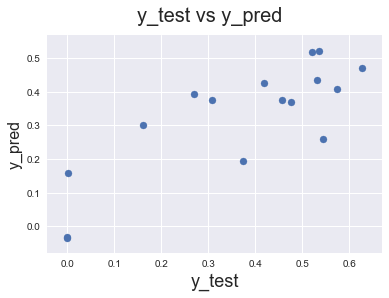

In [603]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [604]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.01621762587328198


In [605]:
print(metrics.r2_score(y_test, y_pred))

0.6296697359938831


### HomeAudio Koyck Model

In [710]:
lags = range(1, 3)
HomeAudio_by_week_lagged=HomeAudio_weekly.assign(**{
    '{} (t-{})'.format(col, t): HomeAudio_weekly[col].shift(t)
    for t in lags
    for col in HomeAudio_weekly[['gmv']]
}).fillna(0)

In [711]:
HomeAudio_by_week_lagged.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
2    12581.00 6.12      2769.38                     2.25      3.88   
5  1165624.00 7.49      1988.23                     1.91      5.58   
8  1441028.00 7.18      2063.21                     1.75      5.43   
11 1230725.00 7.18      1942.15                     1.73      5.45   
14  916000.00 7.30      1990.46                     1.73      5.57   

    discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
2                 43.49       1572.62                        8.00   
5                 32.63       1284.11                      190.00   
8                 32.43       1337.00                      209.00   
11                31.34       1255.98                      170.00   
14                30.22       1291.96                      130.00   

    special_sales   NPS    ...      SEM_adstock  Radio_adstock  Other_adstock  \
2               0 54.60    ...             0.34           0.00           0.00   
5               0 54.60    ...             0.41           0.00           0.00   
8               1 54.60    ...             0.42           0.00           0.00   
11              0 54.60    ...             0.42           0.00           0.00   
14              0 54.60    ...             0.42           0.00           0.00   

    Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
2            19.36                0.10             0.00             0.00   
5            20.10                0.28             4.42             0.00   
8            23.18                0.00             1.40             0.00   
11           23.06                0.00             0.90             0.00   
14           24.57                0.00             4.63             0.00   

    Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
2                0.00       0.00       0.00  
5                0.00   12581.00       0.00  
8                0.00 1165624.00   12581.00  
11               0.00 1441028.00 1165624.00  
14               0.00 1230725.00 1441028.00  

[5 rows x 38 columns]

In [712]:
home_lag = HomeAudio_by_week_lagged.copy()

In [713]:
home_lag.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'gmv (t-1)', 'gmv (t-2)'],
      dtype='object')

In [714]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
home_lag = home_lag.select_dtypes(include=numerics)
#drop week if exists

In [715]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(home_lag, train_size = 0.7, test_size = 0.3, random_state = 100)

In [716]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
23  0.06 0.78         0.16                     0.19      0.82   
113 0.21 0.42         0.42                     0.87      0.31   
116 0.19 0.53         0.45                     1.02      0.39   
89  0.33 0.65         0.35                     0.42      0.64   
134 0.14 0.40         0.32                     1.02      0.26   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
23                  0.53          0.15                        0.05   
113                 0.71          0.32                        0.59   
116                 0.76          0.30                        0.99   
89                  0.40          0.51                        0.23   
134                 1.00          0.06                        0.12   

     special_sales  NPS    ...      SEM_adstock  Radio_adstock  Other_adstock  \
23            0.00 0.26    ...             0.06           0.00           0.00   
113           0.00 0.56    ...             0.04           0.26           0.38   
116           0.00 0.73    ...             0.02           0.13           0.04   
89            1.00 0.58    ...             0.04           0.50           0.10   
134           0.00 0.29    ...             0.11           0.38           0.18   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
23             1.00                0.00             0.79             0.00   
113            0.44                0.27             0.22             0.18   
116            0.27                0.40             0.18             0.18   
89             0.33                0.36             0.21             0.00   
134            0.62                0.13             0.02             0.00   

     Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
23                0.00      -0.00       0.26  
113               0.00       0.32       0.36  
116               0.00       0.27       0.32  
89                0.00       0.30       0.33  
134               0.00       0.22       0.24  

[5 rows x 38 columns]

In [717]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

sla  product_mrp  product_procurement_sla  sla_diff  discount_percentage  \
80  0.74         0.39                     0.39      0.74                 0.34   
83  0.82         0.29                     0.52      0.80                 0.48   
110 0.58         0.36                     1.00      0.45                 0.65   
56  0.64         0.19                     0.61      0.59                 0.38   
26  0.64         0.16                     0.48      0.62                 0.31   

     gmv_per_unit  order_payment_type_Prepaid  special_sales  NPS  \
80           0.54                        0.16           0.00 0.26   
83           0.38                        0.22           1.00 0.26   
110          0.34                        0.37           0.00 0.45   
56           0.33                        0.12           0.00 0.26   
26           0.29                        0.00           0.00 0.25   

     Stock Index    ...      SEM_adstock  Radio_adstock  Other_adstock  \
80          0.16    ...             0.02           0.85           0.99   
83          0.16    ...             0.02           0.95           1.00   
110         0.00    ...             0.05           0.32           0.59   
56          0.96    ...             0.06           0.00           0.00   
26          0.38    ...             0.08           0.00           0.00   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
80             0.11                0.52             0.20             0.00   
83             0.05                1.00             0.00             0.00   
110            0.41                0.30             1.00             0.00   
56             0.42                0.29             0.26             0.83   
26             0.83                0.03             0.07             0.00   

     Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
80                1.00       0.34       0.36  
83                0.00       0.27       0.34  
110               0.00       0.36       0.41  
56                0.17       0.33       0.34  
26                0.00       0.13       0.00  

[5 rows x 37 columns]

In [718]:
#Model Building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [727]:
# Running RFE 
lm = LinearRegression()

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [728]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', False, 2),
 ('product_mrp', False, 9),
 ('product_procurement_sla', False, 3),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 7),
 ('gmv_per_unit', False, 8),
 ('order_payment_type_Prepaid', False, 11),
 ('special_sales', False, 16),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 24),
 ('TV_adstock', False, 21),
 ('Digital_adstock', False, 19),
 ('Sponsorship_adstock', False, 15),
 ('content_marketing_adstock', False, 6),
 ('online_marketing_adstock', False, 14),
 ('affiliates_adstock', False, 10),
 ('SEM_adstock', False, 4),
 ('Radio_adstock', False, 22),
 ('Other_adstock', False, 5),
 ('Mean Temp (°C)', False, 20),
 ('Heat Deg Days (°C)', False, 23),
 ('Total Rain (mm)', False, 17),
 ('Total Snow (cm

In [729]:
col = X_train.columns[rfe.support_]
col

Index(['sla_diff', 'NPS', 'Stock Index', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [730]:
X_train_rfe = X_train[col]
X_train_rfe['gmv (t-1)'] = X_train['gmv (t-1)']
X_train_rfe['gmv (t-2)'] = X_train['gmv (t-2)']

In [731]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [732]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [733]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     9.536
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.31e-06
Time:                        21:57:39   Log-Likelihood:                 51.762
No. Observations:                  35   AIC:                            -73.52
Df Residuals:                      20   BIC:                            -50.19
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.679e+11   4.97e+1

In [734]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
6             Digital        inf
9    Online marketing        inf
12              Radio        inf
13              Other 2935990.65
11                SEM  217983.83
5                  TV  126365.84
3         Stock Index  101496.85
4    Total Investment   66636.73
8   Content Marketing   66384.67
7         Sponsorship   18361.90
2                 NPS    9618.40
10         Affiliates    7306.88
1            sla_diff       5.21
14          gmv (t-1)       2.86
15          gmv (t-2)       2.63
0               const       0.00

In [735]:
#dropping Online marketing   --> high vif
X_train_new = X_train_rfe.drop(["Online marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     3.442
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00582
Time:                        21:57:54   Log-Likelihood:                 36.070
No. Observations:                  35   AIC:                            -44.14
Df Residuals:                      21   BIC:                            -22.37
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2125      0.82

In [736]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
2                 NPS  inf
3         Stock Index  inf
4    Total Investment  inf
5                  TV  inf
6             Digital  inf
7         Sponsorship  inf
8   Content Marketing  inf
9          Affiliates  inf
10                SEM  inf
11              Radio  inf
12              Other  inf
1            sla_diff 5.18
14          gmv (t-2) 1.95
13          gmv (t-1) 1.85
0               const 0.00

In [737]:
# Dropping Content Marketing --> high p-value
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     3.442
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00582
Time:                        21:58:05   Log-Likelihood:                 36.070
No. Observations:                  35   AIC:                            -44.14
Df Residuals:                      21   BIC:                            -22.37
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4860      1.366  

In [738]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
4   Total Investment 68276.67
10             Radio 62049.99
6            Digital 55991.90
11             Other 47839.08
9                SEM 44434.82
7        Sponsorship 29648.51
0              const  5259.13
5                 TV  3538.05
8         Affiliates  3386.20
2                NPS   248.35
3        Stock Index   231.10
1           sla_diff     5.18
13         gmv (t-2)     1.95
12         gmv (t-1)     1.85

In [739]:
# Dropping Total Investment --> high P-VALUE
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     3.690
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00389
Time:                        21:58:36   Log-Likelihood:                 35.395
No. Observations:                  35   AIC:                            -44.79
Df Residuals:                      22   BIC:                            -24.57
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6896      0.439     -1.572      

In [740]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
10        Other 36140.26
8           SEM 34136.80
9         Radio 33073.09
5       Digital 28209.58
4            TV  1682.52
0         const   546.33
2           NPS   185.01
3   Stock Index   103.36
7    Affiliates    82.88
6   Sponsorship    15.29
1      sla_diff     4.30
12    gmv (t-2)     1.95
11    gmv (t-1)     1.74

In [741]:
# Dropping Radio --> high vif
X_train_new = X_train_new.drop(['Radio'], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     3.169
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00946
Time:                        21:58:44   Log-Likelihood:                 32.242
No. Observations:                  35   AIC:                            -40.48
Df Residuals:                      23   BIC:                            -21.82
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0111      0.301      0.037      

In [742]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const 225.32
8           SEM 139.86
5       Digital 117.45
6   Sponsorship  15.28
2           NPS  10.77
7    Affiliates  10.75
4            TV   6.75
3   Stock Index   6.57
9         Other   6.26
1      sla_diff   1.90
11    gmv (t-2)   1.88
10    gmv (t-1)   1.68

In [743]:
# Dropping SEM --> high vif
X_train_new = X_train_new.drop(["SEM"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     3.037
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0125
Time:                        21:59:22   Log-Likelihood:                 30.406
No. Observations:                  35   AIC:                            -38.81
Df Residuals:                      24   BIC:                            -21.70
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0828      0.308      0.269      

In [744]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const 220.30
6   Sponsorship  12.93
2           NPS   9.53
7    Affiliates   8.45
5       Digital   6.93
3   Stock Index   6.46
8         Other   5.82
4            TV   4.97
1      sla_diff   1.89
10    gmv (t-2)   1.83
9     gmv (t-1)   1.60

In [745]:
# Dropping Other--> high Other
X_train_new = X_train_new.drop(["Other"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     3.488
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00642
Time:                        21:59:32   Log-Likelihood:                 30.332
No. Observations:                  35   AIC:                            -40.66
Df Residuals:                      25   BIC:                            -25.11
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1390      0.247      0.562      

In [746]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const 147.91
2          NPS   9.03
7   Affiliates   8.29
6  Sponsorship   6.38
4           TV   4.95
5      Digital   4.94
3  Stock Index   2.71
9    gmv (t-2)   1.77
8    gmv (t-1)   1.59
1     sla_diff   1.49

In [747]:
# Dropping NPS --> high vif
X_train_new = X_train_new.drop(["NPS"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     4.027
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00318
Time:                        21:59:58   Log-Likelihood:                 30.203
No. Observations:                  35   AIC:                            -42.41
Df Residuals:                      26   BIC:                            -28.41
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2280      0.133      1.718      

In [748]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        const 43.93
4      Digital  4.94
5  Sponsorship  3.70
3           TV  3.62
2  Stock Index  2.38
6   Affiliates  1.94
8    gmv (t-2)  1.71
7    gmv (t-1)  1.57
1     sla_diff  1.46

In [749]:
# Dropping sla_diff --> high p-value
X_train_new = X_train_new.drop(["sla_diff"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     4.600
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00172
Time:                        22:00:43   Log-Likelihood:                 29.836
No. Observations:                  35   AIC:                            -43.67
Df Residuals:                      27   BIC:                            -31.23
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3026      0.086      3.513      

In [750]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        const 18.82
3      Digital  4.15
4  Sponsorship  3.54
2           TV  3.44
5   Affiliates  1.94
1  Stock Index  1.78
7    gmv (t-2)  1.71
6    gmv (t-1)  1.56

In [751]:
# Dropping Stock Index --> high vif
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     5.534
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000695
Time:                        22:01:15   Log-Likelihood:                 29.781
No. Observations:                  35   AIC:                            -45.56
Df Residuals:                      28   BIC:                            -34.68
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2864      0.065      4.433      

In [752]:
# Dropping gmv (t-2) --> high vif
X_train_new = X_train_new.drop(["gmv (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     6.206
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000501
Time:                        22:01:41   Log-Likelihood:                 28.828
No. Observations:                  35   AIC:                            -45.66
Df Residuals:                      29   BIC:                            -36.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2544      0.060      4.246      

In [754]:
# Dropping Affiliates --> high vif
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     7.467
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000267
Time:                        22:02:14   Log-Likelihood:                 28.188
No. Observations:                  35   AIC:                            -46.38
Df Residuals:                      30   BIC:                            -38.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2820      0.054      5.248      

In [755]:
# Dropping TV --> high p-value
X_train_new = X_train_new.drop(["TV"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     8.392
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000314
Time:                        22:02:39   Log-Likelihood:                 26.500
No. Observations:                  35   AIC:                            -45.00
Df Residuals:                      31   BIC:                            -38.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3022      0.054      5.578      

In [756]:
# Dropping gmv (t-1) --> high p-value
X_train_new = X_train_new.drop(["gmv (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     10.98
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000235
Time:                        22:03:01   Log-Likelihood:                 25.238
No. Observations:                  35   AIC:                            -44.48
Df Residuals:                      32   BIC:                            -39.81
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2344      0.032      7.439      

## Making Predictions

In [757]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [758]:
X_train_new=X_train_new.drop('const',axis=1)

In [759]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [760]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [761]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

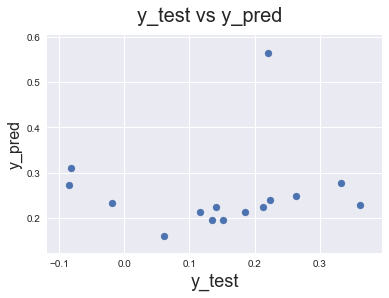

In [762]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [763]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.034477997747178815


In [764]:
print(metrics.r2_score(y_test, y_pred))

-1.0473099071127305


### CameraAccessory Koyck Model

In [656]:
#Creating Lag variables
lags = range(1, 3)
CameraAccessory_by_week_lagged=CameraAccessory_weekly.assign(**{
    '{} (t-{})'.format(col, t): CameraAccessory_weekly[col].shift(t)
    for t in lags
    for col in CameraAccessory_weekly[['gmv']]
}).fillna(0)

In [657]:
CameraAccessory_by_week_lagged.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
0     4067.00 4.00      1047.70                     2.00      2.00   
3  1003905.00 6.86      1128.61                     2.04      4.82   
6  1097503.00 6.54      1186.39                     2.04      4.50   
9  1092921.00 6.56      1150.04                     2.07      4.50   
12  747530.00 6.48      1144.97                     2.10      4.38   

    discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
0                 52.47        406.70                       10.00   
3                 46.50        571.62                      515.00   
6                 47.76        558.00                      593.00   
9                 45.40        553.12                      551.00   
12                45.26        564.68                      349.00   

    special_sales   NPS    ...      SEM_adstock  Radio_adstock  Other_adstock  \
0               0 54.60    ...             0.37           0.00           0.00   
3               0 54.60    ...             0.44           0.00           0.00   
6               1 54.60    ...             0.46           0.00           0.00   
9               0 54.60    ...             0.46           0.00           0.00   
12              0 54.60    ...             0.46           0.00           0.00   

    Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
0            19.36                0.10             0.00             0.00   
3            20.10                0.28             4.42             0.00   
6            23.18                0.00             1.40             0.00   
9            23.06                0.00             0.90             0.00   
12           24.57                0.00             4.63             0.00   

    Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
0                0.00       0.00       0.00  
3                0.00    4067.00       0.00  
6                0.00 1003905.00    4067.00  
9                0.00 1097503.00 1003905.00  
12               0.00 1092921.00 1097503.00  

[5 rows x 38 columns]

In [658]:
cam_lag = CameraAccessory_by_week_lagged.copy()

In [659]:
cam_lag.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'gmv (t-1)', 'gmv (t-2)'],
      dtype='object')

In [660]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cam_lag = cam_lag.select_dtypes(include=numerics)
#drop week if exists

In [661]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cam_lag, train_size = 0.7, test_size = 0.3, random_state = 100)

In [662]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
21  0.04 0.71         0.23                     0.32      0.71   
111 0.53 0.34         0.10                     0.35      0.33   
114 0.55 0.50         0.43                     0.24      0.51   
87  0.51 0.67         0.08                     0.77      0.59   
132 0.47 0.33         0.28                     0.21      0.33   

     discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
21                  0.04          0.89                        0.01   
111                 0.52          0.28                        0.62   
114                 0.71          0.34                        1.18   
87                  0.56          0.32                        0.14   
132                 0.82          0.17                        0.15   

     special_sales  NPS    ...      SEM_adstock  Radio_adstock  Other_adstock  \
21            0.00 0.25    ...             0.06           0.00           0.00   
111           0.00 0.59    ...             0.04           0.24           0.32   
114           0.00 0.73    ...             0.02           0.12           0.03   
87            1.00 0.58    ...             0.04           0.50           0.10   
132           0.00 0.29    ...             0.11           0.38           0.18   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
21             1.00                0.00             0.79             0.00   
111            0.44                0.27             0.22             0.18   
114            0.27                0.40             0.18             0.18   
87             0.33                0.36             0.21             0.00   
132            0.62                0.13             0.02             0.00   

     Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
21                0.00      -0.00       0.24  
111               0.00       0.55       0.49  
114               0.00       0.63       0.53  
87                0.00       0.44       0.56  
132               0.00       0.62       0.61  

[5 rows x 38 columns]

In [663]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

sla  product_mrp  product_procurement_sla  sla_diff  discount_percentage  \
78  0.77         0.21                     0.40      0.76                 0.46   
81  0.67         0.00                     1.00      0.53                 0.43   
108 0.36         0.10                     0.31      0.35                 0.46   
54  0.56         0.47                     0.29      0.56                 0.22   
24  0.65         0.43                     0.35      0.65                 0.22   

     gmv_per_unit  order_payment_type_Prepaid  special_sales  NPS  \
78           0.50                        0.08           0.00 0.26   
81           0.41                        0.15           1.00 0.26   
108          0.29                        0.26           0.00 0.45   
54           0.80                        0.04           0.00 0.26   
24           0.92                        0.00           0.00 0.25   

     Stock Index    ...      SEM_adstock  Radio_adstock  Other_adstock  \
78          0.16    ...             0.02           0.85           0.99   
81          0.16    ...             0.02           0.95           1.00   
108         0.00    ...             0.05           0.32           0.59   
54          0.96    ...             0.06           0.00           0.00   
24          0.38    ...             0.08           0.00           0.00   

     Mean Temp (°C)  Heat Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
78             0.11                0.52             0.20             0.00   
81             0.05                1.00             0.00             0.00   
108            0.41                0.30             1.00             0.00   
54             0.42                0.29             0.26             0.83   
24             0.83                0.03             0.07             0.00   

     Snow on Grnd (cm)  gmv (t-1)  gmv (t-2)  
78                1.00       0.55       0.44  
81                0.00       0.44       0.52  
108               0.00       0.51       0.61  
54                0.17       0.48       0.53  
24                0.00       0.19       0.00  

[5 rows x 37 columns]

In [664]:
#Model Building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [665]:
# Running RFE 
lm = LinearRegression()

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [666]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', False, 18),
 ('product_mrp', False, 17),
 ('product_procurement_sla', False, 15),
 ('sla_diff', False, 11),
 ('discount_percentage', False, 12),
 ('gmv_per_unit', False, 10),
 ('order_payment_type_Prepaid', True, 1),
 ('special_sales', False, 16),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 20),
 ('TV_adstock', True, 1),
 ('Digital_adstock', False, 5),
 ('Sponsorship_adstock', False, 3),
 ('content_marketing_adstock', True, 1),
 ('online_marketing_adstock', True, 1),
 ('affiliates_adstock', True, 1),
 ('SEM_adstock', True, 1),
 ('Radio_adstock', False, 4),
 ('Other_adstock', False, 2),
 ('Mean Temp (°C)', False, 7),
 ('Heat Deg Days (°C)', False, 8),
 ('Total Rain (mm)', False, 13),
 ('Total Snow (cm)', Fals

In [667]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'NPS', 'Stock Index', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'TV_adstock',
       'content_marketing_adstock', 'online_marketing_adstock',
       'affiliates_adstock', 'SEM_adstock'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [668]:
X_train_rfe = X_train[col]
X_train_rfe['gmv (t-1)'] = X_train['gmv (t-1)']
X_train_rfe['gmv (t-2)'] = X_train['gmv (t-2)']

In [669]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [670]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [671]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     60.25
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.80e-11
Time:                        21:47:46   Log-Likelihood:                 80.444
No. Observations:                  35   AIC:                            -120.9
Df Residuals:                      15   BIC:                            -89.78
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [672]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features         VIF
13                       Other 66411443.96
10                  Affiliates  7249423.31
5                           TV  2073064.60
7                  Sponsorship  1337463.32
8            Content Marketing  1191684.82
4             Total Investment   953083.21
6                      Digital   884498.95
11                         SEM   459450.30
3                  Stock Index   420336.86
12                       Radio   396490.71
9             Online marketing   200574.80
2                          NPS   189208.26
17          affiliates_adstock    21904.84
18                 SEM_adstock     1638.28
16    online_marketing_adstock      404.96
15   content_marketing_adstock      402.96
14                  TV_adstock       36.55
1   order_payment_type_Prepaid        6.20
20                   gmv (t-2)        5.84
19                   gmv (t-1)        5.00
0                        const        0.00

In [673]:
#dropping Other   --> high vif
X_train_new = X_train_rfe.drop(["Other"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     56.57
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.24e-10
Time:                        21:48:15   Log-Likelihood:                 79.356
No. Observations:                  35   AIC:                            -118.7
Df Residuals:                      15   BIC:                            -87.60
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [674]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
10                  Affiliates      inf
6                      Digital      inf
12                       Radio      inf
11                         SEM      inf
9             Online marketing      inf
7                  Sponsorship      inf
8            Content Marketing      inf
5                           TV      inf
4             Total Investment      inf
3                  Stock Index      inf
2                          NPS      inf
16          affiliates_adstock 25775.61
17                 SEM_adstock  1636.02
15    online_marketing_adstock   401.93
14   content_marketing_adstock   399.13
13                  TV_adstock    32.80
1   order_payment_type_Prepaid     6.04
19                   gmv (t-2)     5.78
18                   gmv (t-1)     4.42
0                        const     0.00

In [675]:
# Dropping Affiliates --> high vif
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     36.94
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.01e-09
Time:                        21:48:40   Log-Likelihood:                 69.993
No. Observations:                  35   AIC:                            -102.0
Df Residuals:                      16   BIC:                            -72.43
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [676]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
4             Total Investment 2232772129.60
7                  Sponsorship  845560464.99
6                      Digital  129366420.53
11                       Radio  120031046.87
9             Online marketing   91410042.70
0                        const   43569961.40
5                           TV   36300804.90
8            Content Marketing   10683965.86
10                         SEM    2425215.01
2                          NPS    1105424.75
3                  Stock Index     160634.57
15          affiliates_adstock      24376.62
16                 SEM_adstock       1608.37
13   content_marketing_adstock        391.66
14    online_marketing_adstock        370.79
12                  TV_adstock         29.49
1   order_payment_type_Prepaid          6.04
18                   gmv (t-2)          5.78
17                   gmv (t-1)          4.20

In [677]:
# Dropping SETotal InvestmentM --> high vif
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     39.41
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.34e-10
Time:                        21:49:03   Log-Likelihood:                 69.089
No. Observations:                  35   AIC:                            -102.2
Df Residuals:                      17   BIC:                            -74.18
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [678]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
14          affiliates_adstock 24300.60
7            Content Marketing 10214.20
8             Online marketing  9432.96
5                      Digital  7053.06
0                        const  6868.83
4                           TV  2354.56
9                          SEM  1762.80
6                  Sponsorship  1649.78
15                 SEM_adstock  1349.34
10                       Radio   849.08
13    online_marketing_adstock   295.95
12   content_marketing_adstock   289.35
2                          NPS   199.58
3                  Stock Index   156.59
11                  TV_adstock    26.57
1   order_payment_type_Prepaid     6.03
17                   gmv (t-2)     5.78
16                   gmv (t-1)     4.17

In [679]:
# Dropping affiliates_adstock --> high vif
X_train_new = X_train_new.drop(['affiliates_adstock'], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     34.32
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.05e-10
Time:                        21:49:35   Log-Likelihood:                 64.734
No. Observations:                  35   AIC:                            -95.47
Df Residuals:                      18   BIC:                            -69.03
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [680]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9                          SEM 1433.21
14                 SEM_adstock 1308.45
5                      Digital  755.23
7            Content Marketing  579.24
0                        const  569.81
12   content_marketing_adstock  285.49
13    online_marketing_adstock  136.03
8             Online marketing  133.68
6                  Sponsorship   62.38
4                           TV   62.08
10                       Radio   42.31
2                          NPS   41.90
11                  TV_adstock   24.57
3                  Stock Index   12.79
1   order_payment_type_Prepaid    5.98
16                   gmv (t-2)    5.70
15                   gmv (t-1)    4.17

In [681]:
# Dropping SEM --> high vif
X_train_new = X_train_new.drop(["SEM"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     16.31
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.95e-08
Time:                        21:49:50   Log-Likelihood:                 50.386
No. Observations:                  35   AIC:                            -68.77
Df Residuals:                      19   BIC:                            -43.89
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [682]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5                      Digital 653.59
0                        const 551.97
7            Content Marketing 512.45
13                 SEM_adstock 359.32
12    online_marketing_adstock 134.91
8             Online marketing 133.33
11   content_marketing_adstock 107.76
4                           TV  62.08
6                  Sponsorship  61.93
9                        Radio  41.98
2                          NPS  32.16
10                  TV_adstock  24.31
3                  Stock Index  12.14
1   order_payment_type_Prepaid   5.97
15                   gmv (t-2)   5.69
14                   gmv (t-1)   4.03

In [683]:
# Dropping Digital --> high vif
X_train_new = X_train_new.drop(["Digital"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     6.068
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000162
Time:                        21:50:19   Log-Likelihood:                 33.367
No. Observations:                  35   AIC:                            -36.73
Df Residuals:                      20   BIC:                            -13.40
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [684]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 455.46
12                 SEM_adstock 146.97
11    online_marketing_adstock 133.95
6            Content Marketing  70.87
7             Online marketing  69.37
10   content_marketing_adstock  67.01
2                          NPS  32.06
5                  Sponsorship  28.08
8                        Radio  20.12
9                   TV_adstock  18.84
3                  Stock Index   9.85
4                           TV   9.75
1   order_payment_type_Prepaid   5.76
14                   gmv (t-2)   5.40
13                   gmv (t-1)   3.49

In [685]:
# Dropping SEM_adstock --> high vif
X_train_new = X_train_new.drop(["SEM_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     6.389
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000101
Time:                        21:50:38   Log-Likelihood:                 32.363
No. Observations:                  35   AIC:                            -36.73
Df Residuals:                      21   BIC:                            -14.95
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [686]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 354.79
11    online_marketing_adstock  91.48
7             Online marketing  69.33
2                          NPS  26.19
5                  Sponsorship  26.13
6            Content Marketing  24.38
10   content_marketing_adstock  21.15
9                   TV_adstock  12.34
8                        Radio  10.21
4                           TV   9.40
3                  Stock Index   8.99
13                   gmv (t-2)   5.03
1   order_payment_type_Prepaid   4.44
12                   gmv (t-1)   2.99

In [687]:
# Dropping online_marketing_adstock  --> high vif
X_train_new = X_train_new.drop(["online_marketing_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     7.150
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.98e-05
Time:                        21:50:57   Log-Likelihood:                 32.166
No. Observations:                  35   AIC:                            -38.33
Df Residuals:                      22   BIC:                            -18.11
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [688]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 271.92
6            Content Marketing  23.85
2                          NPS  21.47
10   content_marketing_adstock  19.53
5                  Sponsorship  18.24
7             Online marketing  15.16
9                   TV_adstock  12.16
4                           TV   9.13
8                        Radio   7.05
3                  Stock Index   6.57
1   order_payment_type_Prepaid   3.84
11                   gmv (t-1)   2.35
12                   gmv (t-2)   1.68

In [689]:
# Dropping Content Marketing --> high p-value
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     8.125
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.37e-05
Time:                        21:51:17   Log-Likelihood:                 32.115
No. Observations:                  35   AIC:                            -40.23
Df Residuals:                      23   BIC:                            -21.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [690]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                        const 176.51
2                          NPS  13.93
8                   TV_adstock  12.16
6             Online marketing  11.80
5                  Sponsorship   8.29
4                           TV   7.96
3                  Stock Index   6.56
7                        Radio   5.33
9    content_marketing_adstock   3.91
1   order_payment_type_Prepaid   3.79
10                   gmv (t-1)   2.35
11                   gmv (t-2)   1.67

In [691]:
# Dropping NPS --> high vif
X_train_new = X_train_new.drop(["NPS"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     8.534
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.22e-06
Time:                        21:51:38   Log-Likelihood:                 30.892
No. Observations:                  35   AIC:                            -39.78
Df Residuals:                      24   BIC:                            -22.68
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [692]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        const 32.45
7                   TV_adstock 11.50
3                           TV  7.56
2                  Stock Index  6.47
5             Online marketing  6.45
4                  Sponsorship  5.06
6                        Radio  4.91
8    content_marketing_adstock  3.85
1   order_payment_type_Prepaid  2.53
9                    gmv (t-1)  2.00
10                   gmv (t-2)  1.66

In [693]:
# Dropping TV_adstock --> high vif
X_train_new = X_train_new.drop(["TV_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     6.738
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.24e-05
Time:                        21:51:54   Log-Likelihood:                 25.903
No. Observations:                  35   AIC:                            -31.81
Df Residuals:                      25   BIC:                            -16.25
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [694]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 31.61
2                 Stock Index  6.46
6                       Radio  4.79
3                          TV  4.37
4                 Sponsorship  4.09
7   content_marketing_adstock  3.73
5            Online marketing  3.16
1  order_payment_type_Prepaid  2.12
8                   gmv (t-1)  1.71
9                   gmv (t-2)  1.51

In [695]:
# Dropping Total Investment --> high vif
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     7.091
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.82e-05
Time:                        21:52:12   Log-Likelihood:                 24.611
No. Observations:                  35   AIC:                            -31.22
Df Residuals:                      26   BIC:                            -17.22
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [696]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                       const 12.53
4            Online marketing  3.05
3                 Sponsorship  3.00
6   content_marketing_adstock  2.40
2                          TV  2.23
5                       Radio  1.97
8                   gmv (t-2)  1.49
7                   gmv (t-1)  1.46
1  order_payment_type_Prepaid  1.18

In [697]:
# Dropping gmv (t-1) --> high vif
X_train_new = X_train_new.drop(["gmv (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     8.290
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.14e-05
Time:                        21:52:38   Log-Likelihood:                 24.430
No. Observations:                  35   AIC:                            -32.86
Df Residuals:                      27   BIC:                            -20.42
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [699]:
# Dropping Sponsorship --> high p-value
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     9.925
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.92e-06
Time:                        21:53:17   Log-Likelihood:                 24.304
No. Observations:                  35   AIC:                            -34.61
Df Residuals:                      28   BIC:                            -23.72
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [700]:
# Dropping Radio --> high p-value
X_train_new = X_train_new.drop(["Radio"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     12.09
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.20e-06
Time:                        21:53:41   Log-Likelihood:                 24.069
No. Observations:                  35   AIC:                            -36.14
Df Residuals:                      29   BIC:                            -26.81
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [701]:
# Dropping content_marketing_adstock --> high p- value
X_train_new = X_train_new.drop(["content_marketing_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     14.39
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.14e-06
Time:                        21:54:09   Log-Likelihood:                 23.103
No. Observations:                  35   AIC:                            -36.21
Df Residuals:                      30   BIC:                            -28.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Making Predictions

In [702]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [703]:
X_train_new=X_train_new.drop('const',axis=1)

In [704]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [705]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [706]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

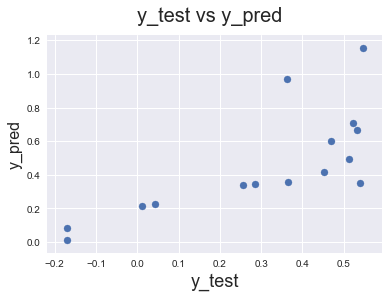

In [707]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [708]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.0686033349245973


In [709]:
print(metrics.r2_score(y_test, y_pred))

-0.12128748739869954


# Distributed Lag Model

### GamingAccessory distributed lag Model

In [983]:
GamingAccessory_weekly.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)'],
      dtype='object')

In [984]:
#Creating Lag variables
lags = range(1, 3)
GamingAccessory_by_week_lagged=GamingAccessory_weekly.assign(**{
    '{} (t-{})'.format(col, t): GamingAccessory_weekly[col].shift(t)
    for t in lags
    for col in GamingAccessory_weekly[['gmv', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock']]
}).fillna(0)

In [985]:
GamingAccessory_by_week_lagged.head()

gmv  sla  product_mrp  product_procurement_sla  sla_diff  \
1    7758.00 5.56      1200.67                     1.89      3.67   
4  763139.00 6.54      1027.67                     2.19      4.35   
7  783978.36 5.87       855.40                     2.28      3.59   
10 765301.00 6.00      1002.70                     2.09      3.91   
13 551707.00 6.30      1047.57                     2.14      4.16   

    discount_percentage  gmv_per_unit  order_payment_type_Prepaid  \
1                 32.49        862.00                        9.00   
4                 40.22        583.01                      305.00   
7                 46.22        494.62                      328.00   
10                39.75        599.28                      247.00   
13                41.45        630.73                      135.00   

    special_sales   NPS         ...           gmv (t-2)  TV_adstock (t-2)  \
1               0 54.60         ...                0.00              0.00   
4               0 54.60         ...                0.00              0.00   
7               1 54.60         ...             7758.00              0.01   
10              0 54.60         ...           763139.00              0.02   
13              0 54.60         ...           783978.36              0.02   

    Digital_adstock (t-2)  Sponsorship_adstock (t-2)  \
1                    0.00                       0.00   
4                    0.00                       0.00   
7                    0.12                       0.35   
10                   0.18                       0.52   
13                   0.21                       0.61   

    content_marketing_adstock (t-2)  online_marketing_adstock (t-2)  \
1                              0.00                            0.00   
4                              0.00                            0.00   
7                              0.00                            0.06   
10                             0.00                            0.10   
13                             0.00                            0.12   

    affiliates_adstock (t-2)  SEM_adstock (t-2)  Radio_adstock (t-2)  \
1                       0.00               0.00                 0.00   
4                       0.00               0.00                 0.00   
7                       0.03               0.24                 0.00   
10                      0.03               0.28                 0.00   
13                      0.03               0.29                 0.00   

    Other_adstock (t-2)  
1                  0.00  
4                  0.00  
7                  0.00  
10                 0.00  
13                 0.00  

[5 rows x 56 columns]

In [1013]:
game_lag = GamingAccessory_by_week_lagged.copy()

In [1014]:
cols = game_lag.iloc[:,36:].columns
cols

Index(['gmv (t-1)', 'TV_adstock (t-1)', 'Digital_adstock (t-1)',
       'Sponsorship_adstock (t-1)', 'content_marketing_adstock (t-1)',
       'online_marketing_adstock (t-1)', 'affiliates_adstock (t-1)',
       'SEM_adstock (t-1)', 'Radio_adstock (t-1)', 'Other_adstock (t-1)',
       'gmv (t-2)', 'TV_adstock (t-2)', 'Digital_adstock (t-2)',
       'Sponsorship_adstock (t-2)', 'content_marketing_adstock (t-2)',
       'online_marketing_adstock (t-2)', 'affiliates_adstock (t-2)',
       'SEM_adstock (t-2)', 'Radio_adstock (t-2)', 'Other_adstock (t-2)'],
      dtype='object')

In [1015]:
game_lag = game_lag[cols]
game_lag['gmv'] = GamingAccessory_by_week_lagged['gmv']

In [1016]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
game_lag = game_lag.select_dtypes(include=numerics)
#drop week if exists

In [1017]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(game_lag, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1018]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

gmv (t-1)  TV_adstock (t-1)  Digital_adstock (t-1)  \
70        0.42              0.70                   0.20   
139       1.11              0.46                   0.01   
151       0.44              0.33                   0.06   
106       0.67              0.78                   0.12   
18        0.00              0.01                   0.11   

     Sponsorship_adstock (t-1)  content_marketing_adstock (t-1)  \
70                        0.61                             0.30   
139                       0.37                             0.23   
151                       0.30                             0.03   
106                       0.39                             0.14   
18                        0.03                             0.00   

     online_marketing_adstock (t-1)  affiliates_adstock (t-1)  \
70                             0.96                      0.93   
139                            1.00                      0.92   
151                            0.45                      0.37   
106                            0.84                      0.84   
18                             0.02                      0.01   

     SEM_adstock (t-1)  Radio_adstock (t-1)  Other_adstock (t-1) ...   \
70                0.29                 0.00                 0.00 ...    
139               0.15                 0.42                 0.18 ...    
151               0.04                 0.03                 0.00 ...    
106               0.09                 0.27                 0.58 ...    
18                0.02                 0.00                 0.00 ...    

     TV_adstock (t-2)  Digital_adstock (t-2)  Sponsorship_adstock (t-2)  \
70               0.69                   0.24                       0.57   
139              0.53                   0.07                       0.39   
151              0.35                   0.12                       0.32   
106              0.64                   0.17                       0.31   
18               0.02                   0.21                       0.09   

     content_marketing_adstock (t-2)  online_marketing_adstock (t-2)  \
70                              0.27                            0.93   
139                             0.23                            0.96   
151                             0.05                            0.51   
106                             0.16                            0.85   
18                              0.00                            0.05   

     affiliates_adstock (t-2)  SEM_adstock (t-2)  Radio_adstock (t-2)  \
70                       0.93               0.34                 0.00   
139                      0.92               0.22                 0.45   
151                      0.38               0.12                 0.08   
106                      0.85               0.16                 0.21   
18                       0.07               0.16                 0.00   

     Other_adstock (t-2)  gmv  
70                  0.00 0.63  
139                 0.19 0.53  
151                 0.00 0.16  
106                 0.46 0.37  
18                  0.00 0.00  

[5 rows x 21 columns]

In [1019]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

gmv (t-1)  TV_adstock (t-1)  Digital_adstock (t-1)  \
73        0.70              0.72                   0.21   
118       0.46              0.95                   0.06   
79        0.53              0.70                   0.07   
109       0.41              0.89                   0.12   
46        0.31              0.64                   1.00   

     Sponsorship_adstock (t-1)  content_marketing_adstock (t-1)  \
73                        0.65                             0.32   
118                       0.36                             0.05   
79                        0.28                             0.30   
109                       0.44                             0.13   
46                        1.00                             1.00   

     online_marketing_adstock (t-1)  affiliates_adstock (t-1)  \
73                             0.97                      0.93   
118                            0.77                      0.77   
79                             0.99                      1.00   
109                            0.83                      0.84   
46                             1.00                      0.95   

     SEM_adstock (t-1)  Radio_adstock (t-1)  Other_adstock (t-1)  gmv (t-2)  \
73                0.30                 0.00                 0.00       0.38   
118               0.06                 0.13                 0.04       0.39   
79                0.09                 0.68                 0.94       0.46   
109               0.09                 0.31                 0.59       0.60   
46                1.00                 0.00                 0.00       0.90   

     TV_adstock (t-2)  Digital_adstock (t-2)  Sponsorship_adstock (t-2)  \
73               0.70                   0.25                       0.64   
118              1.00                   0.16                       0.46   
79               0.72                   0.21                       0.54   
109              0.78                   0.18                       0.41   
46               0.58                   0.93                       1.00   

     content_marketing_adstock (t-2)  online_marketing_adstock (t-2)  \
73                              0.31                            0.95   
118                             0.10                            0.79   
79                              0.32                            0.97   
109                             0.14                            0.83   
46                              0.94                            0.94   

     affiliates_adstock (t-2)  SEM_adstock (t-2)  Radio_adstock (t-2)  \
73                       0.93               0.35                 0.00   
118                      0.82               0.15                 0.30   
79                       0.96               0.28                 0.28   
109                      0.84               0.17                 0.31   
46                       0.95               1.00                 0.00   

     Other_adstock (t-2)  
73                  0.00  
118                 0.35  
79                  0.41  
109                 0.58  
46                  0.00

In [1020]:
#Model Building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1025]:
# Running RFE 
lm = LinearRegression()

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1026]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('gmv (t-1)', False, 6),
 ('TV_adstock (t-1)', True, 1),
 ('Digital_adstock (t-1)', True, 1),
 ('Sponsorship_adstock (t-1)', False, 7),
 ('content_marketing_adstock (t-1)', False, 5),
 ('online_marketing_adstock (t-1)', True, 1),
 ('affiliates_adstock (t-1)', True, 1),
 ('SEM_adstock (t-1)', True, 1),
 ('Radio_adstock (t-1)', True, 1),
 ('Other_adstock (t-1)', True, 1),
 ('gmv (t-2)', False, 9),
 ('TV_adstock (t-2)', True, 1),
 ('Digital_adstock (t-2)', True, 1),
 ('Sponsorship_adstock (t-2)', False, 8),
 ('content_marketing_adstock (t-2)', False, 11),
 ('online_marketing_adstock (t-2)', False, 2),
 ('affiliates_adstock (t-2)', False, 10),
 ('SEM_adstock (t-2)', False, 3),
 ('Radio_adstock (t-2)', True, 1),
 ('Other_adstock (t-2)', False, 4)]

In [1027]:
col = X_train.columns[rfe.support_]
col

Index(['TV_adstock (t-1)', 'Digital_adstock (t-1)',
       'online_marketing_adstock (t-1)', 'affiliates_adstock (t-1)',
       'SEM_adstock (t-1)', 'Radio_adstock (t-1)', 'Other_adstock (t-1)',
       'TV_adstock (t-2)', 'Digital_adstock (t-2)', 'Radio_adstock (t-2)'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1028]:
X_train_rfe = X_train[col]
X_train_rfe['gmv (t-1)'] = X_train['gmv (t-1)']
X_train_rfe['gmv (t-2)'] = X_train['gmv (t-2)']

In [1029]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1030]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1031]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     3.288
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00630
Time:                        23:21:08   Log-Likelihood:                 23.767
No. Observations:                  37   AIC:                            -21.53
Df Residuals:                      24   BIC:                           -0.5911
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1032]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1                 TV_adstock (t-1) 1510.87
8                 TV_adstock (t-2) 1167.91
6              Radio_adstock (t-1) 1062.00
7              Other_adstock (t-1)  515.54
2            Digital_adstock (t-1)  455.22
5                SEM_adstock (t-1)  298.13
10             Radio_adstock (t-2)  152.61
4         affiliates_adstock (t-1)   88.18
3   online_marketing_adstock (t-1)   80.99
9            Digital_adstock (t-2)   60.82
0                            const    7.85
12                       gmv (t-2)    4.68
11                       gmv (t-1)    2.59

In [1033]:
#dropping gmv (t-2)   --> high p-value
X_train_new = X_train_rfe.drop(["TV_adstock (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     3.286
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00662
Time:                        23:21:32   Log-Likelihood:                 22.325
No. Observations:                  37   AIC:                            -20.65
Df Residuals:                      25   BIC:                            -1.319
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1034]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1            Digital_adstock (t-1) 258.03
4                SEM_adstock (t-1) 141.79
5              Radio_adstock (t-1)  81.72
2   online_marketing_adstock (t-1)  58.00
8            Digital_adstock (t-2)  41.89
3         affiliates_adstock (t-1)  40.21
6              Other_adstock (t-1)  34.58
9              Radio_adstock (t-2)  20.34
0                            const   7.85
7                 TV_adstock (t-2)   4.78
11                       gmv (t-2)   4.13
10                       gmv (t-1)   2.56

In [1036]:
# Dropping Sponsorship --> high p-value
X_train_new = X_train_new.drop(["Digital_adstock (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     3.366
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00621
Time:                        23:21:56   Log-Likelihood:                 21.143
No. Observations:                  37   AIC:                            -20.29
Df Residuals:                      26   BIC:                            -2.566
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1037]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1   online_marketing_adstock (t-1) 57.99
4              Radio_adstock (t-1) 39.22
2         affiliates_adstock (t-1) 35.32
5              Other_adstock (t-1) 15.82
8              Radio_adstock (t-2) 12.03
0                            const  7.25
6                 TV_adstock (t-2)  4.78
10                       gmv (t-2)  4.13
3                SEM_adstock (t-1)  2.82
9                        gmv (t-1)  2.56
7            Digital_adstock (t-2)  2.27

In [1038]:
# Dropping SEM --> high vif
X_train_new = X_train_new.drop(["online_marketing_adstock (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3.447
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00601
Time:                        23:22:26   Log-Likelihood:                 19.931
No. Observations:                  37   AIC:                            -19.86
Df Residuals:                      27   BIC:                            -3.754
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1039]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Radio_adstock (t-1) 37.15
4       Other_adstock (t-1) 14.57
7       Radio_adstock (t-2) 11.88
0                     const  6.15
1  affiliates_adstock (t-1)  5.38
5          TV_adstock (t-2)  4.35
2         SEM_adstock (t-1)  2.82
6     Digital_adstock (t-2)  2.20
8                 gmv (t-1)  2.11
9                 gmv (t-2)  1.94

In [1040]:
# Dropping Affiliates --> high vif
X_train_new = X_train_new.drop(['Radio_adstock (t-1)'], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3.337
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00831
Time:                        23:22:47   Log-Likelihood:                 18.166
No. Observations:                  37   AIC:                            -18.33
Df Residuals:                      28   BIC:                            -3.833
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1041]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                     const 6.04
1  affiliates_adstock (t-1) 5.04
4          TV_adstock (t-2) 3.77
6       Radio_adstock (t-2) 3.14
2         SEM_adstock (t-1) 2.80
3       Other_adstock (t-1) 2.70
5     Digital_adstock (t-2) 2.20
7                 gmv (t-1) 2.08
8                 gmv (t-2) 1.93

In [1042]:
# Dropping Other --> high vif
X_train_new = X_train_new.drop(["gmv (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3.949
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00384
Time:                        23:23:25   Log-Likelihood:                 18.163
No. Observations:                  37   AIC:                            -20.33
Df Residuals:                      29   BIC:                            -7.439
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1043]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                     const 5.66
1  affiliates_adstock (t-1) 4.56
4          TV_adstock (t-2) 3.74
6       Radio_adstock (t-2) 2.98
2         SEM_adstock (t-1) 2.79
3       Other_adstock (t-1) 2.64
5     Digital_adstock (t-2) 2.20
7                 gmv (t-2) 1.91

In [1044]:
# Dropping affiliates_adstock --> high vif
X_train_new = X_train_new.drop(["Radio_adstock (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     4.706
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00174
Time:                        23:23:52   Log-Likelihood:                 18.048
No. Observations:                  37   AIC:                            -22.10
Df Residuals:                      30   BIC:                            -10.82
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1045]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                     const 5.60
1  affiliates_adstock (t-1) 4.48
4          TV_adstock (t-2) 3.67
2         SEM_adstock (t-1) 2.79
5     Digital_adstock (t-2) 2.05
6                 gmv (t-2) 1.66
3       Other_adstock (t-1) 1.45

In [1046]:
# Dropping Other_adstock --> high vif
X_train_new = X_train_new.drop(["TV_adstock (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     5.787
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000694
Time:                        23:24:19   Log-Likelihood:                 17.974
No. Observations:                  37   AIC:                            -23.95
Df Residuals:                      31   BIC:                            -14.28
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1047]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                     const 5.54
2         SEM_adstock (t-1) 2.26
4     Digital_adstock (t-2) 2.01
1  affiliates_adstock (t-1) 1.98
5                 gmv (t-2) 1.54
3       Other_adstock (t-1) 1.43

In [1048]:
# Dropping Content Marketing  --> high vif
X_train_new = X_train_new.drop(["Other_adstock (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     7.396
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000245
Time:                        23:24:44   Log-Likelihood:                 17.888
No. Observations:                  37   AIC:                            -25.78
Df Residuals:                      32   BIC:                            -17.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1049]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                     const 5.42
2         SEM_adstock (t-1) 2.09
3     Digital_adstock (t-2) 2.00
1  affiliates_adstock (t-1) 1.66
4                 gmv (t-2) 1.51

In [1050]:
# Dropping Online marketing --> high p-value
X_train_new = X_train_new.drop(["SEM_adstock (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     9.464
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000117
Time:                        23:25:14   Log-Likelihood:                 17.261
No. Observations:                  37   AIC:                            -26.52
Df Residuals:                      33   BIC:                            -20.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1051]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                     const 5.30
1  affiliates_adstock (t-1) 1.58
3                 gmv (t-2) 1.51
2     Digital_adstock (t-2) 1.12

In [1052]:
# Dropping Radio --> high vif
X_train_new = X_train_new.drop(["gmv (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     12.06
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000110
Time:                        23:25:42   Log-Likelihood:                 15.697
No. Observations:                  37   AIC:                            -25.39
Df Residuals:                      34   BIC:                            -20.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Making Predictions

In [1053]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [1054]:
X_train_new=X_train_new.drop('const',axis=1)

In [1055]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [1056]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1057]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

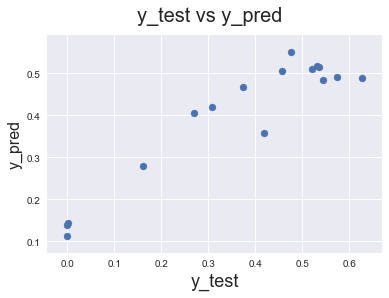

In [1058]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1059]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

0.009199999045154752


In [1060]:
print(metrics.r2_score(y_test, y_pred))

0.7899175809166268
